# Data Analysis and Visualization for CIC-UNSW-NB15

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Load Dataset

In [2]:
data_path = "Data/UNSW-NB15/"
data = pd.read_csv(data_path + "Data.csv")
labels = pd.read_csv(data_path + "Label.csv")

### Merge and Preprocess Data

In [3]:
# Merge labels with dataset
data['attack_type'] = labels.values

# Replace numerical labels with category names
attack_type = {
    0: 'Benign',
    1: 'Analysis',
    2: 'Backdoor',
    3: 'DoS',
    4: 'Exploits', 
    5: 'Fuzzers',
    6: 'Generic',
    7: 'Reconnaissance',
    8: 'Shellcode',
    9: 'Worms'
}
data['Category'] = data['attack_type'].map(attack_type)

# Display dataset with labels
display(data.head())

Flow Duration  Total Fwd Packet  Total Bwd packets  \
0         214392                 9                 21   
1        2376792                 9                  3   
2         131350                10                  3   
3         164796                 6                  3   
4         163418                 6                  3   

   Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       388.0                     24564.0   
1                       752.0                         0.0   
2                      7564.0                         0.0   
3                       770.0                         0.0   
4                       400.0                         0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                  194.0                    0.0               43.111111   
1                  188.0                    0.0               83.555556   
2                 1460.0                    0.0              756.400000   
3                  385.0                    0.0              128.333333   
4                  200.0                    0.0               66.666667   

   Fwd Packet Length Std  Bwd Packet Length Max  ...  Active Mean  Active Std  \
0              85.545959                 1460.0  ...          0.0         0.0   
1              99.084700                    0.0  ...          0.0         0.0   
2             690.497277                    0.0  ...          0.0         0.0   
3             198.813145                    0.0  ...          0.0         0.0   
4             103.279556                    0.0  ...          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
0         0.0         0.0        0.0       0.0       0.0       0.0   
1         0.0         0.0        0.0       0.0       0.0       0.0   
2         0.0         0.0        0.0       0.0       0.0       0.0   
3         0.0         0.0        0.0       0.0       0.0       0.0   
4         0.0         0.0        0.0       0.0       0.0       0.0   

   attack_type        Category  
0            4        Exploits  
1            7  Reconnaissance  
2            4        Exploits  
3            3             DoS  
4            6         Generic  

[5 rows x 78 columns]

## Exploratory Data Analysis

### Distribution of attack types

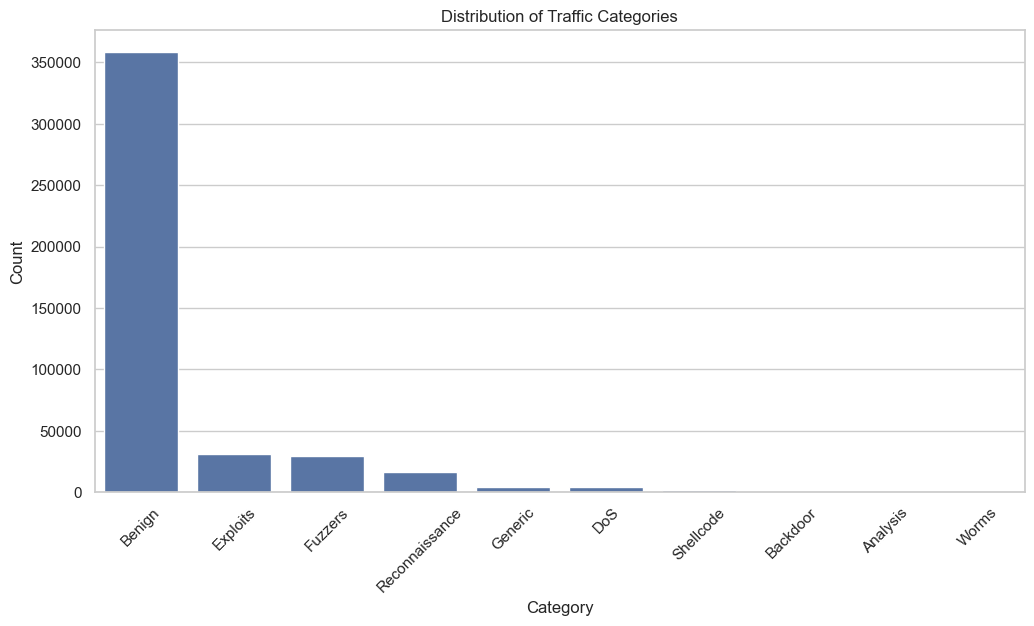

In [4]:
# Count of each category
category_counts = data['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Traffic Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### Correlation Analysis

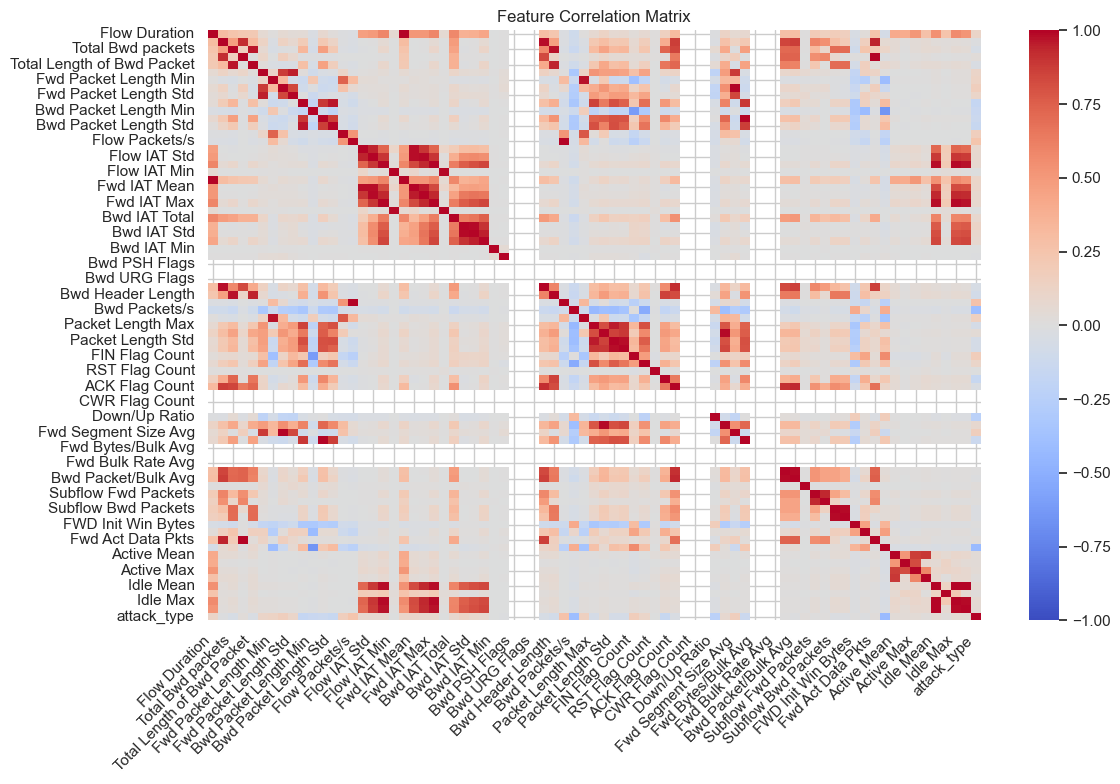

In [5]:
# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            cmap="coolwarm",
            vmin=-1, 
            vmax=1,
            center=0,
            annot=False)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Missing values analysis

In [6]:
missing_values = data.isnull().sum()
print("\nMissing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
Series([], dtype: int64)


### Feature importance based on variance

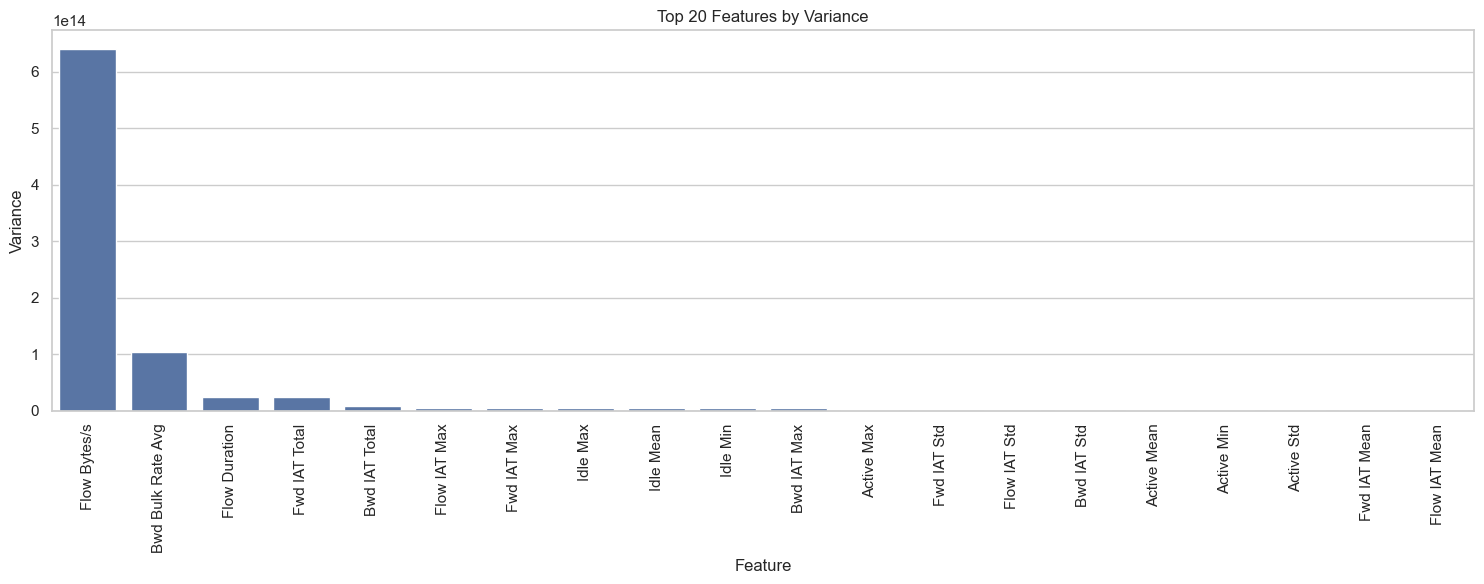

In [7]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols].drop('attack_type', axis=1)

feature_variance = pd.DataFrame({
    'Feature': numeric_cols,
    'Variance': data[numeric_cols].var()
}).sort_values('Variance', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='Feature', y='Variance', data=feature_variance.head(20))
plt.title('Top 20 Features by Variance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### PCA Analysis

#### Prepare numeric data for PCA


In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#### Perform PCA


In [9]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

#### PCA Visualization

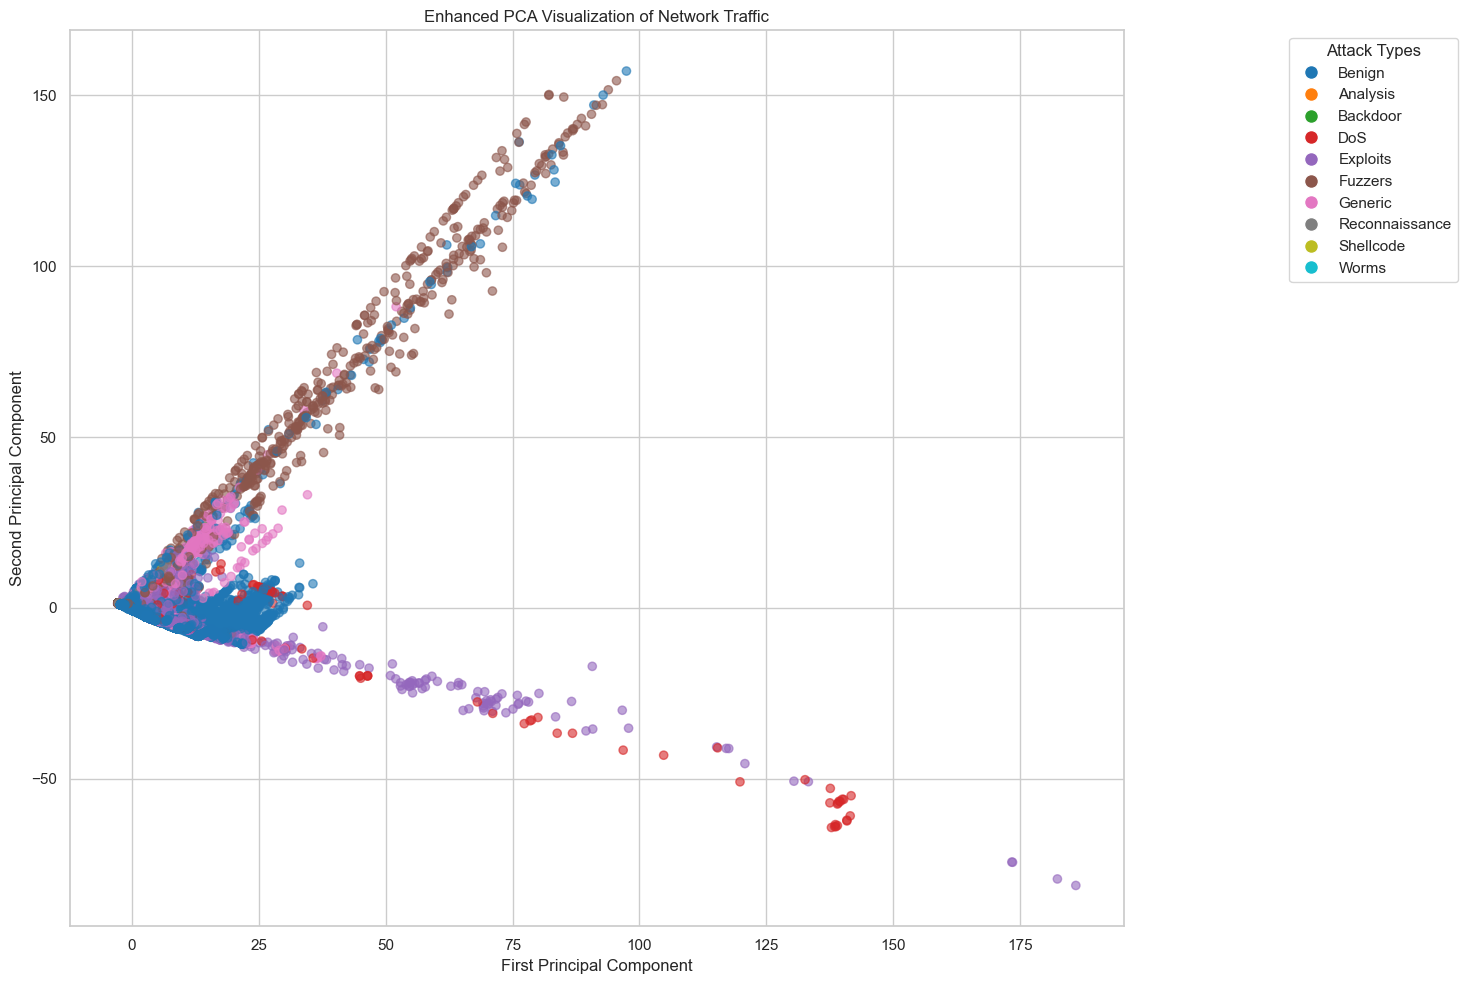

In [10]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=data['attack_type'], cmap='tab10', alpha=0.6)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=plt.cm.tab10(i/10), 
                            label=attack_type[i], markersize=10)
                  for i in range(len(attack_type))]
plt.legend(handles=legend_elements, title='Attack Types', 
          bbox_to_anchor=(1.15, 1), loc='upper left')

plt.title('Enhanced PCA Visualization of Network Traffic')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()
plt.show()

#### Explained Variance Analysis

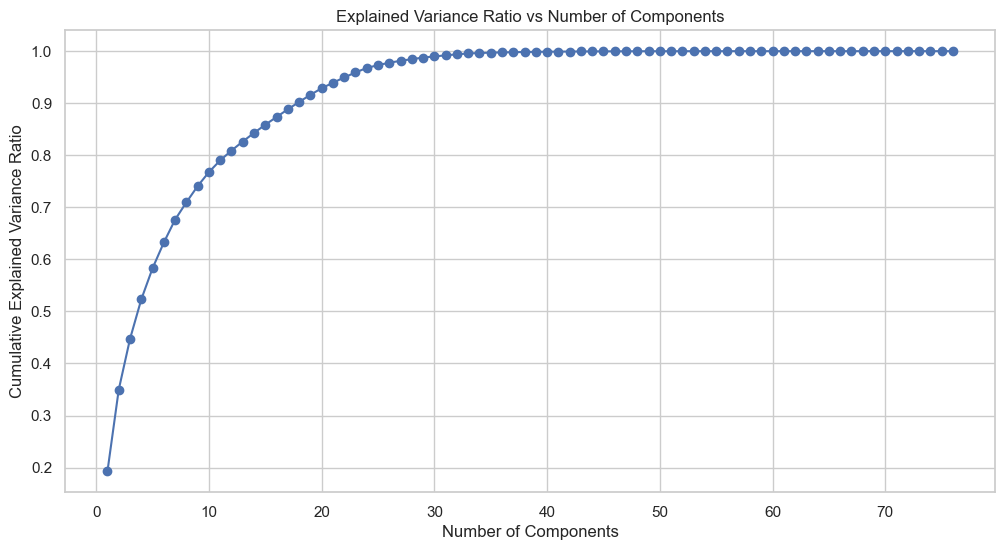


Explained variance ratio by component:
Component 1: 0.193 (19.3%)
Component 2: 0.157 (15.7%)
Component 3: 0.097 (9.7%)
Component 4: 0.076 (7.6%)
Component 5: 0.060 (6.0%)
Component 6: 0.049 (4.9%)
Component 7: 0.044 (4.4%)
Component 8: 0.033 (3.3%)
Component 9: 0.031 (3.1%)
Component 10: 0.027 (2.7%)

Total variance explained by first two components: 35.0%


In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Print explained variance for first 10 components
print("\nExplained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio[:10]):
    print(f"Component {i+1}: {var:.3f} ({var*100:.1f}%)")

print(f"\nTotal variance explained by first two components: "
      f"{(explained_variance_ratio[0] + explained_variance_ratio[1])*100:.1f}%")

#### Feature Contribution Analysis


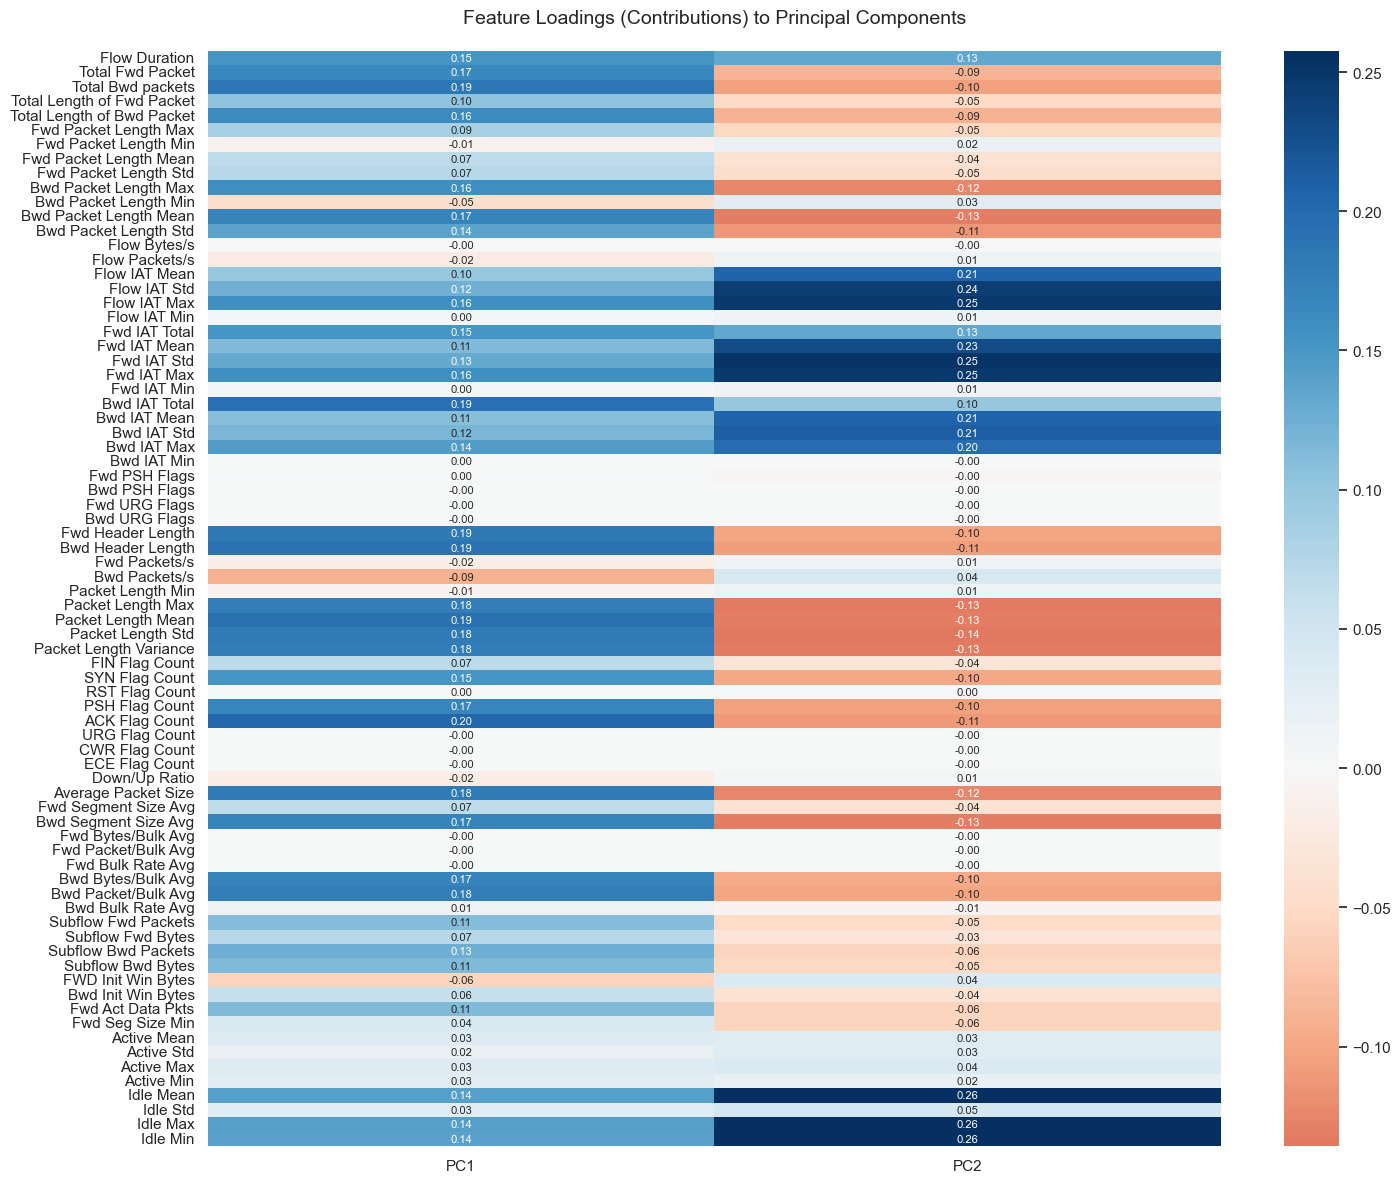


Top 10 contributing features to each principal component:

PC1:
ACK Flag Count: 0.204
Bwd IAT Total: 0.194
Packet Length Mean: 0.192
Bwd Header Length: 0.189
Total Bwd packets: 0.187
Fwd Header Length: 0.185
Average Packet Size: 0.182
Packet Length Std: 0.181
Packet Length Variance: 0.180
Bwd Packet/Bulk Avg: 0.179

PC2:
Idle Max: 0.258
Idle Mean: 0.257
Idle Min: 0.255
Fwd IAT Std: 0.252
Flow IAT Max: 0.248
Fwd IAT Max: 0.248
Flow IAT Std: 0.243
Fwd IAT Mean: 0.230
Bwd IAT Std: 0.213
Bwd IAT Mean: 0.207


In [12]:
n_components = 2
feature_names = numeric_data.columns

# Get feature loadings (coefficients) for the first two components
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=numeric_data.columns
)

plt.figure(figsize=(15, 12))
sns.heatmap(loadings, 
            cmap='RdBu',
            center=0,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 8},
            yticklabels=loadings.index,
            xticklabels=['PC1', 'PC2'])

plt.title('Feature Loadings (Contributions) to Principal Components', 
          pad=20,
          size=14)

plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print top contributing features
print("\nTop 10 contributing features to each principal component:")
for pc in ['PC1', 'PC2']:
    print(f"\n{pc}:")
    top_features = loadings[pc].abs().sort_values(ascending=False)[:10]
    for feat, contrib in top_features.items():
        print(f"{feat}: {contrib:.3f}")

#### Outlier Analysis



Outlier Analysis:
Number of potential outliers (>99th percentile): 4480


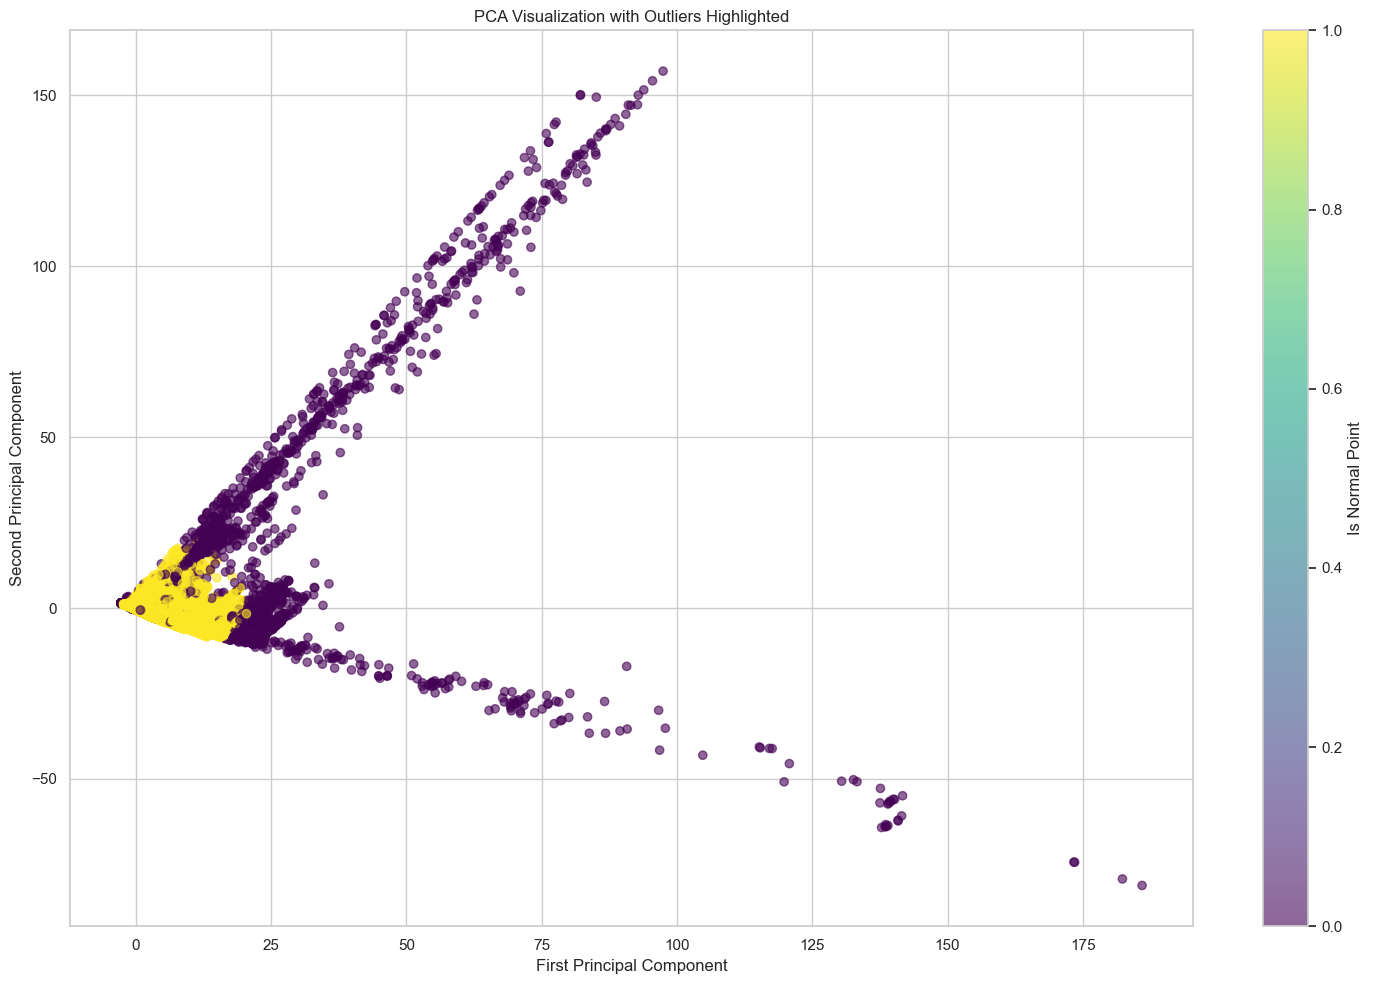

In [13]:
distances = np.sqrt(np.sum(pca_result**2, axis=1))
threshold = np.percentile(distances, 99)

print("\nOutlier Analysis:")
print(f"Number of potential outliers (>99th percentile): "
      f"{sum(distances > threshold)}")

# Plot with outliers highlighted
plt.figure(figsize=(15, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1],
           c=distances <= threshold, cmap='viridis', alpha=0.6)
plt.colorbar(label='Is Normal Point')
plt.title('PCA Visualization with Outliers Highlighted')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.tight_layout()
plt.show()

### Box plots for key features by attack type

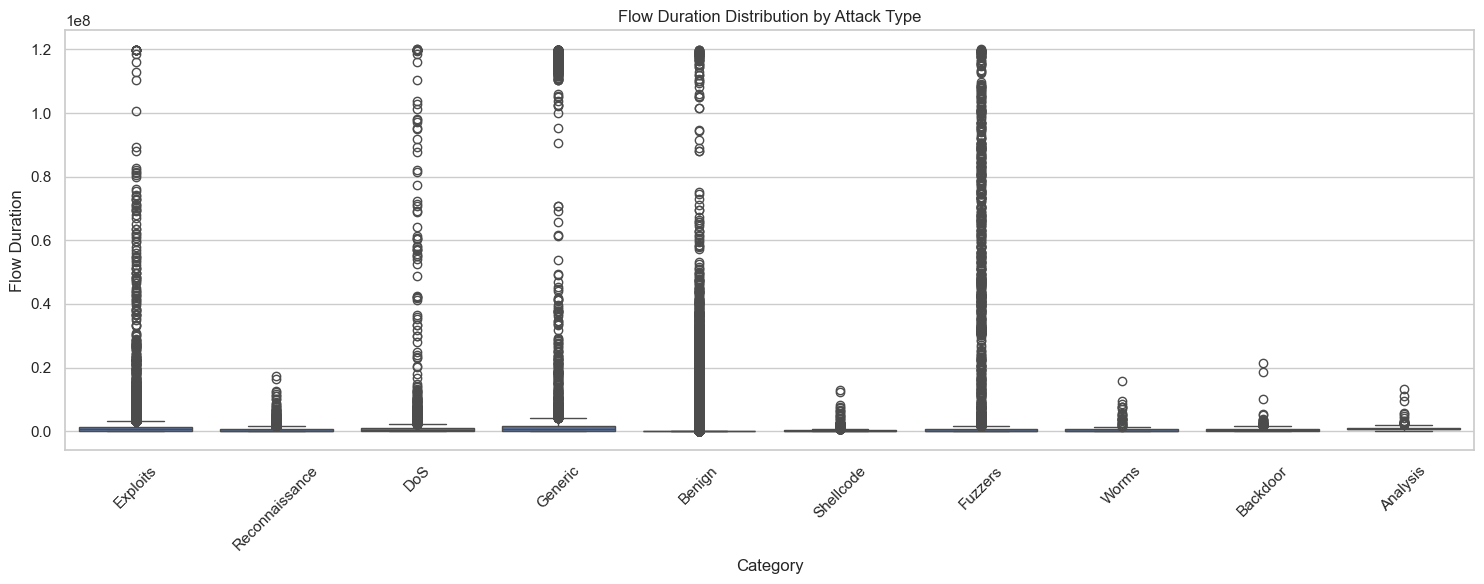

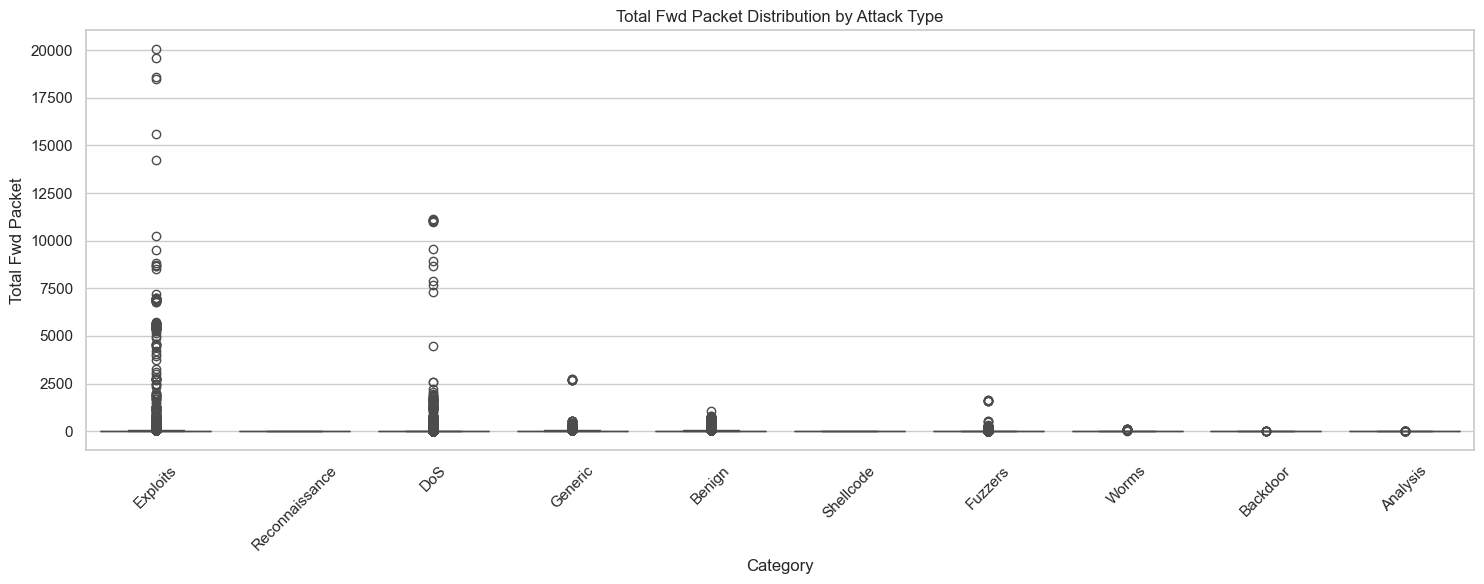

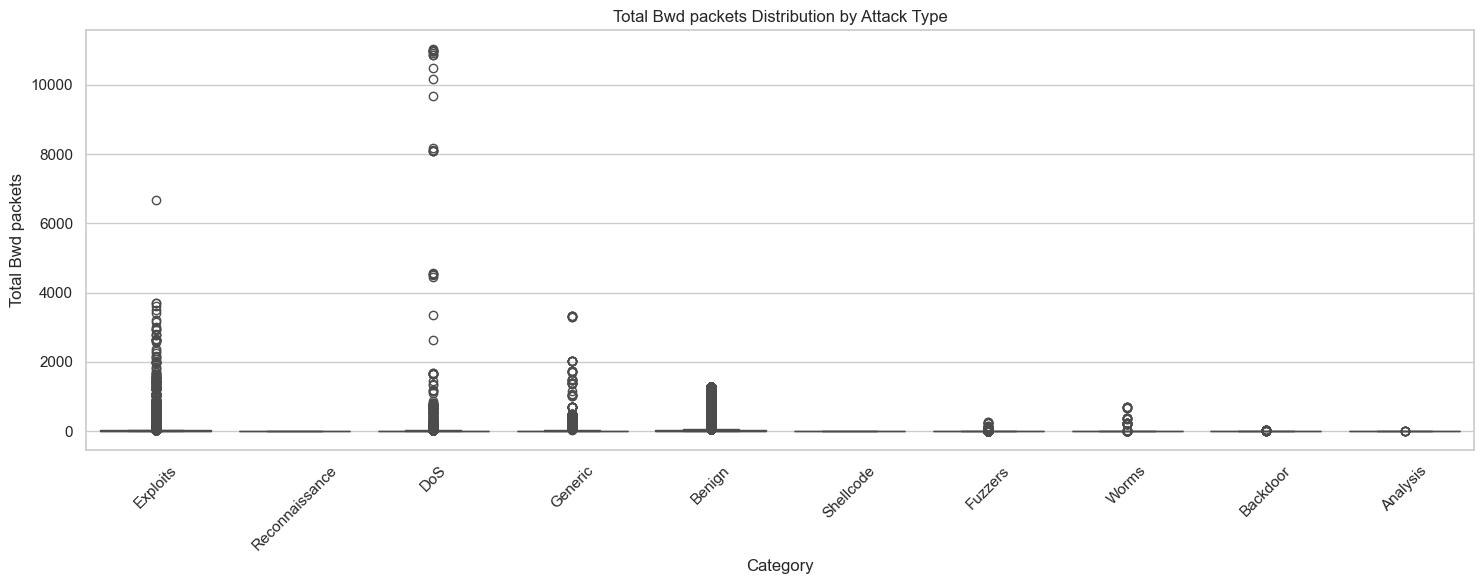

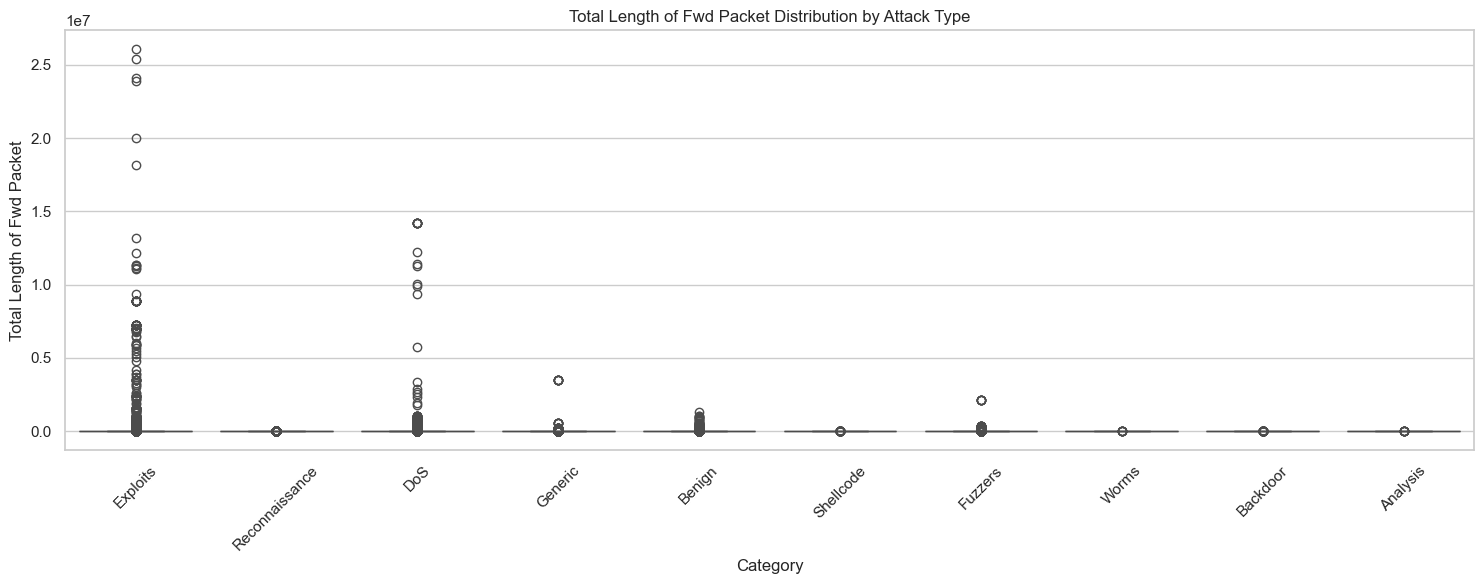

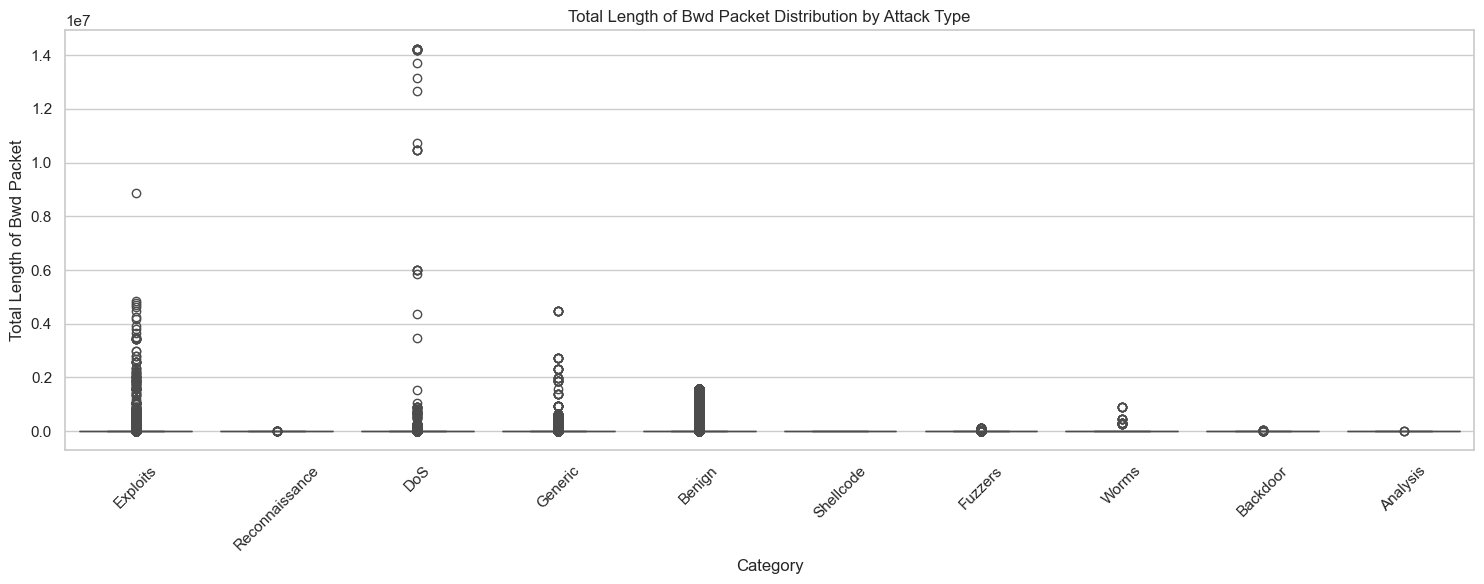

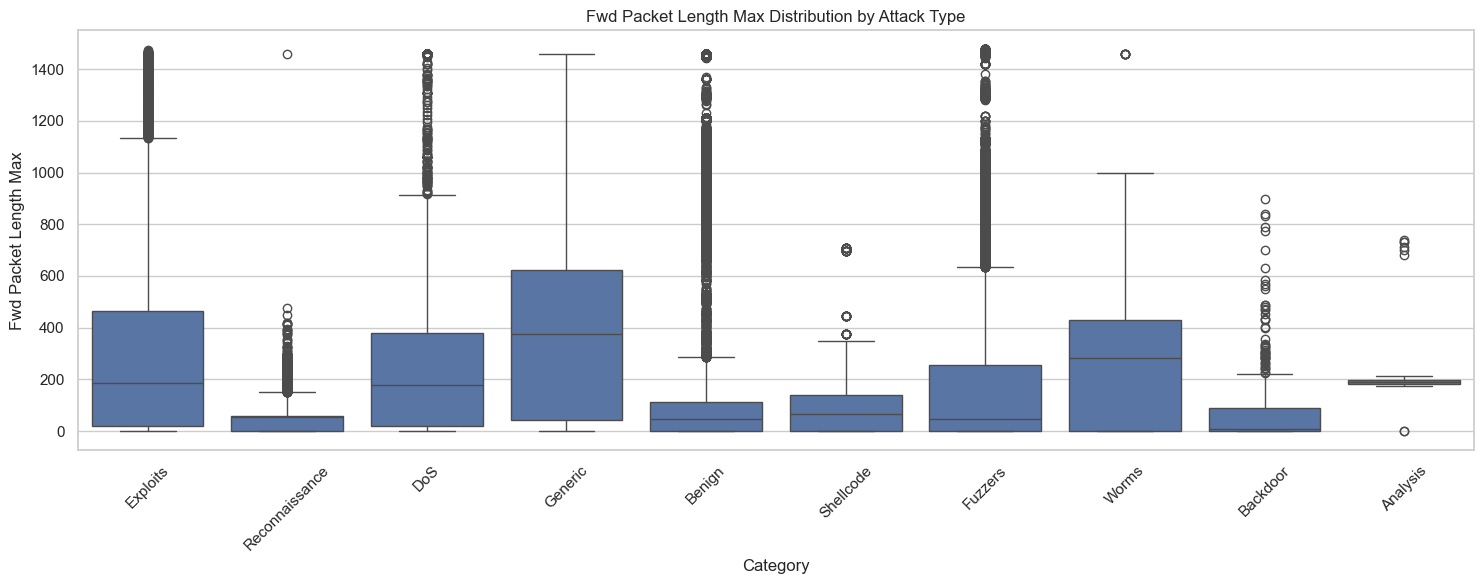

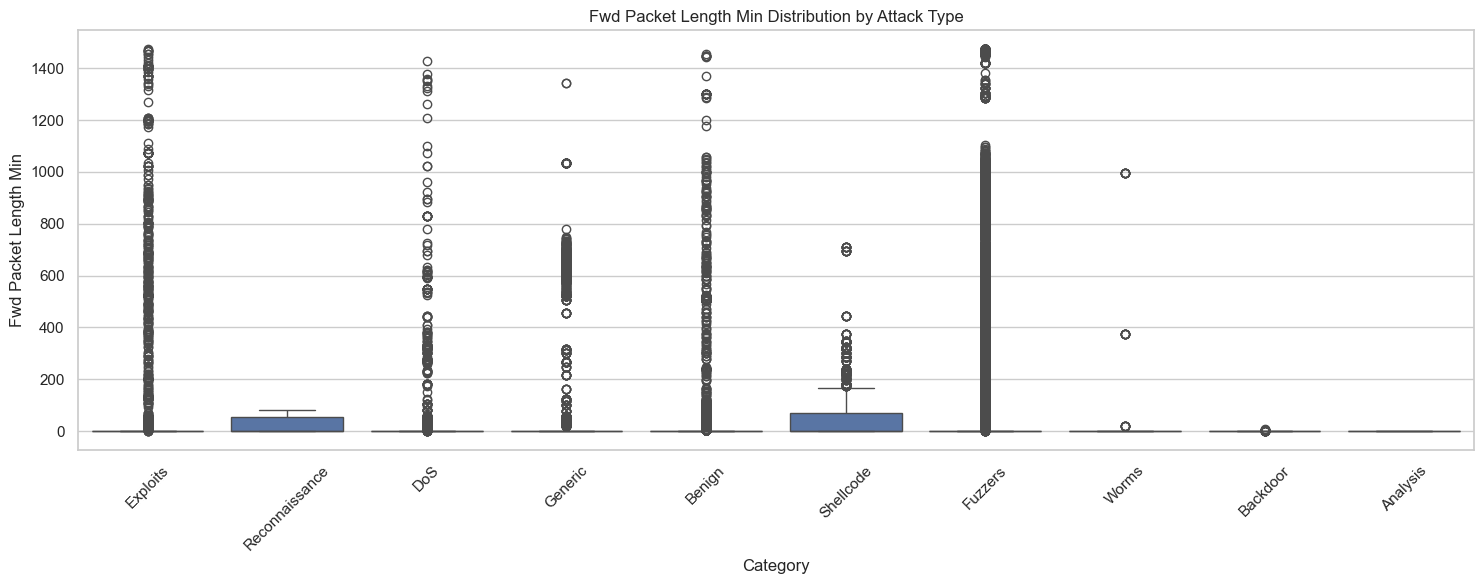

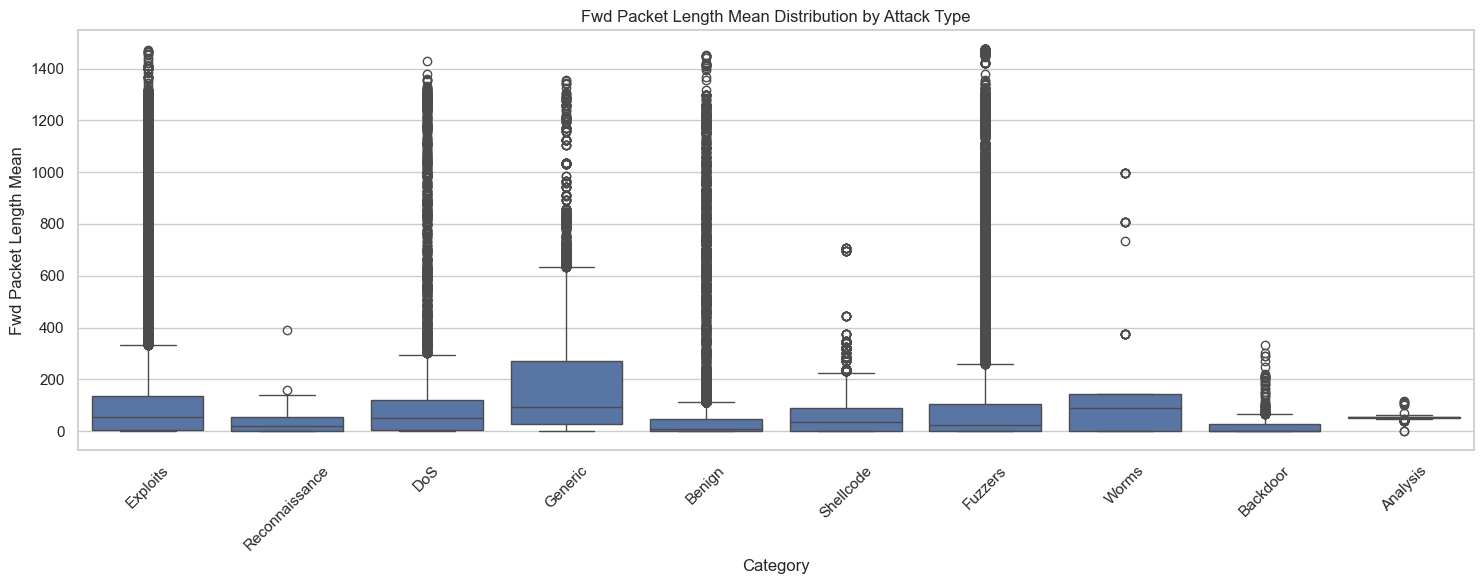

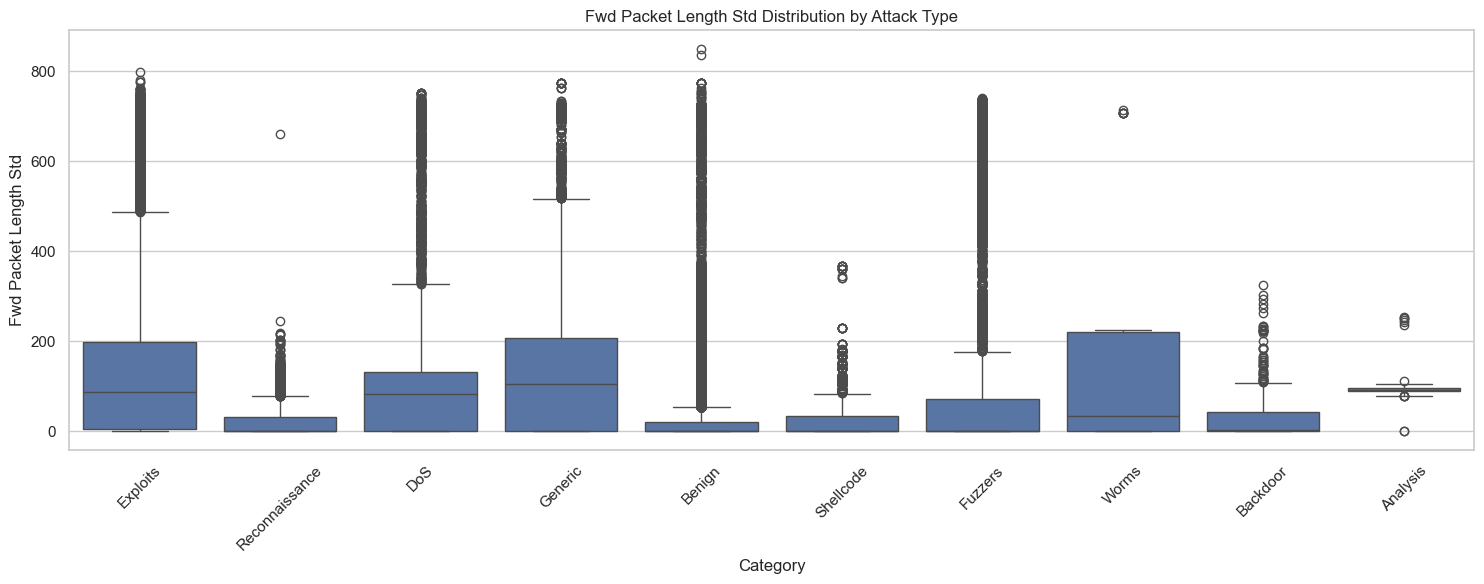

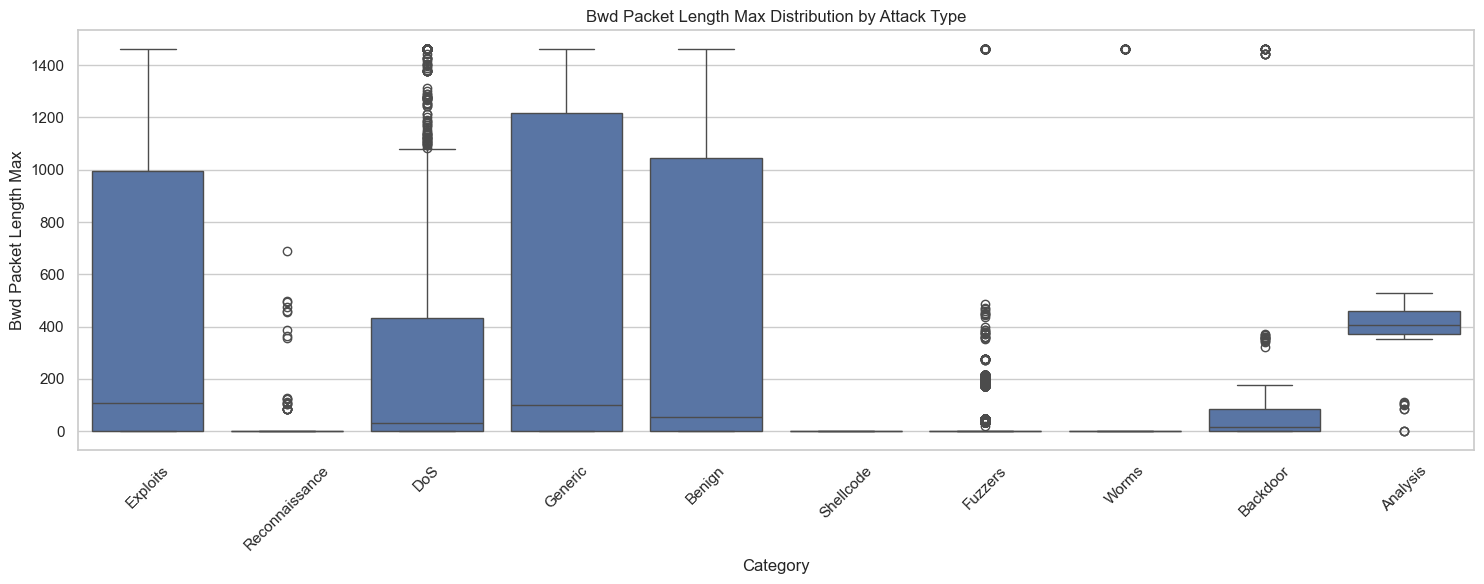

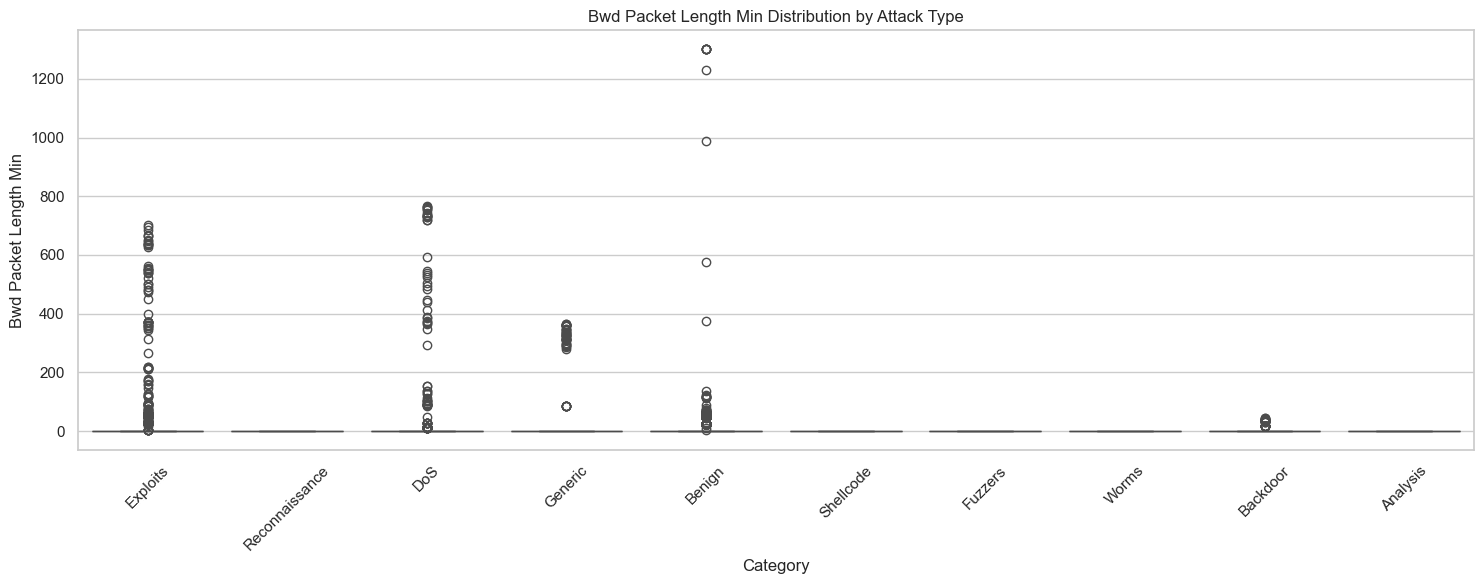

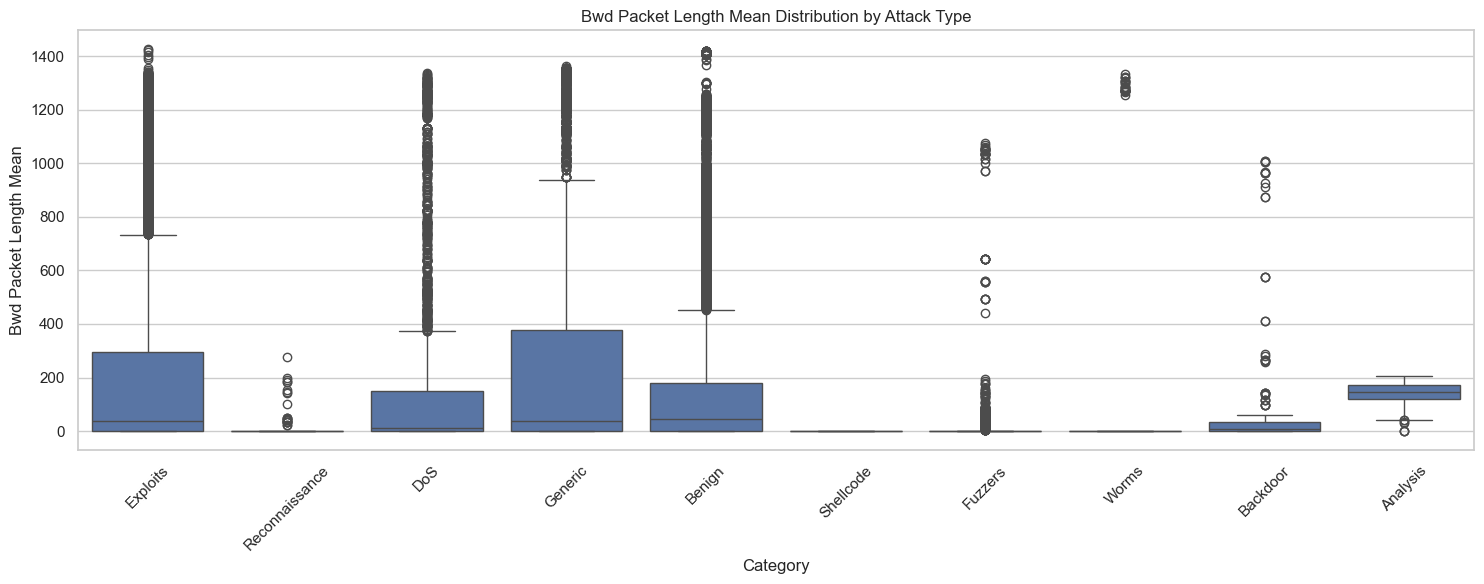

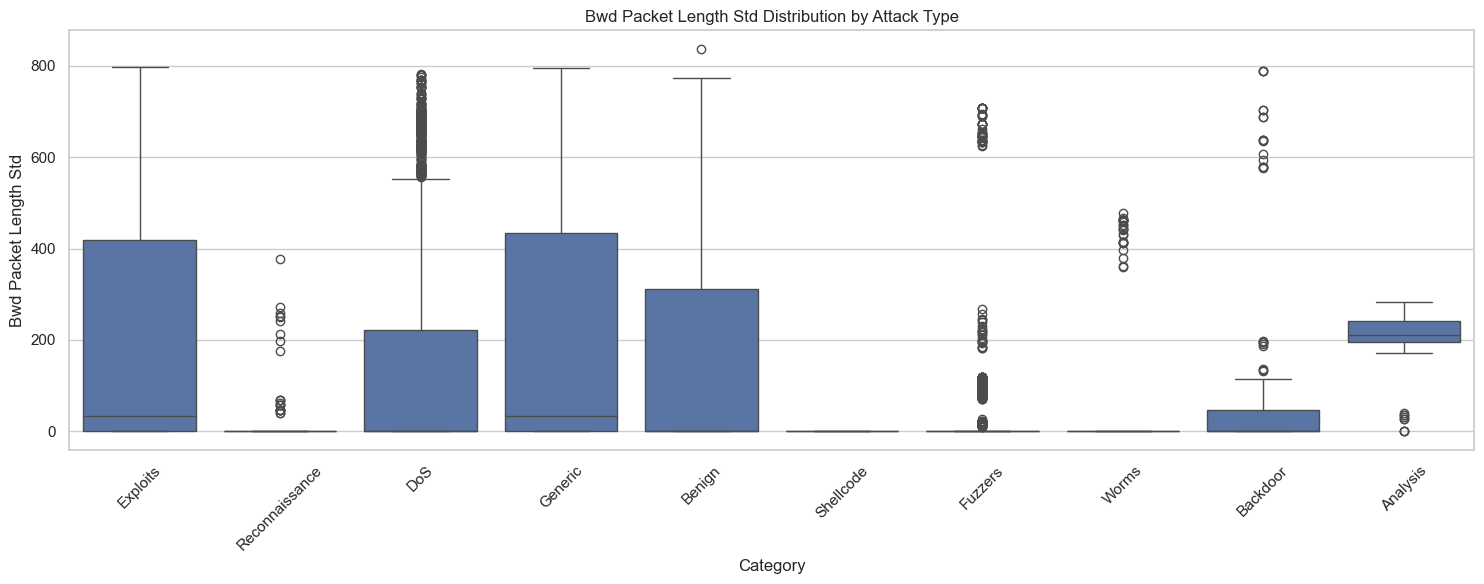

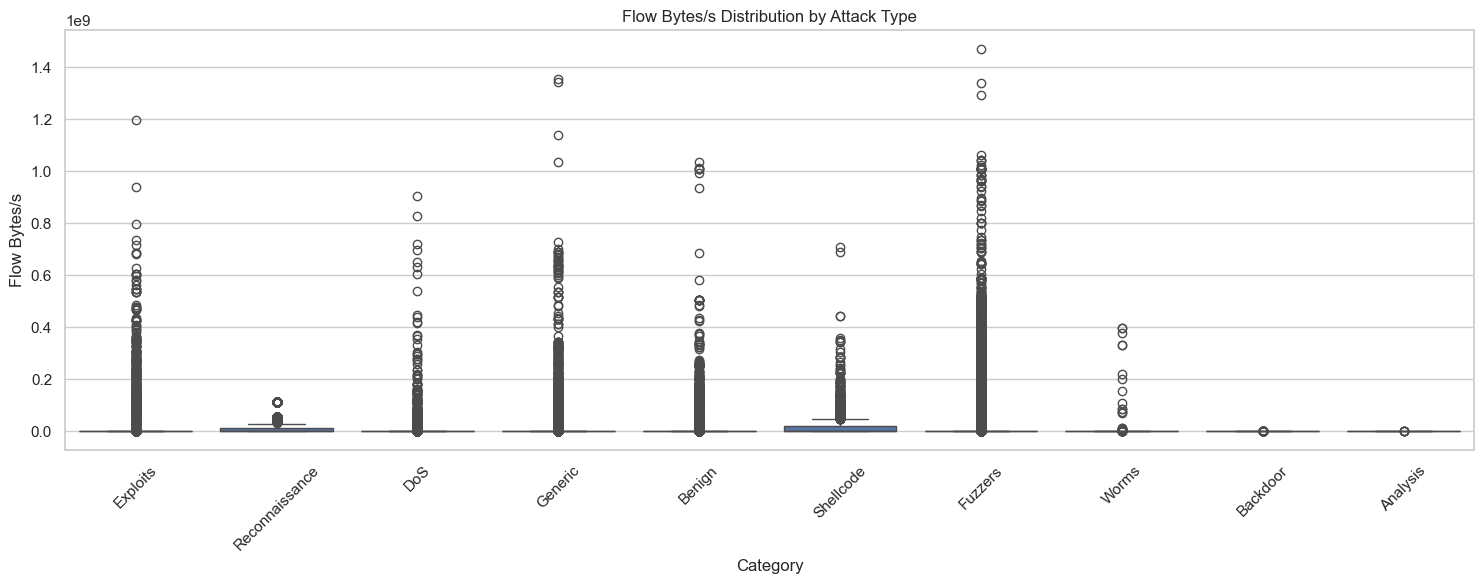

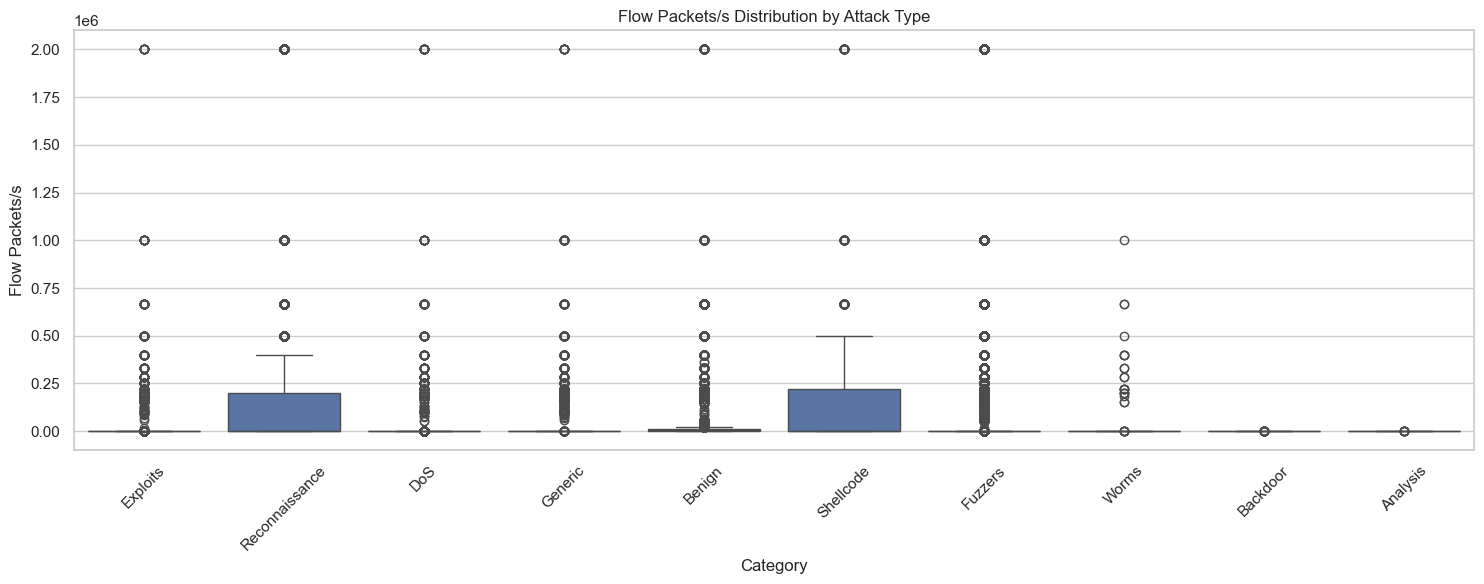

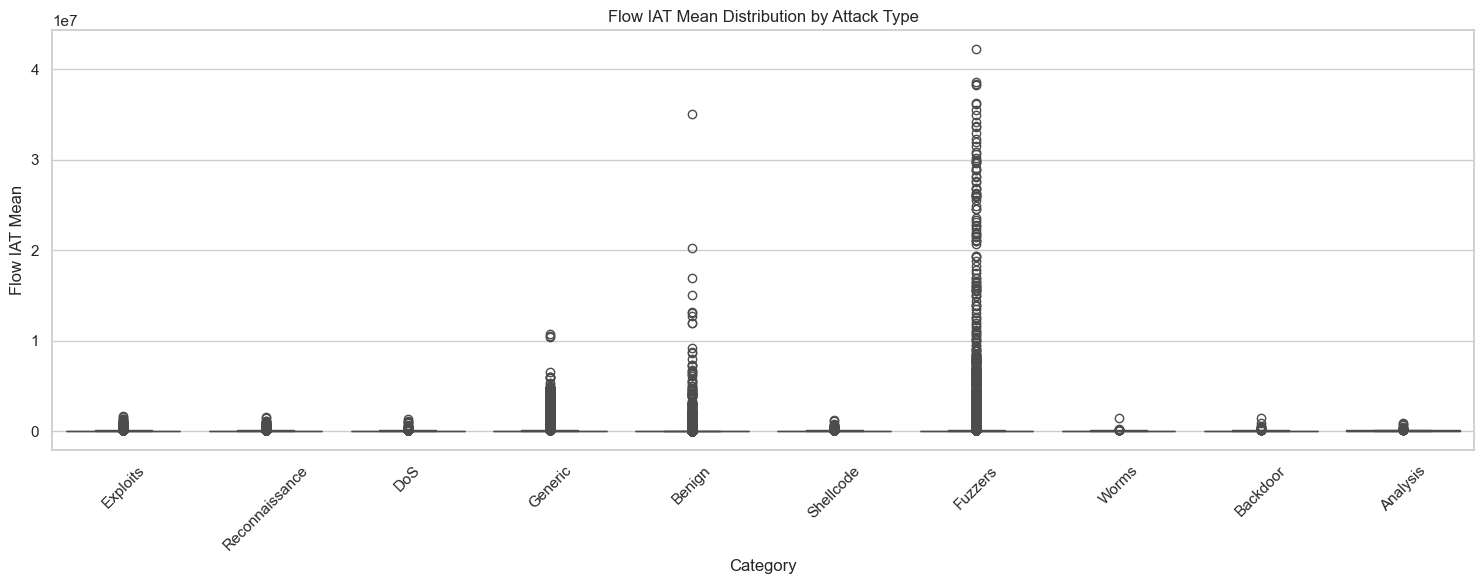

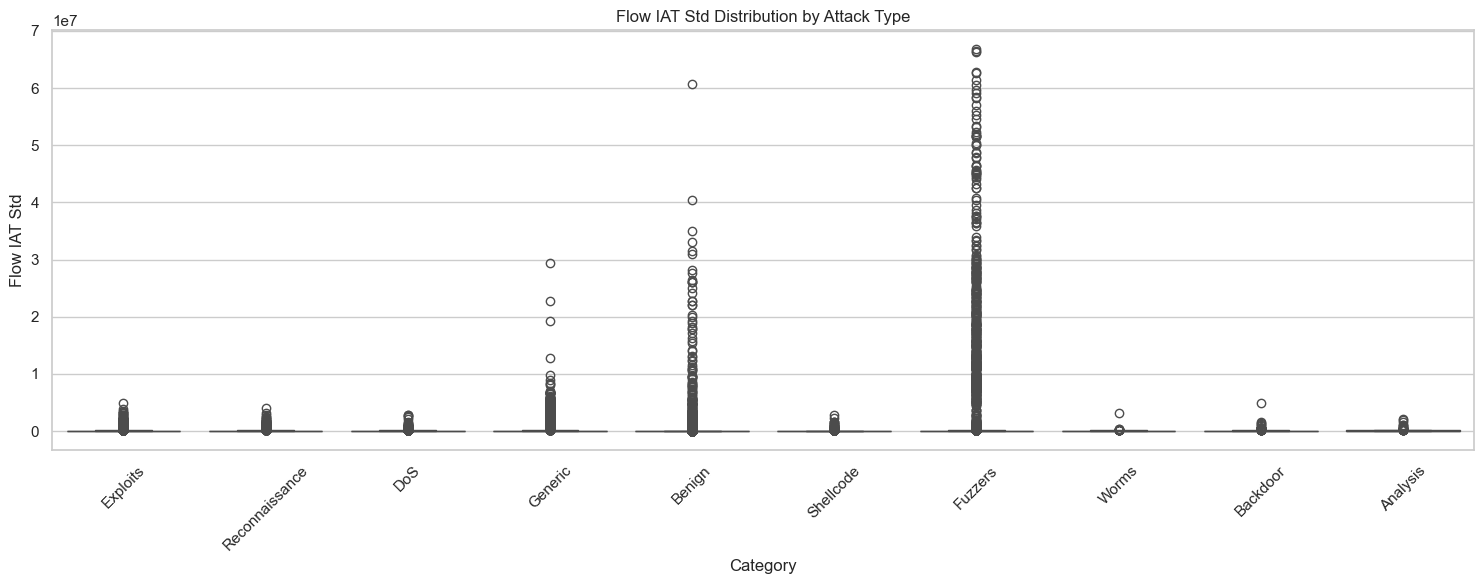

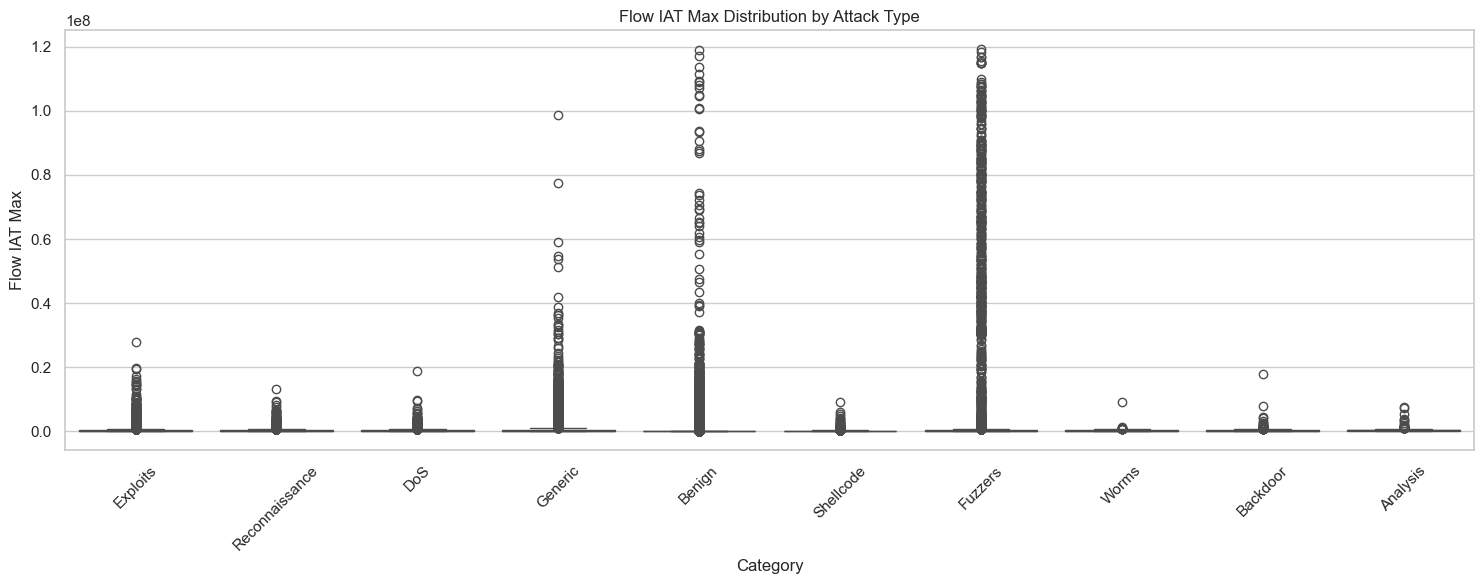

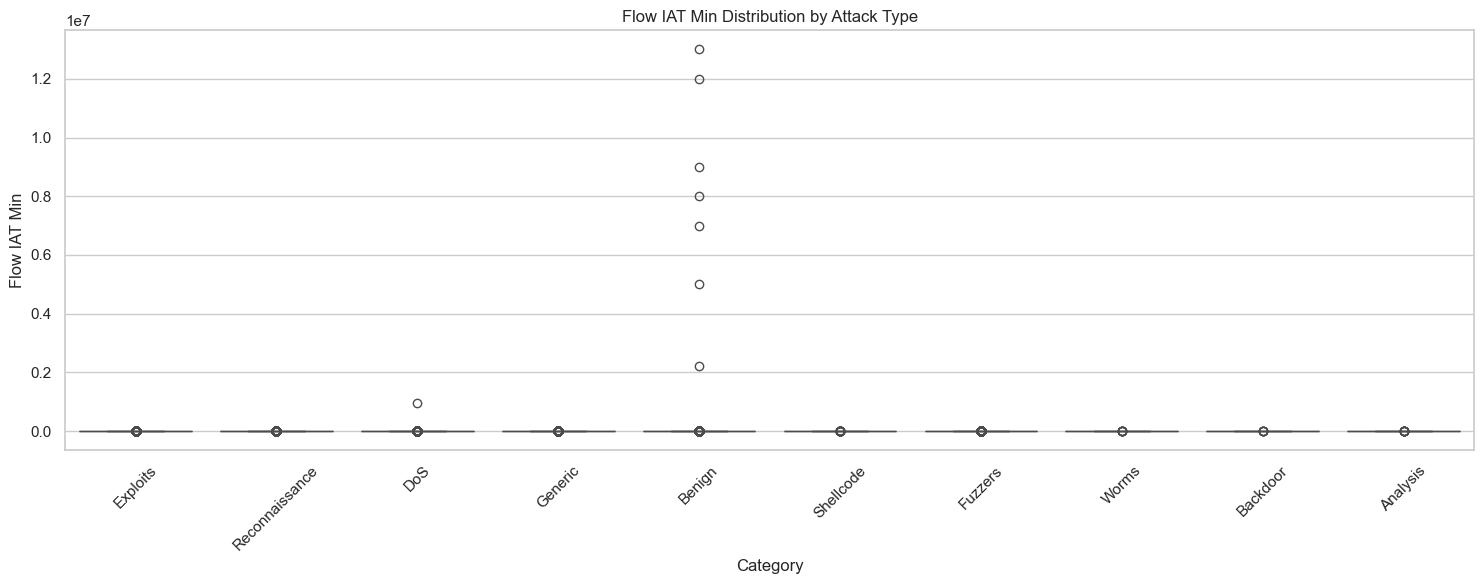

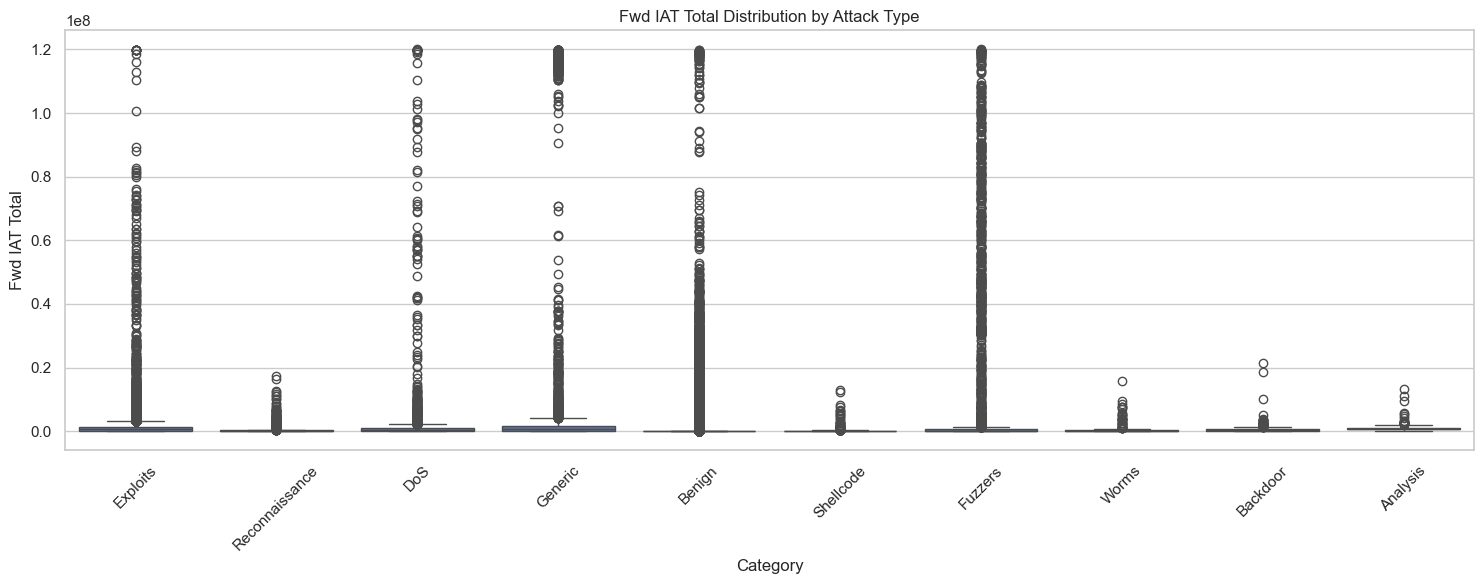

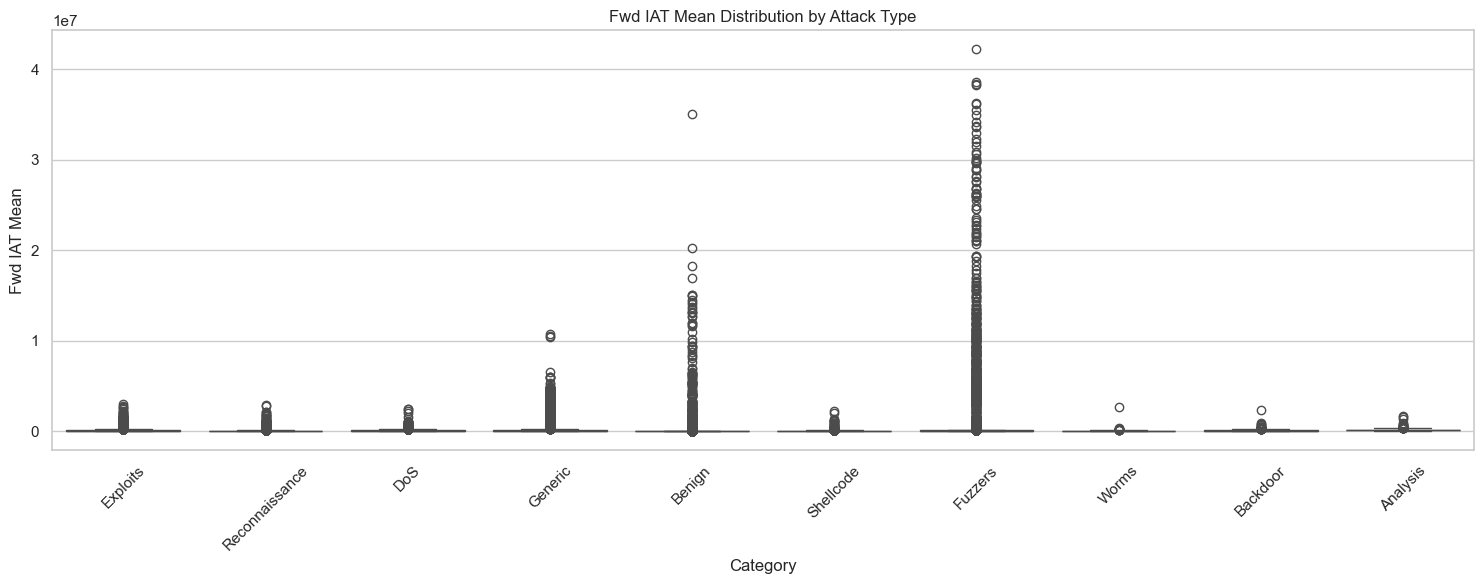

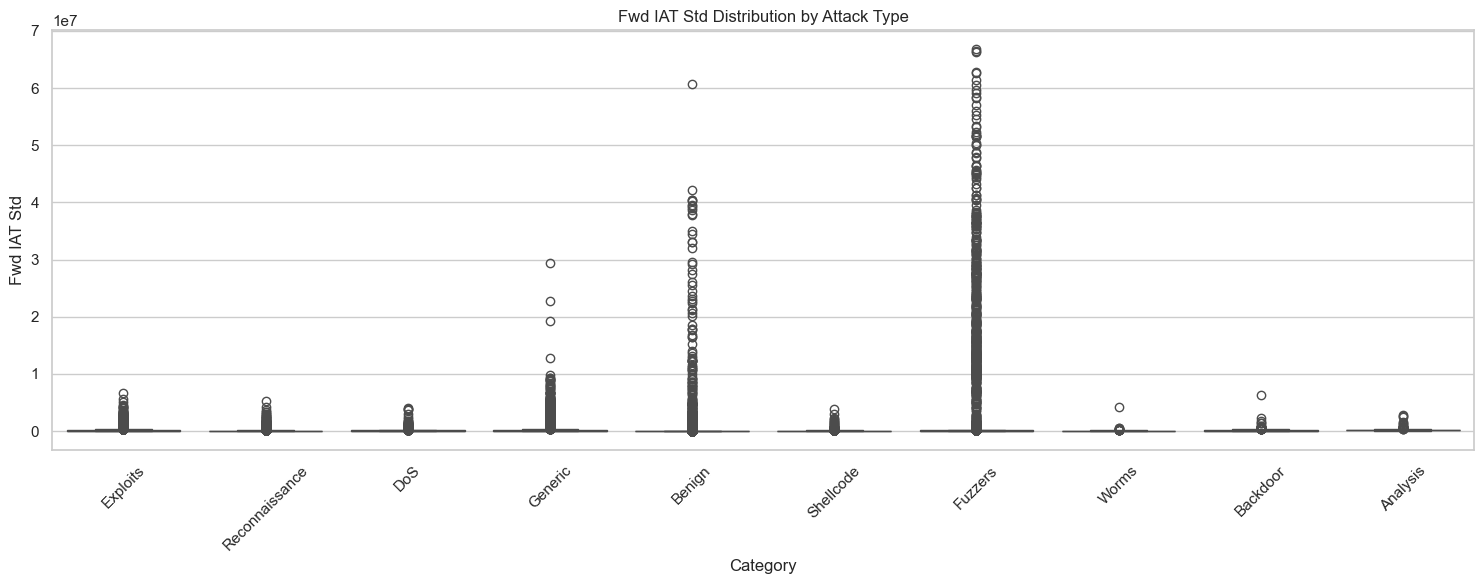

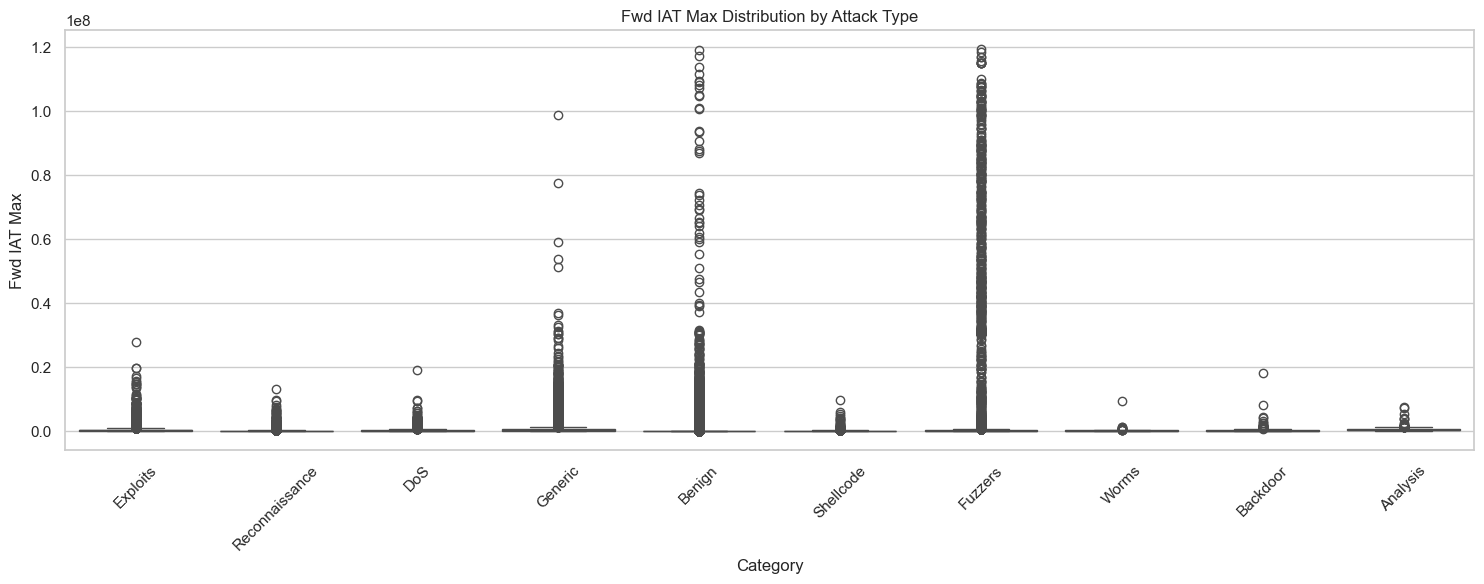

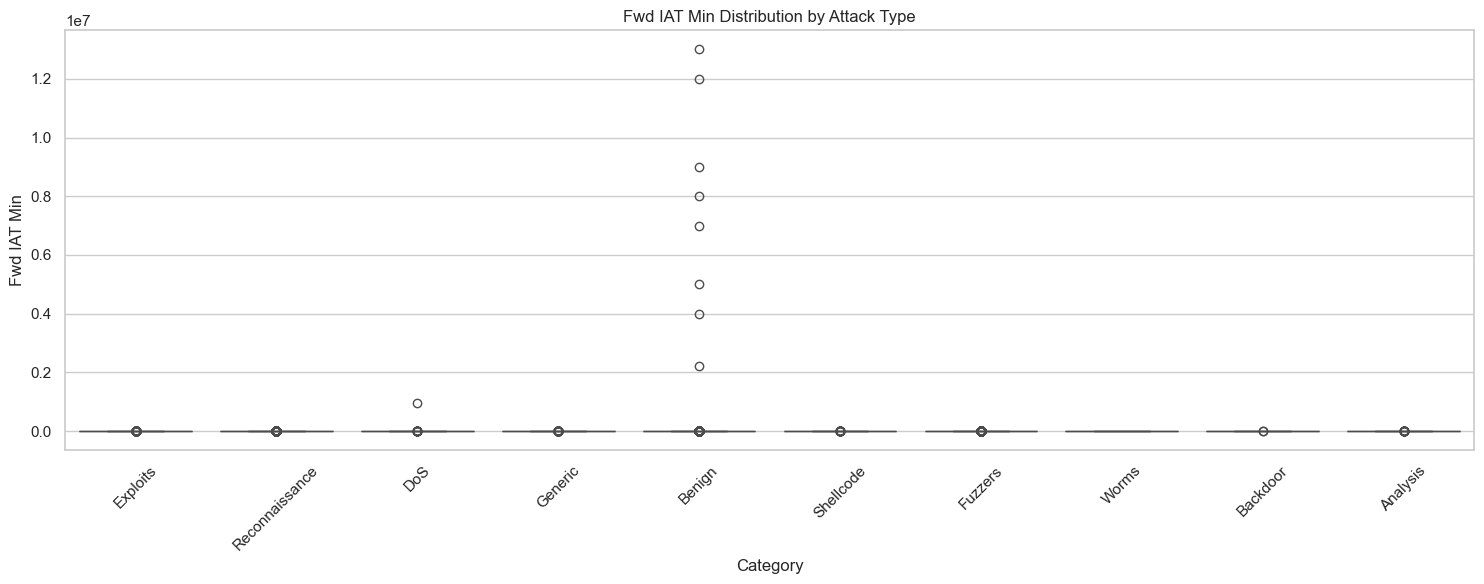

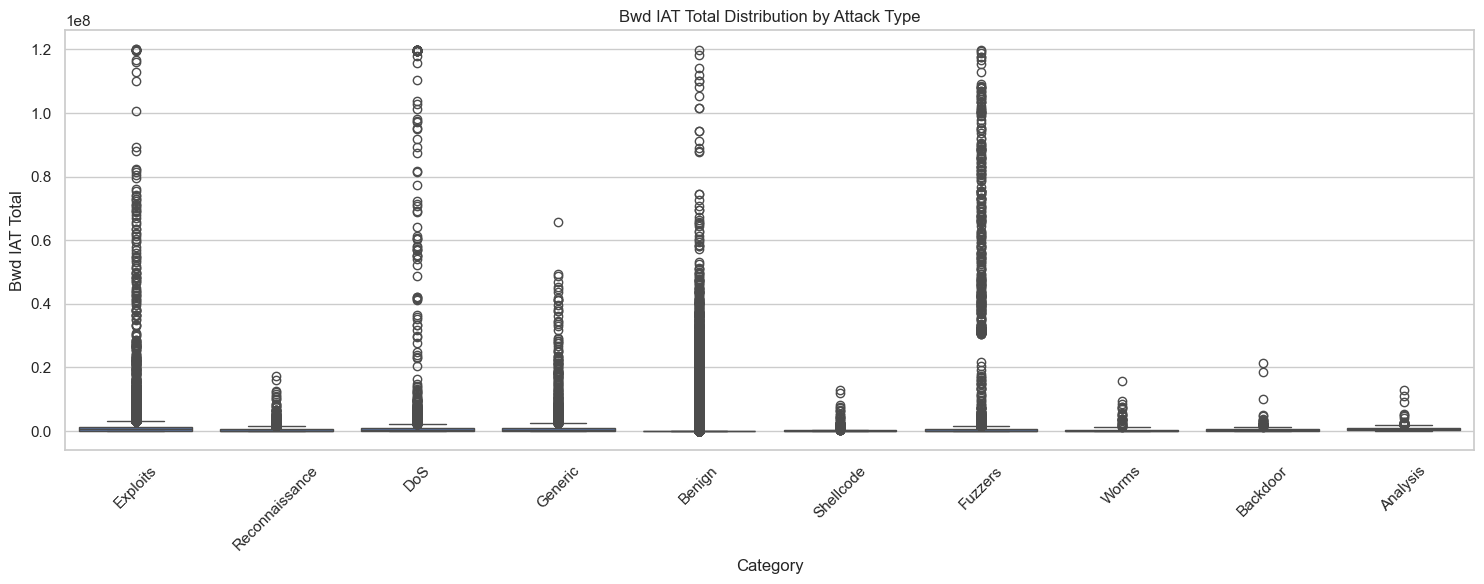

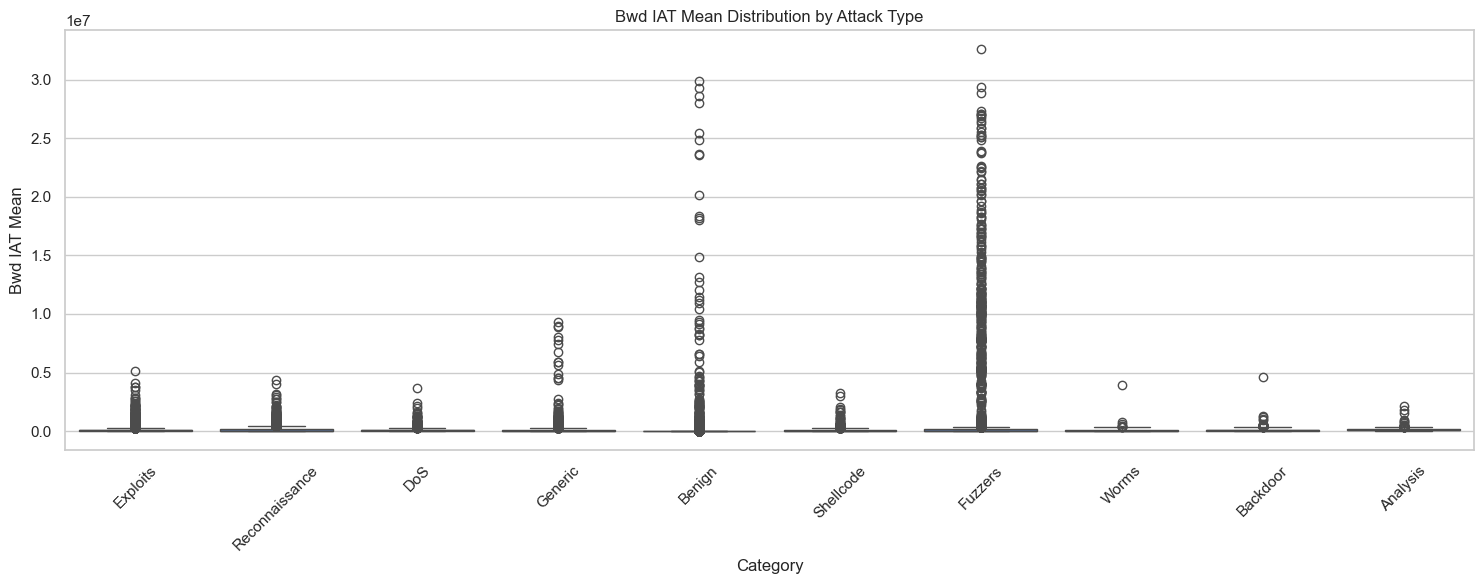

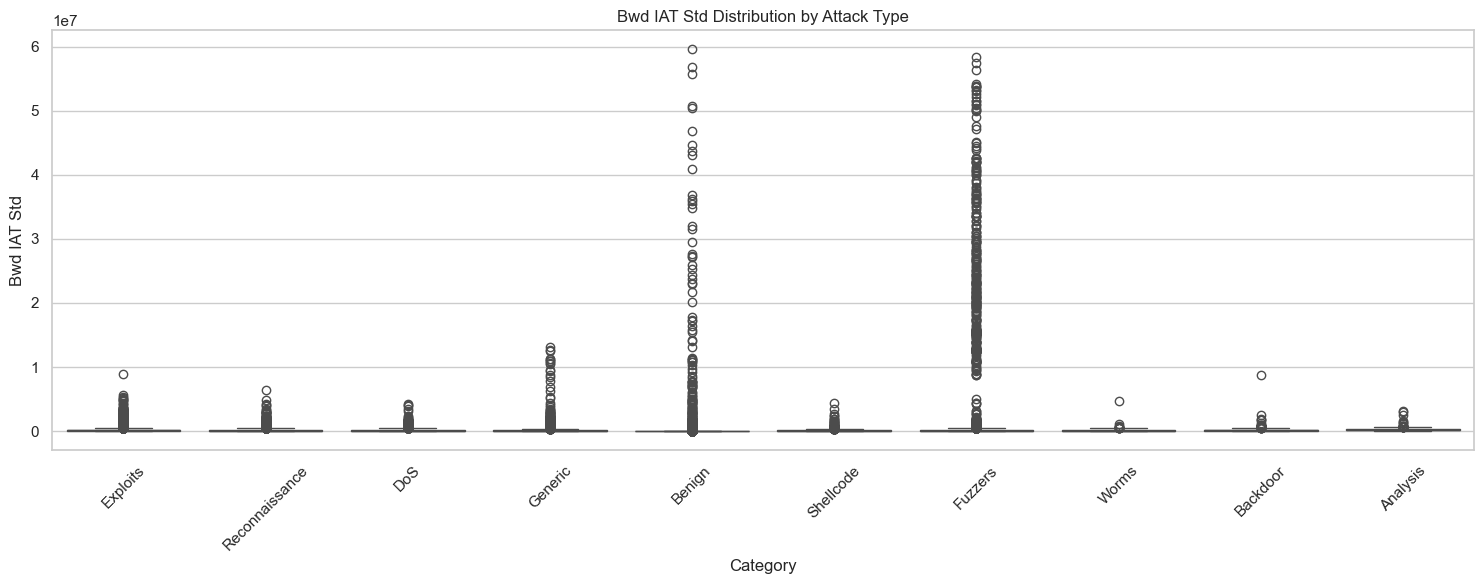

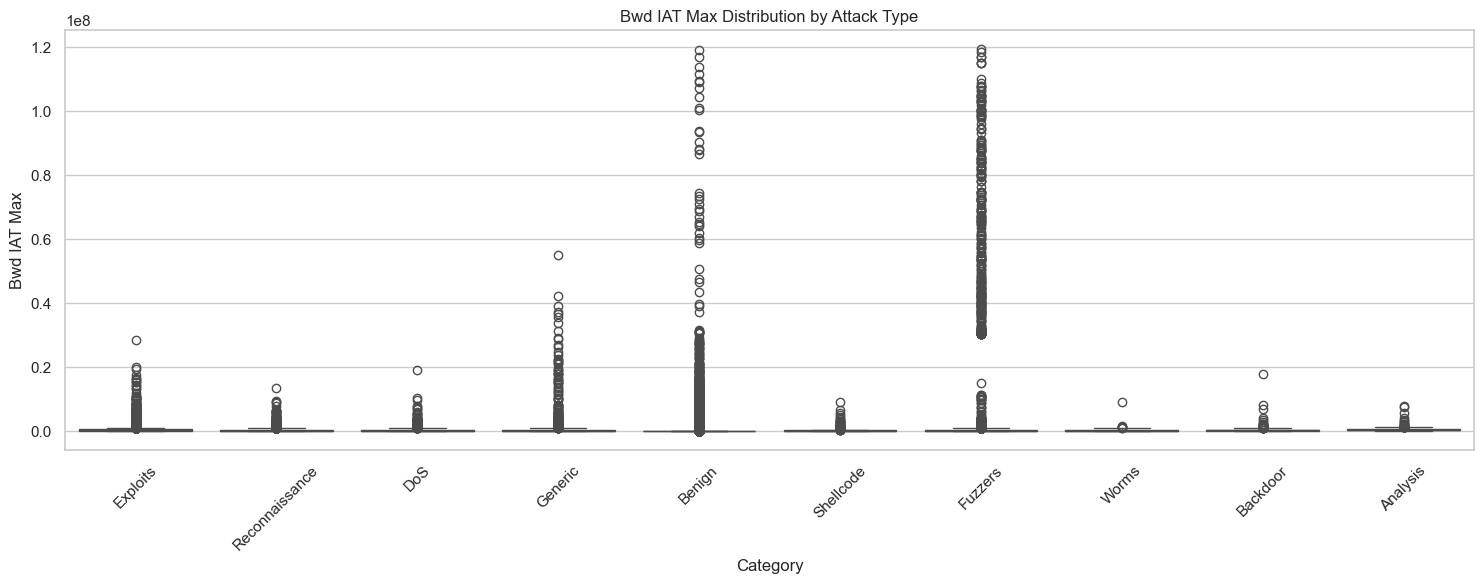

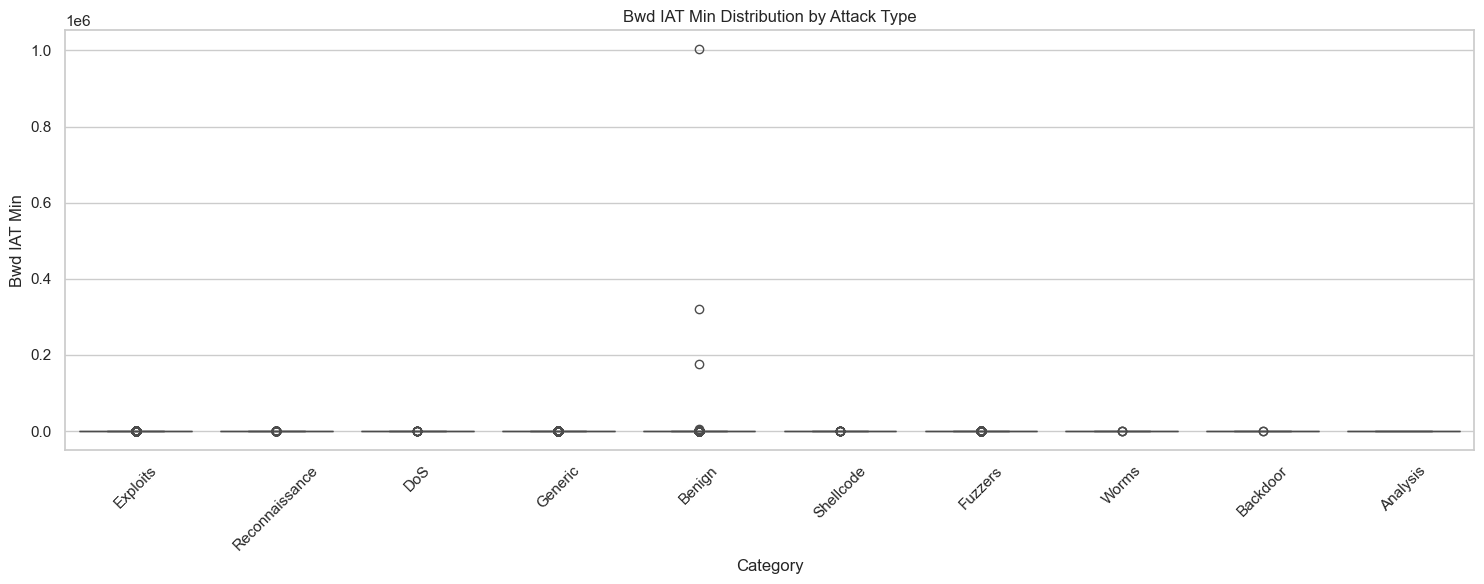

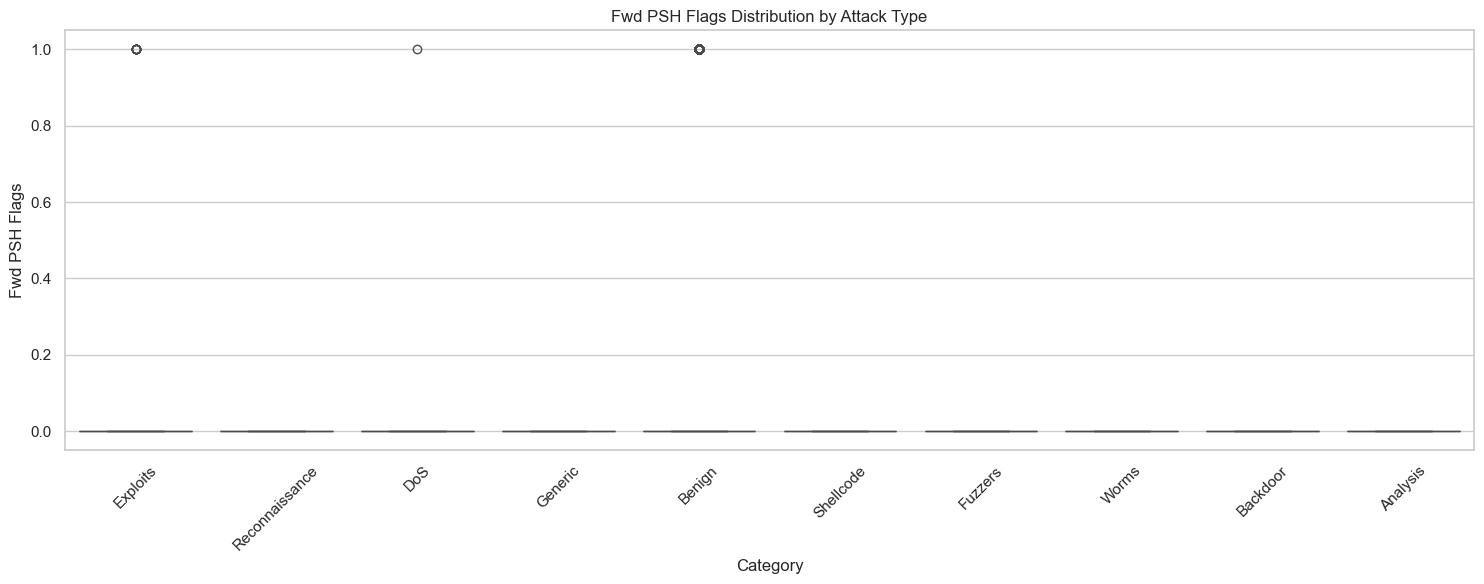

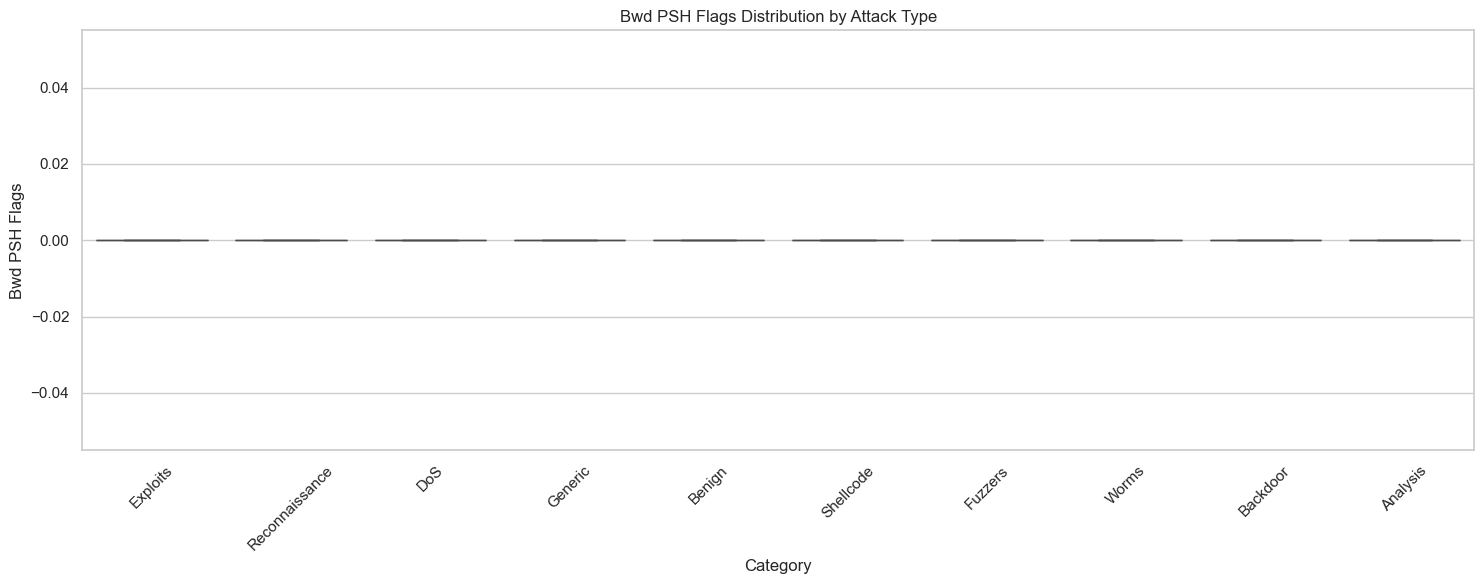

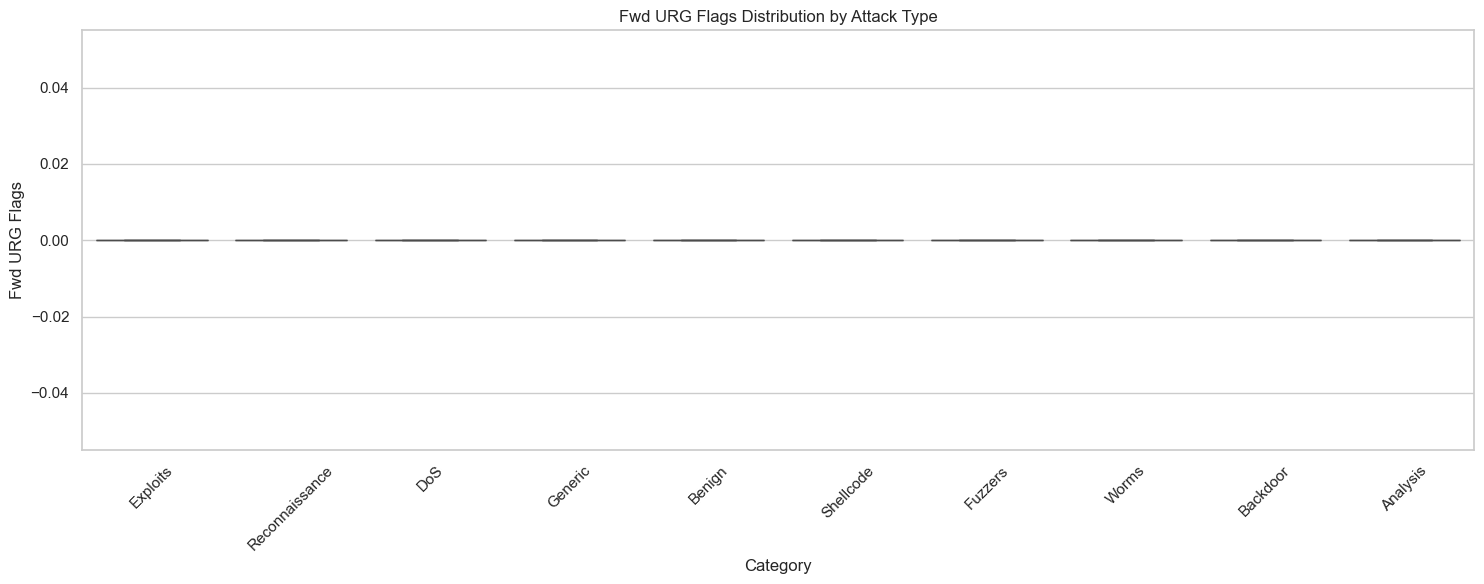

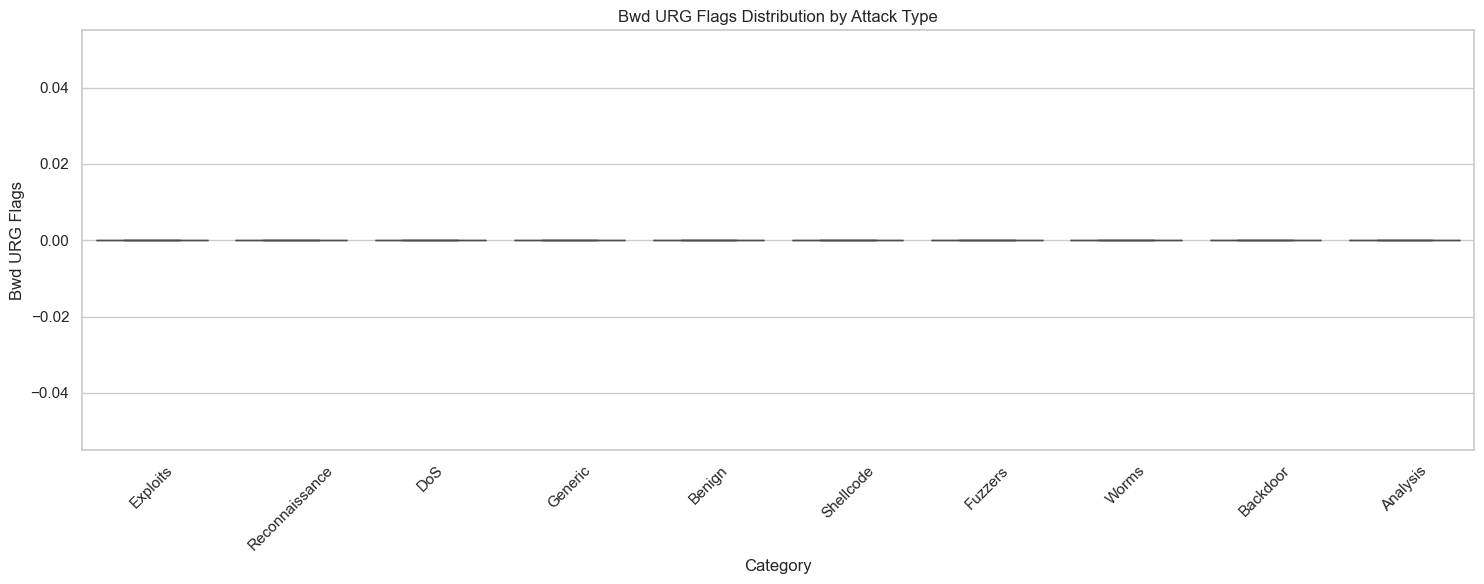

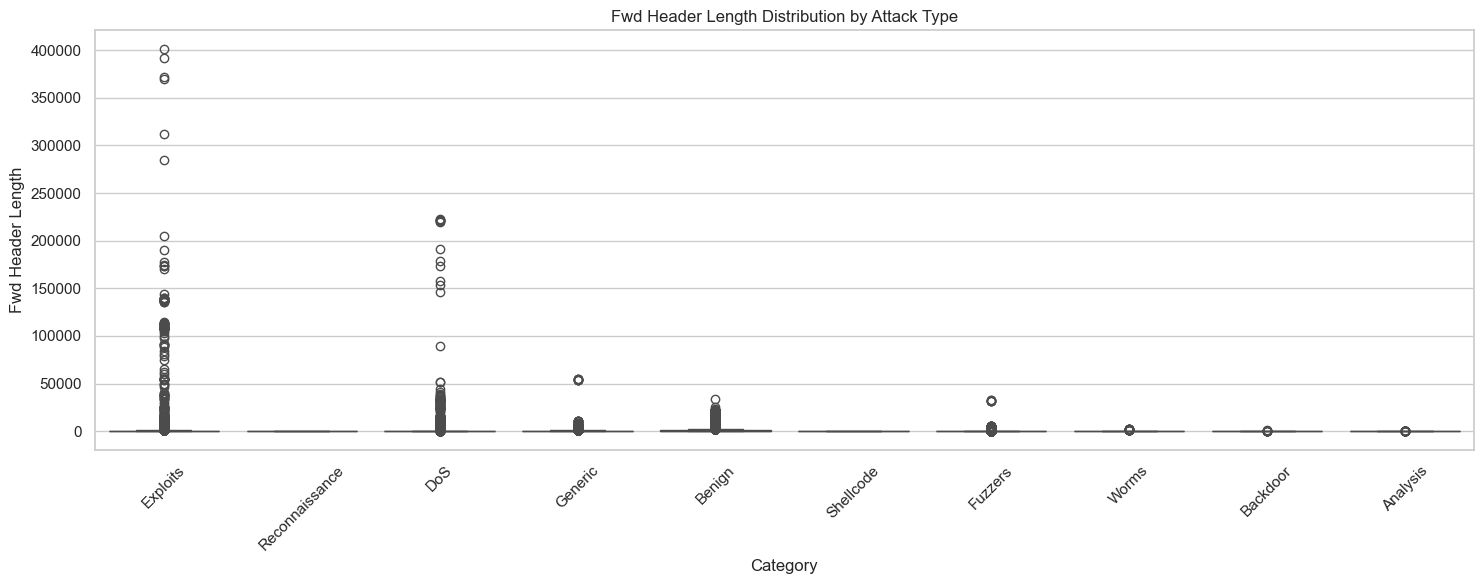

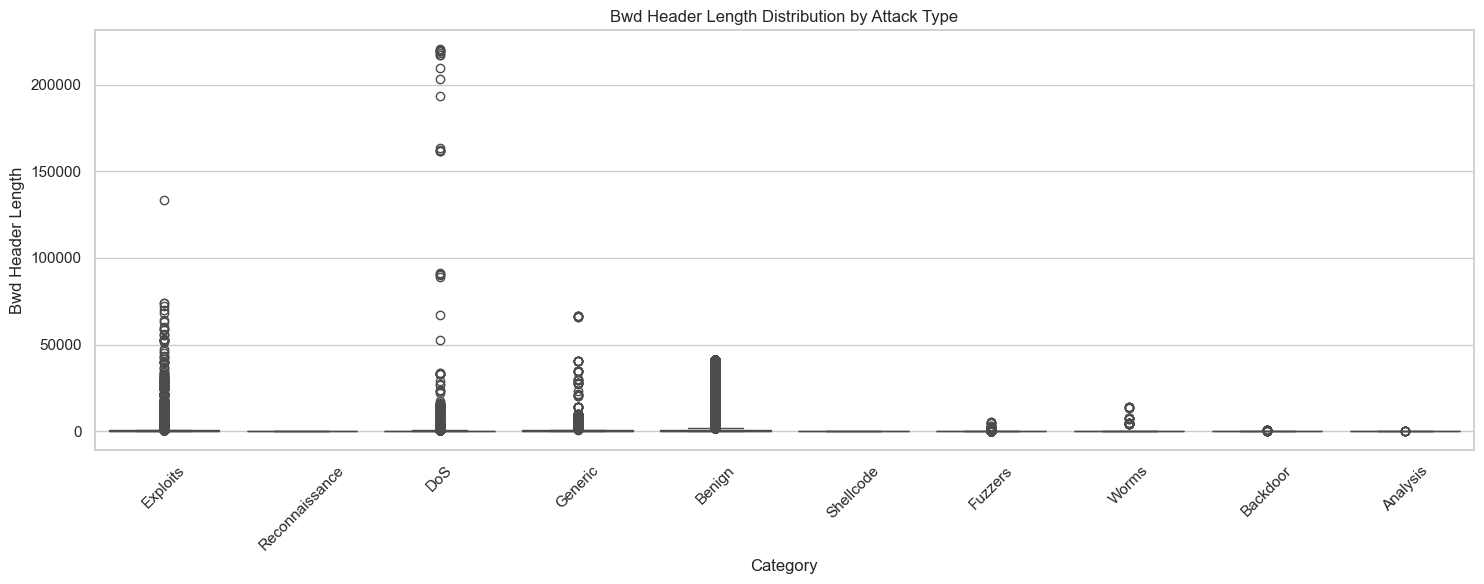

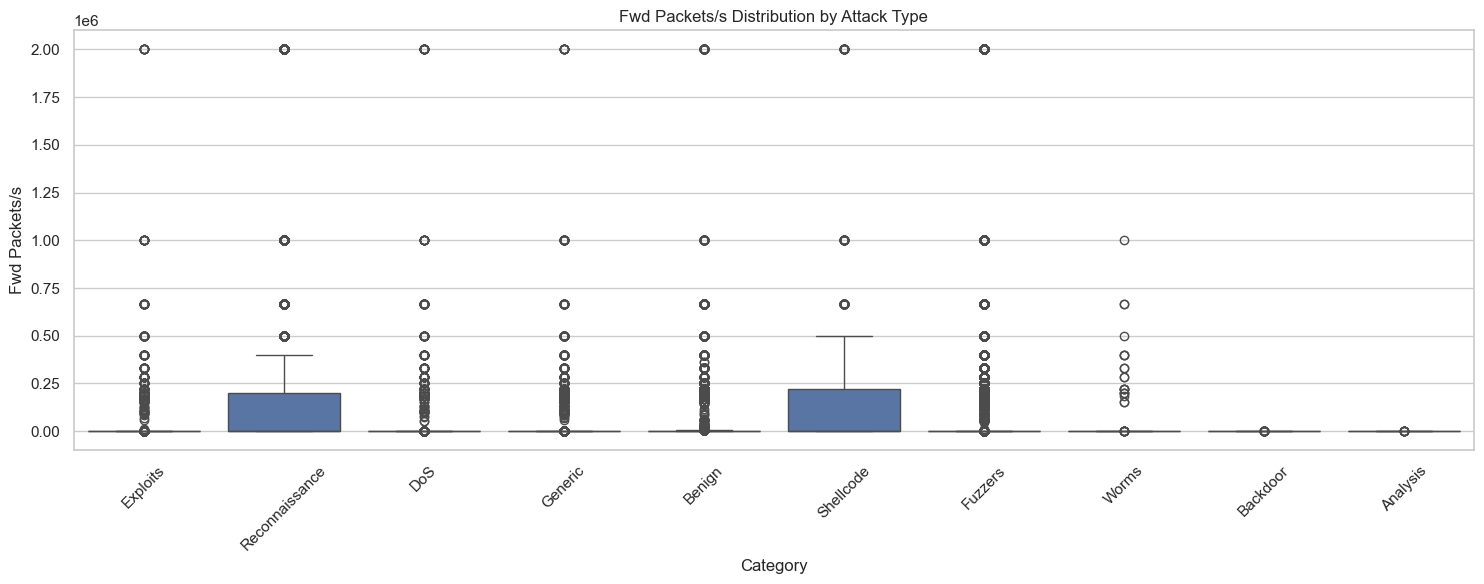

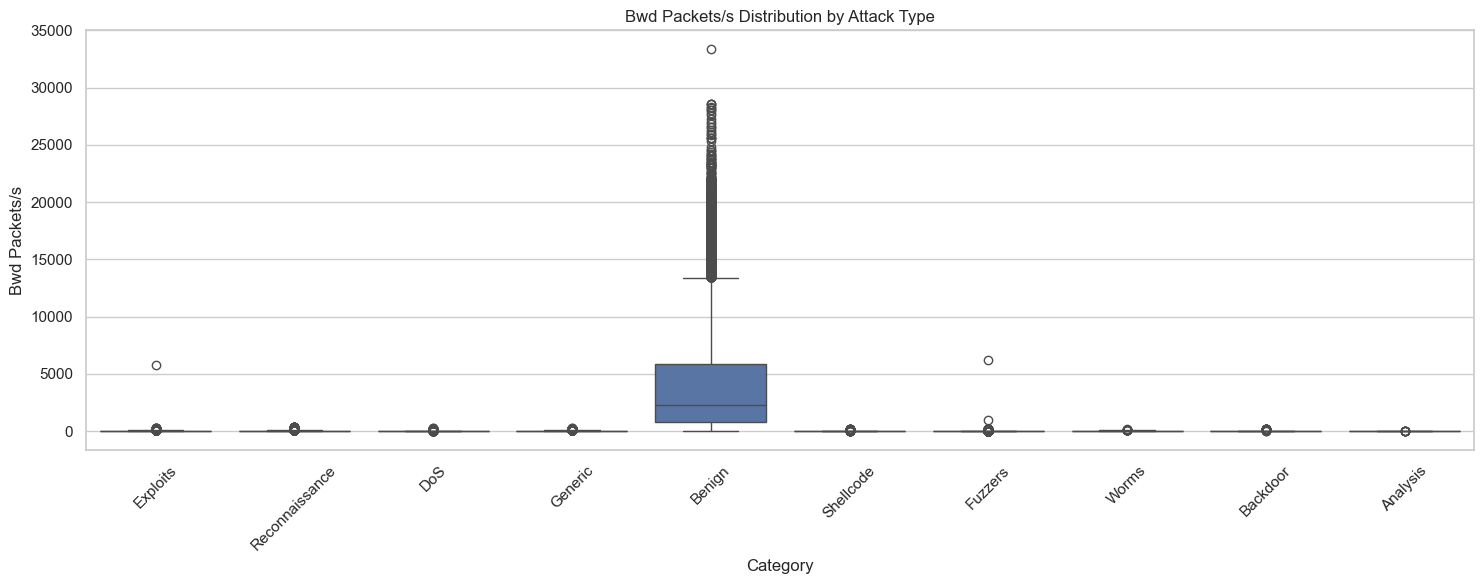

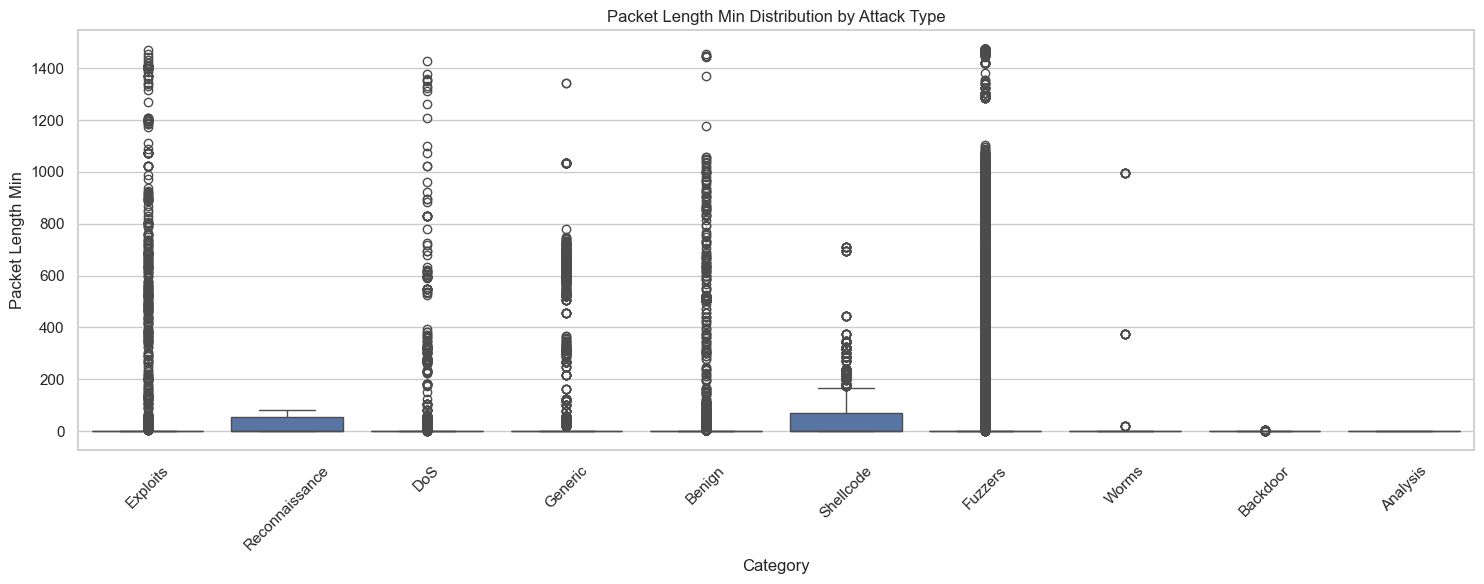

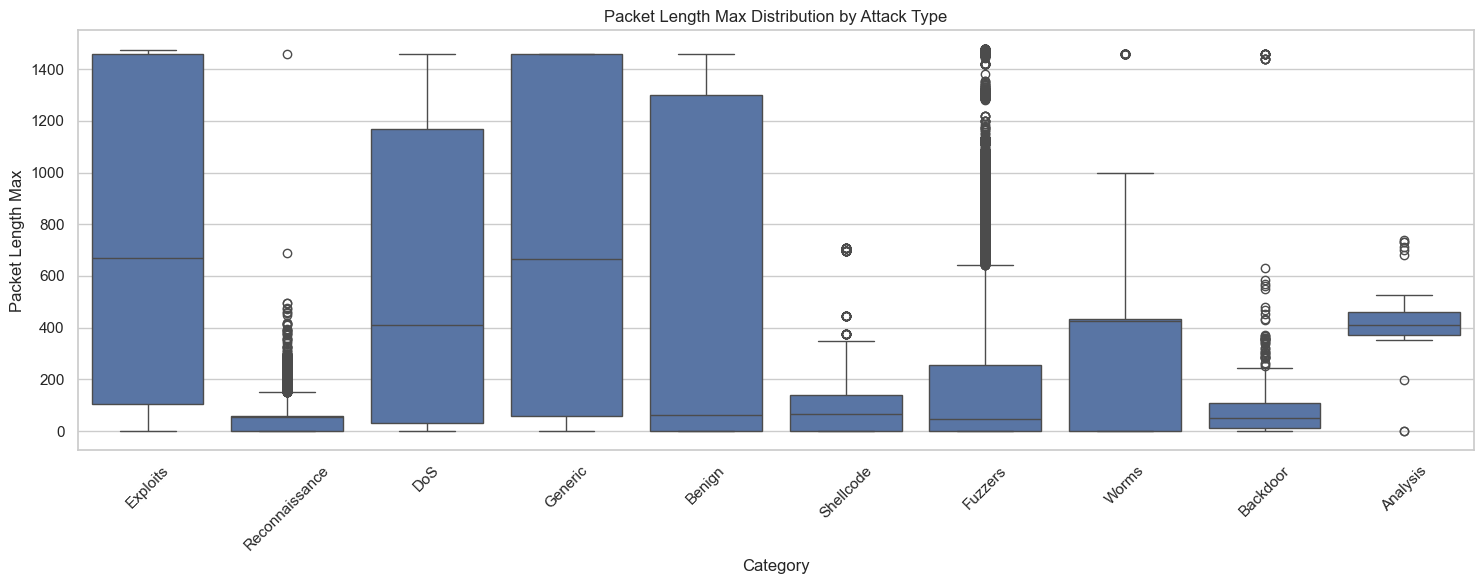

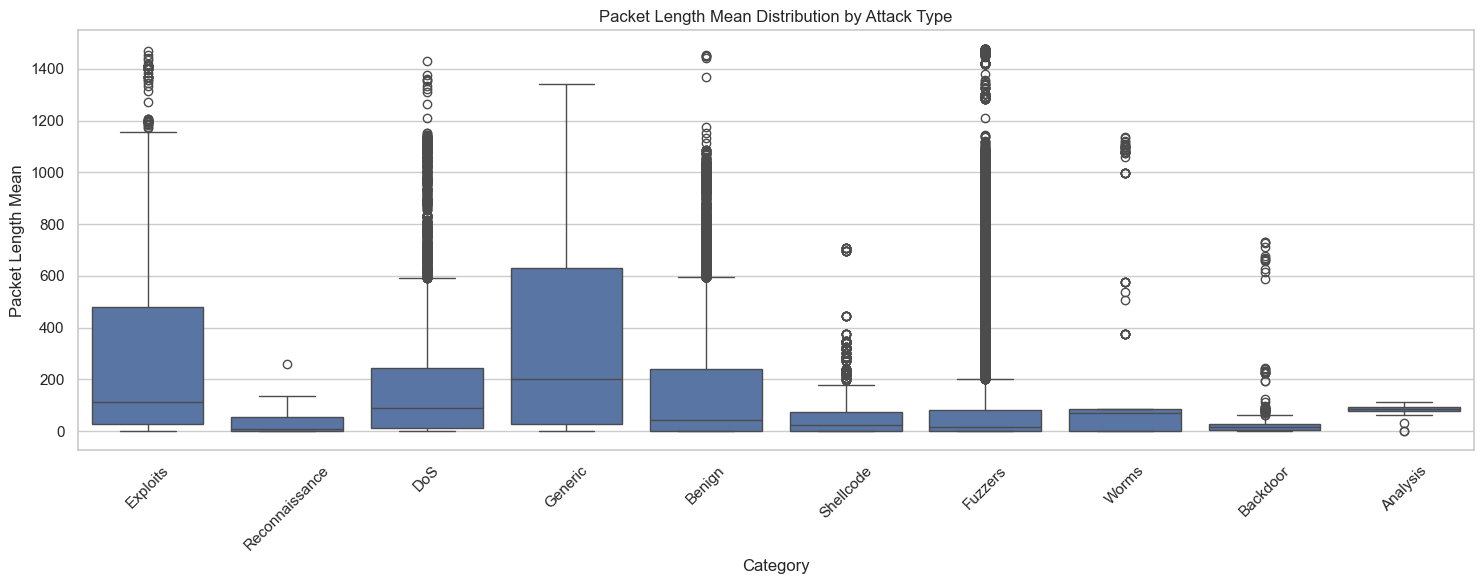

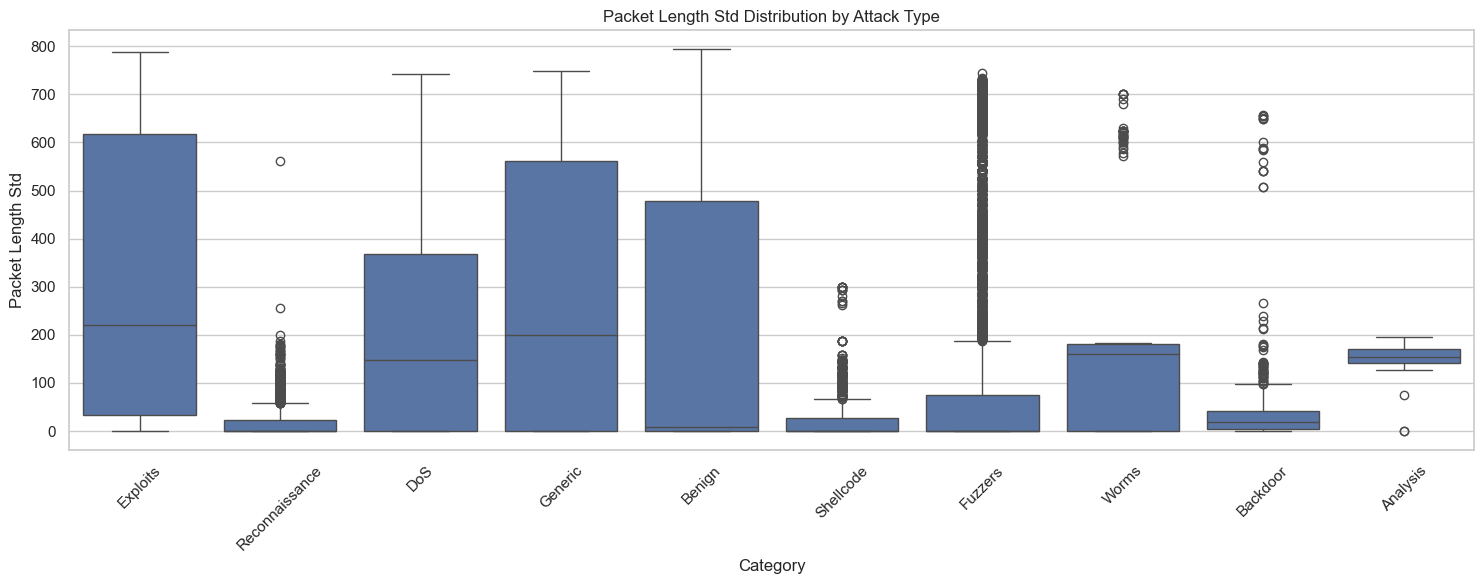

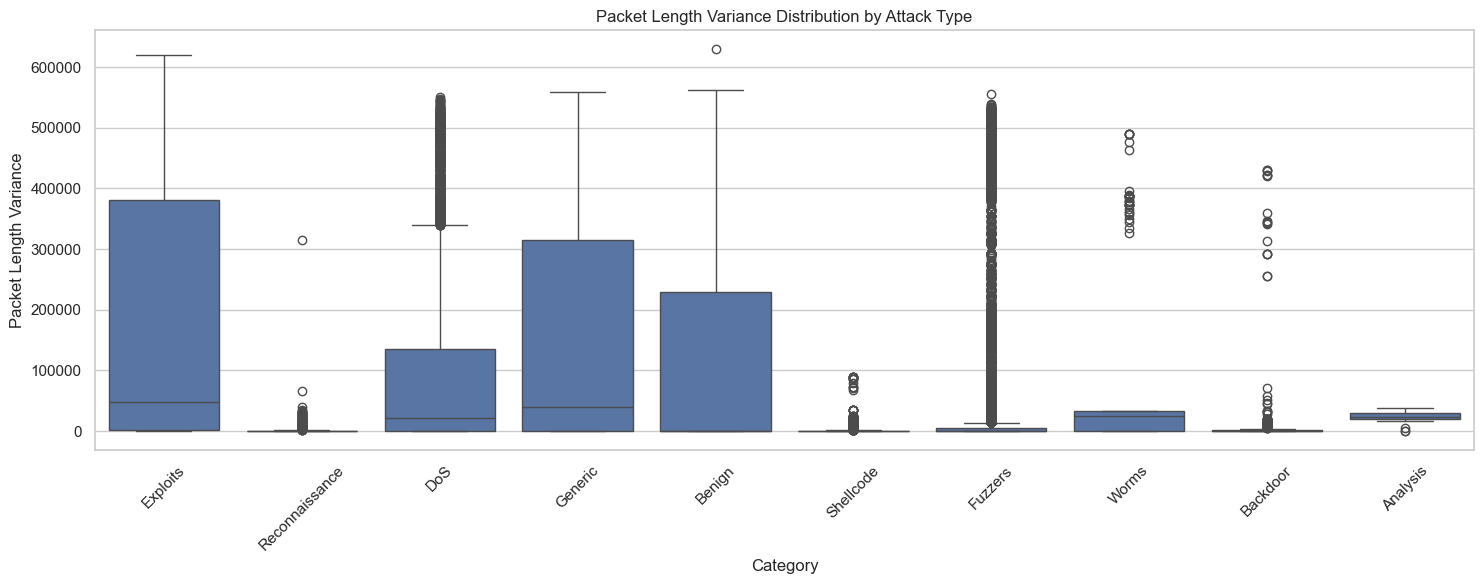

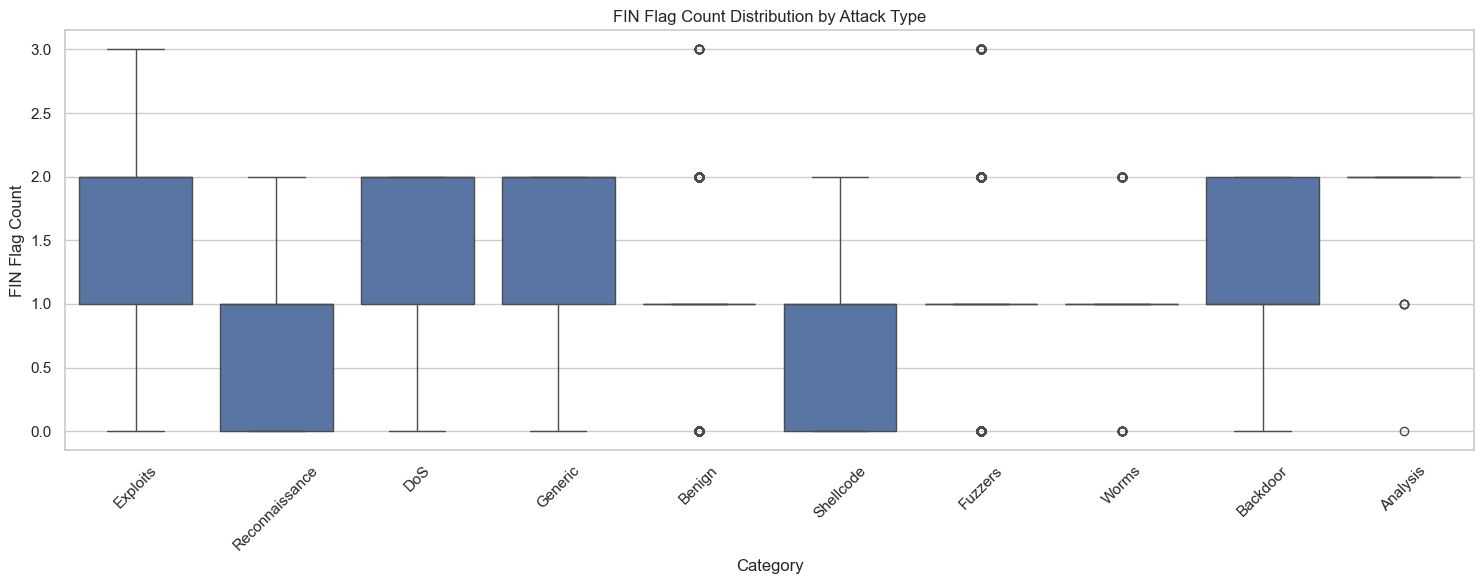

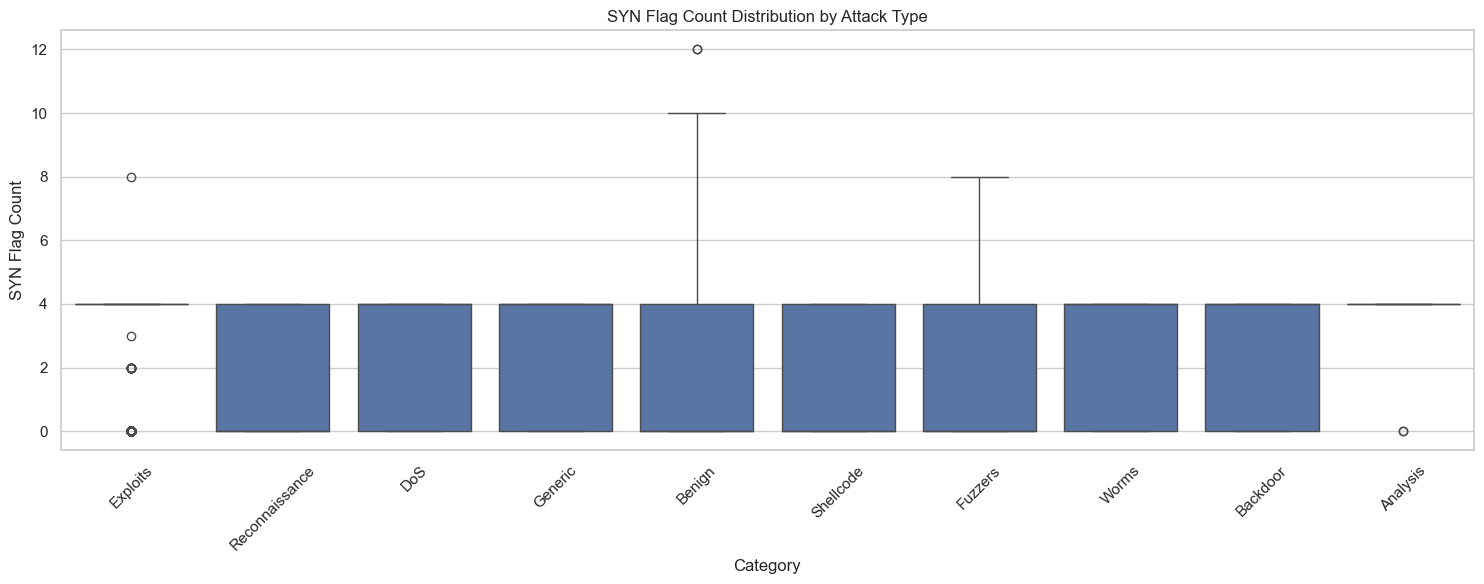

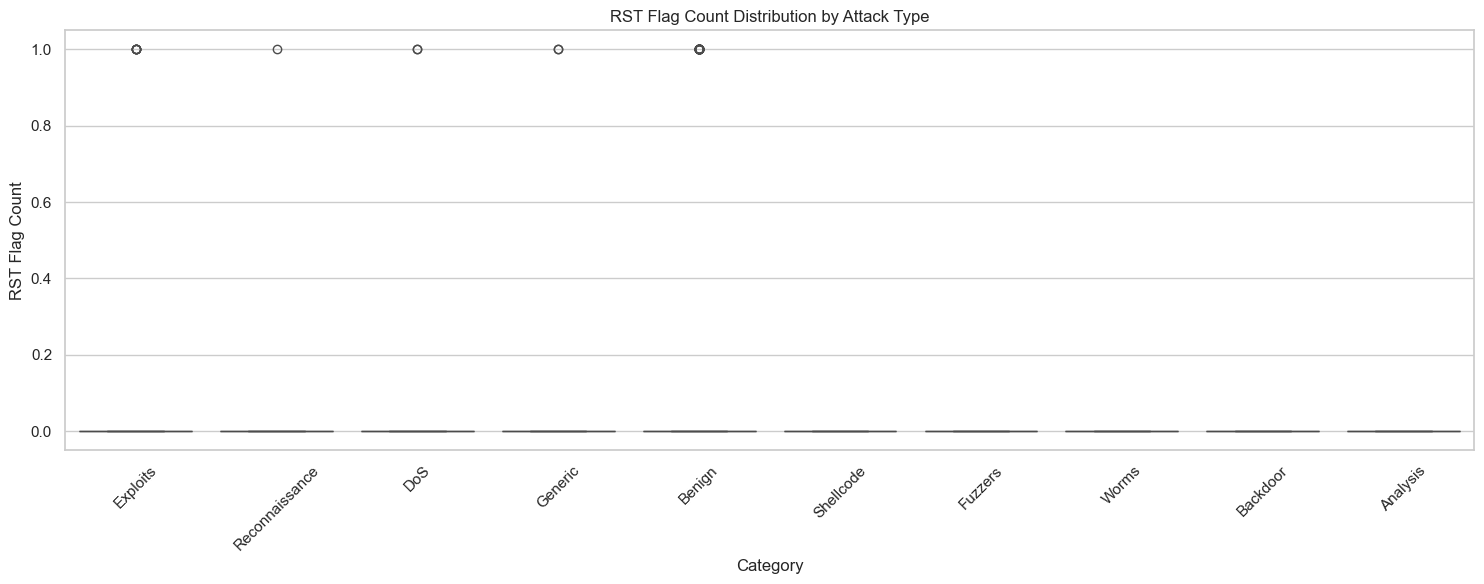

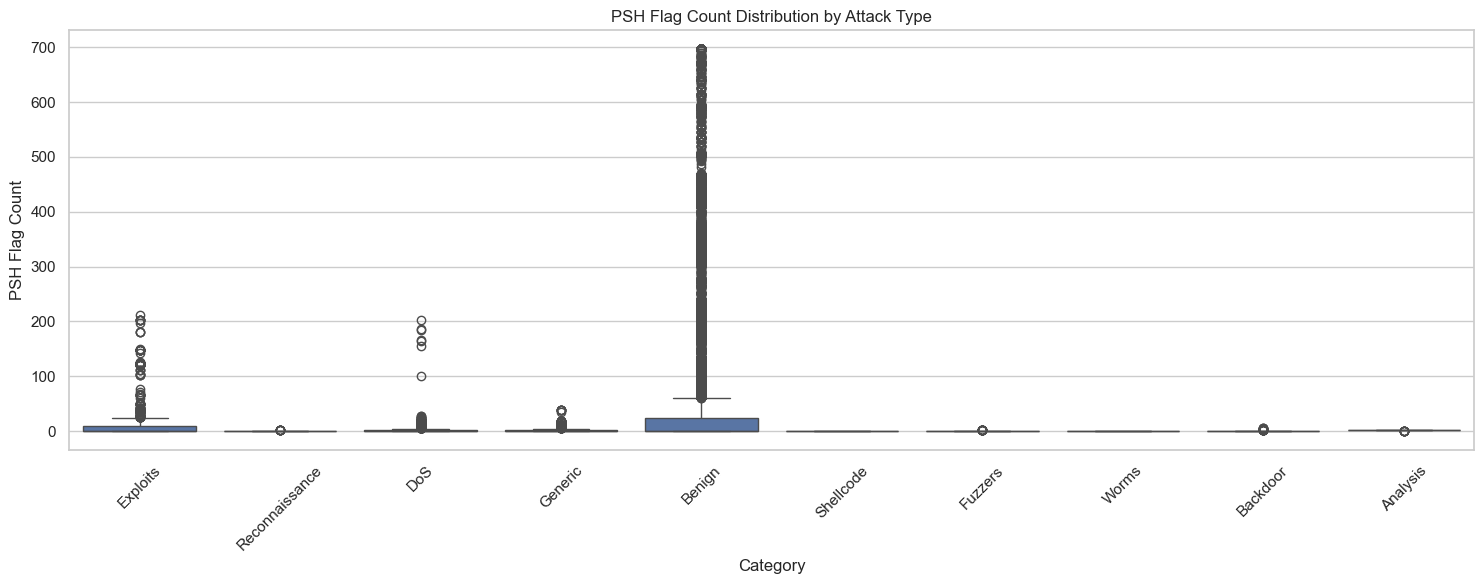

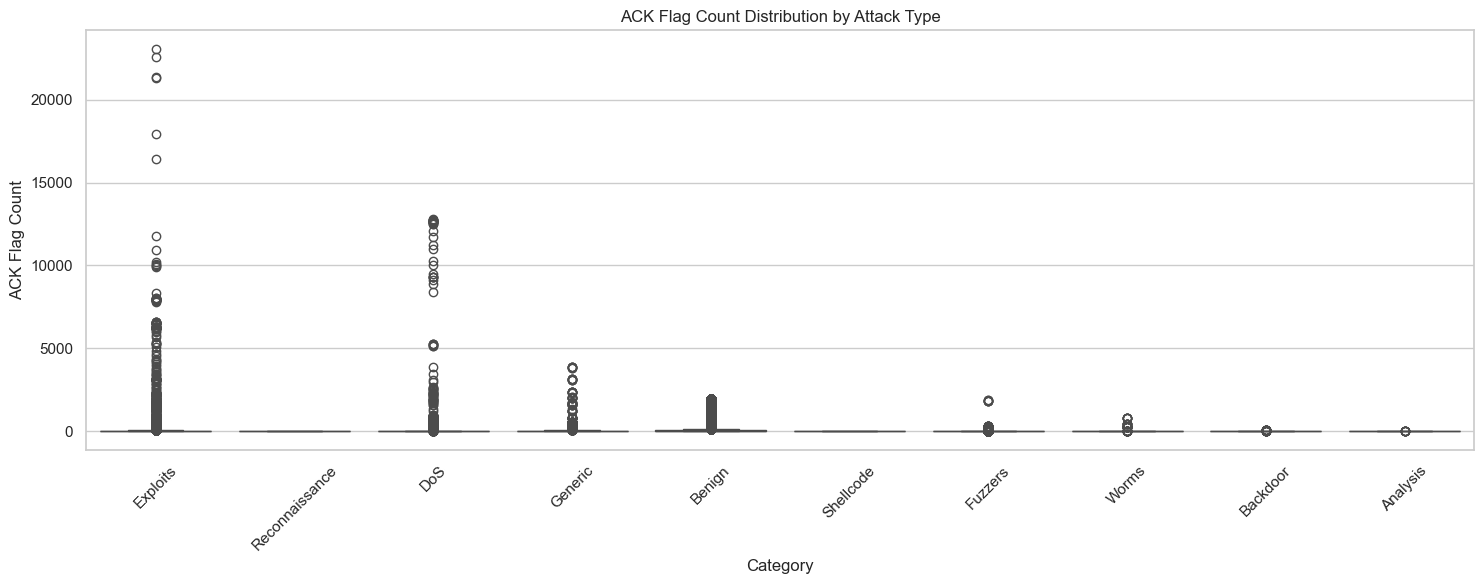

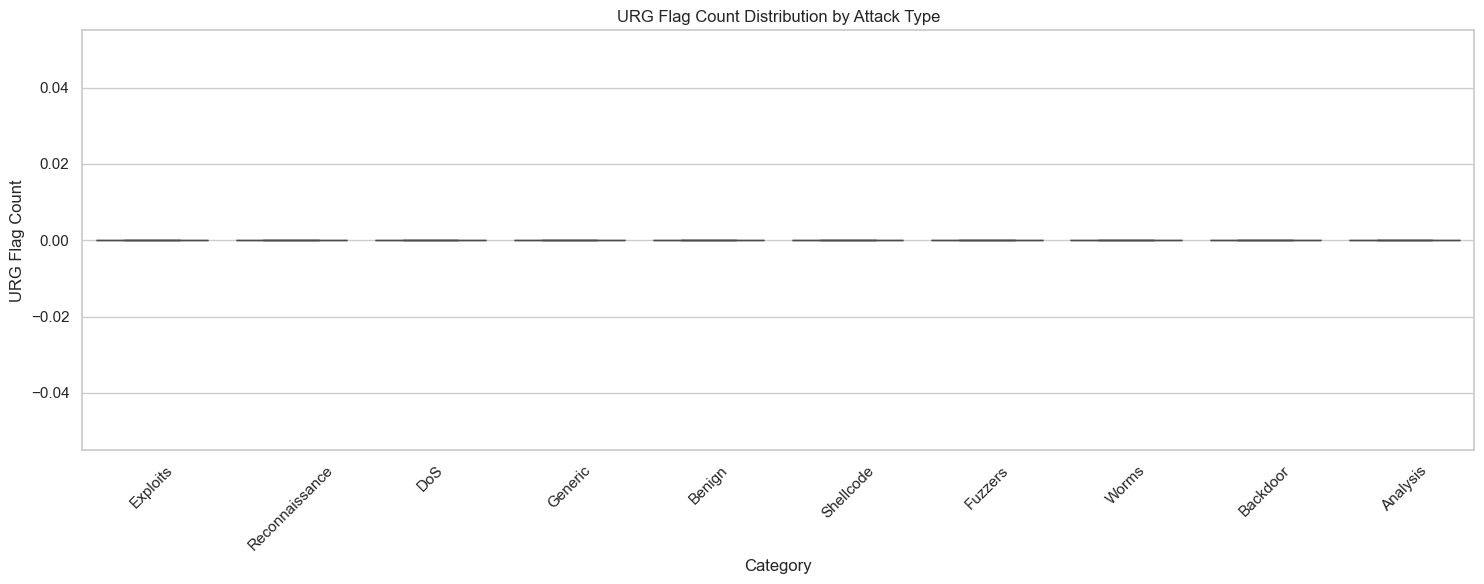

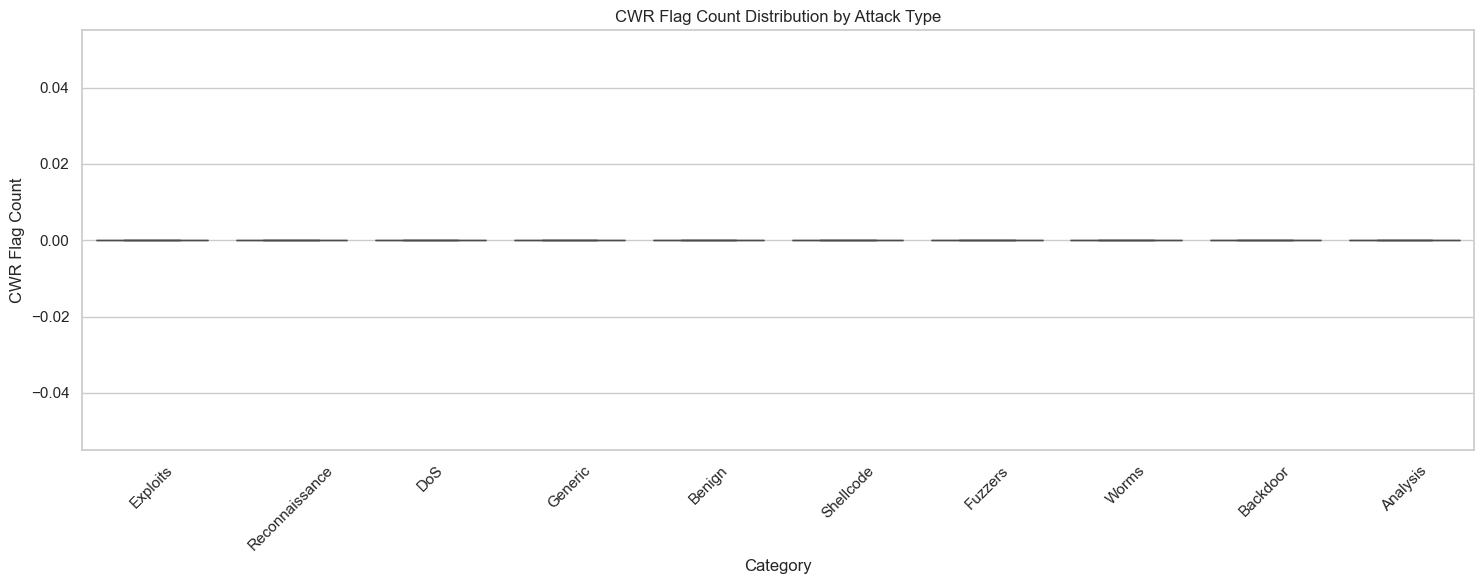

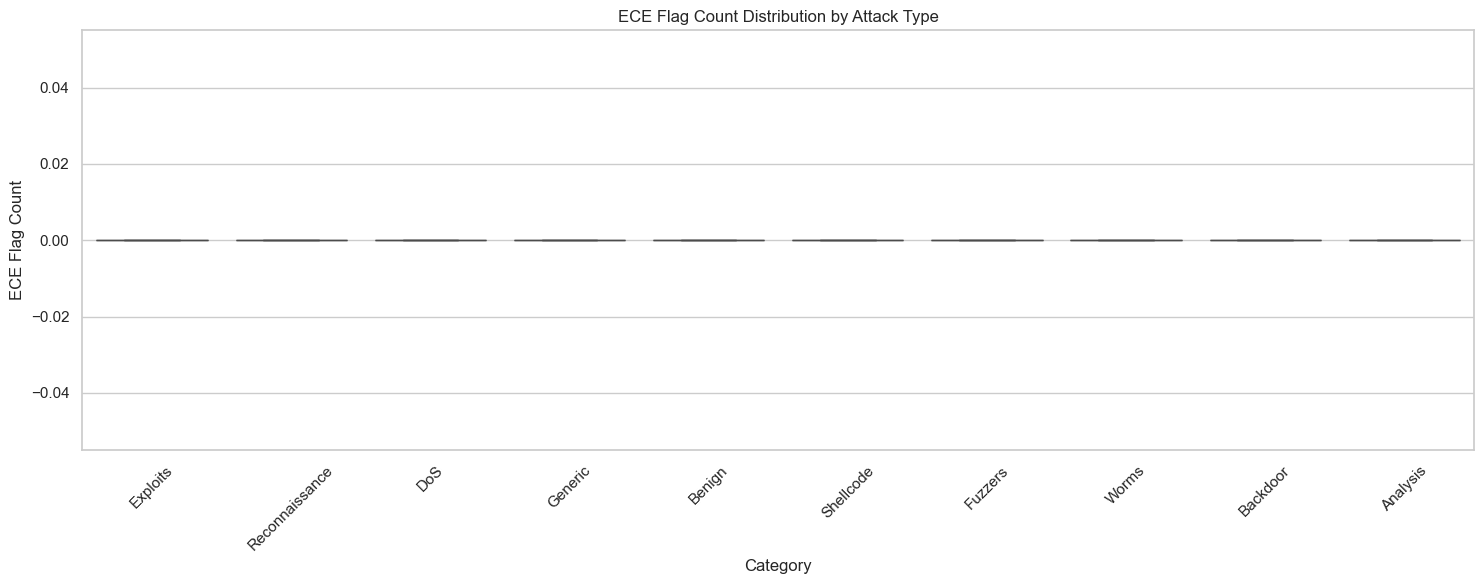

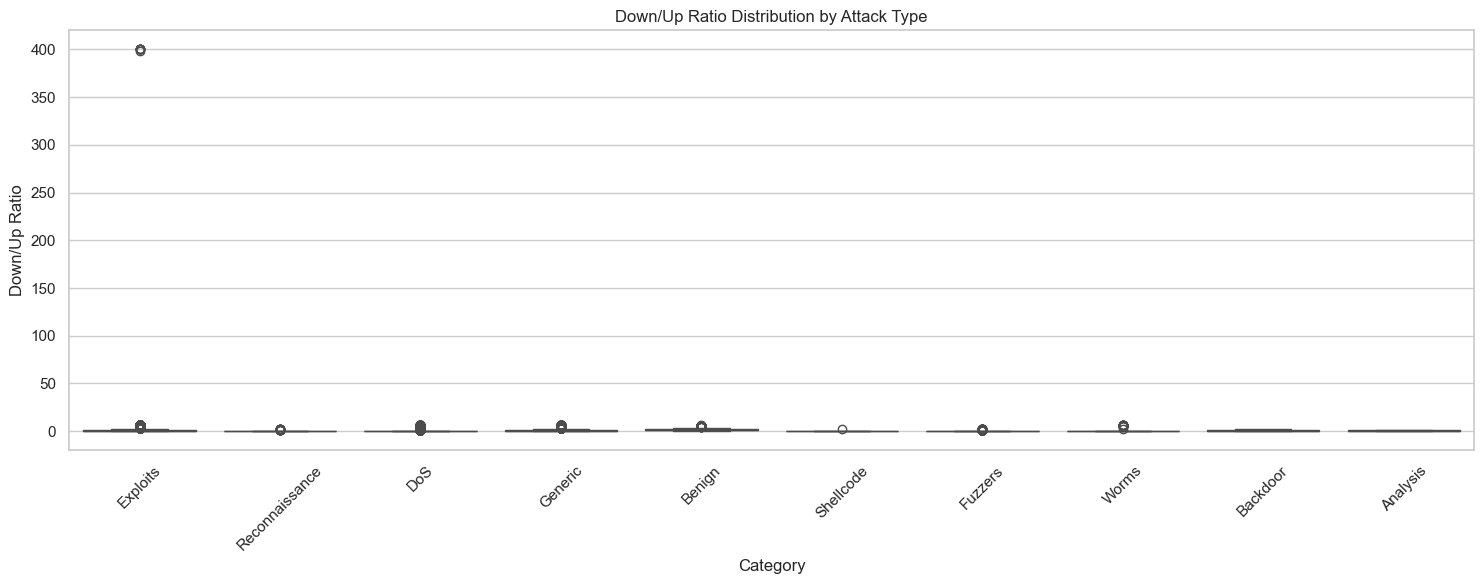

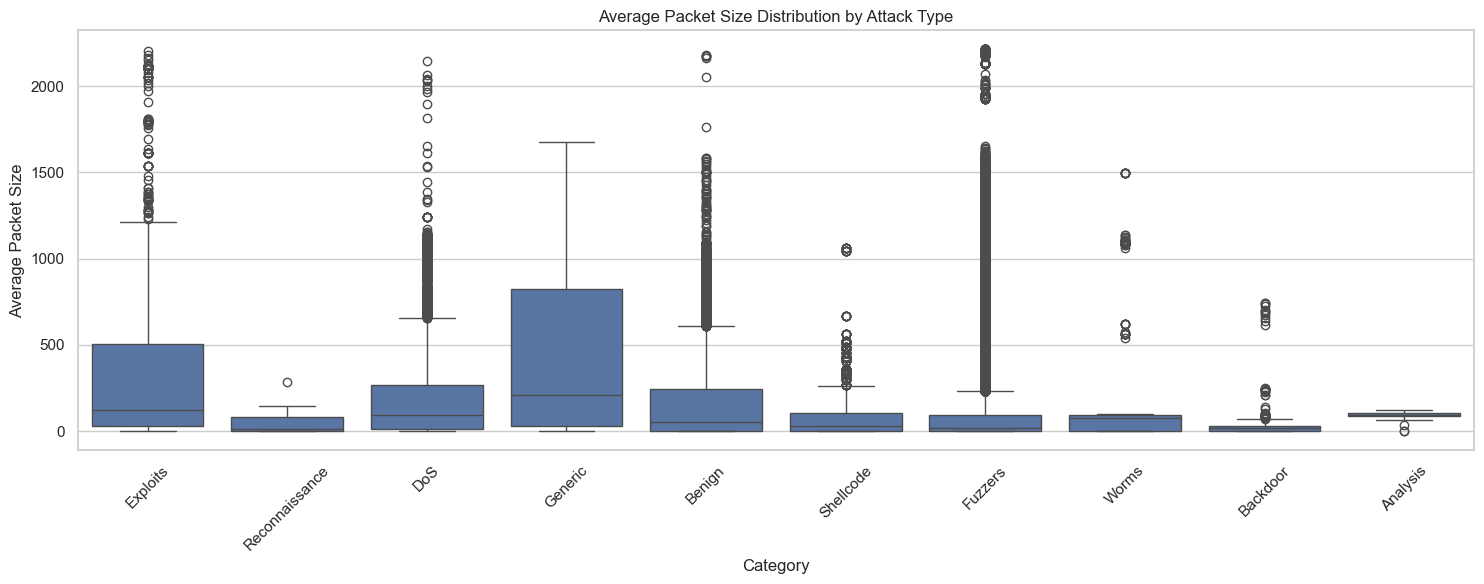

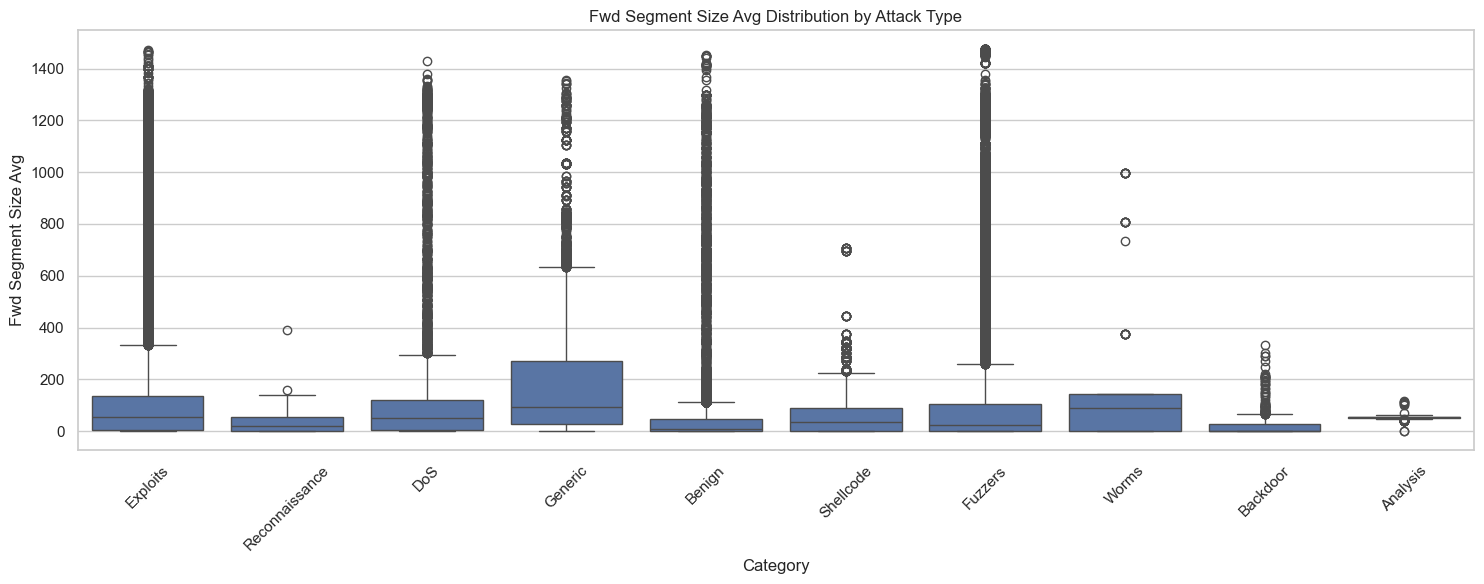

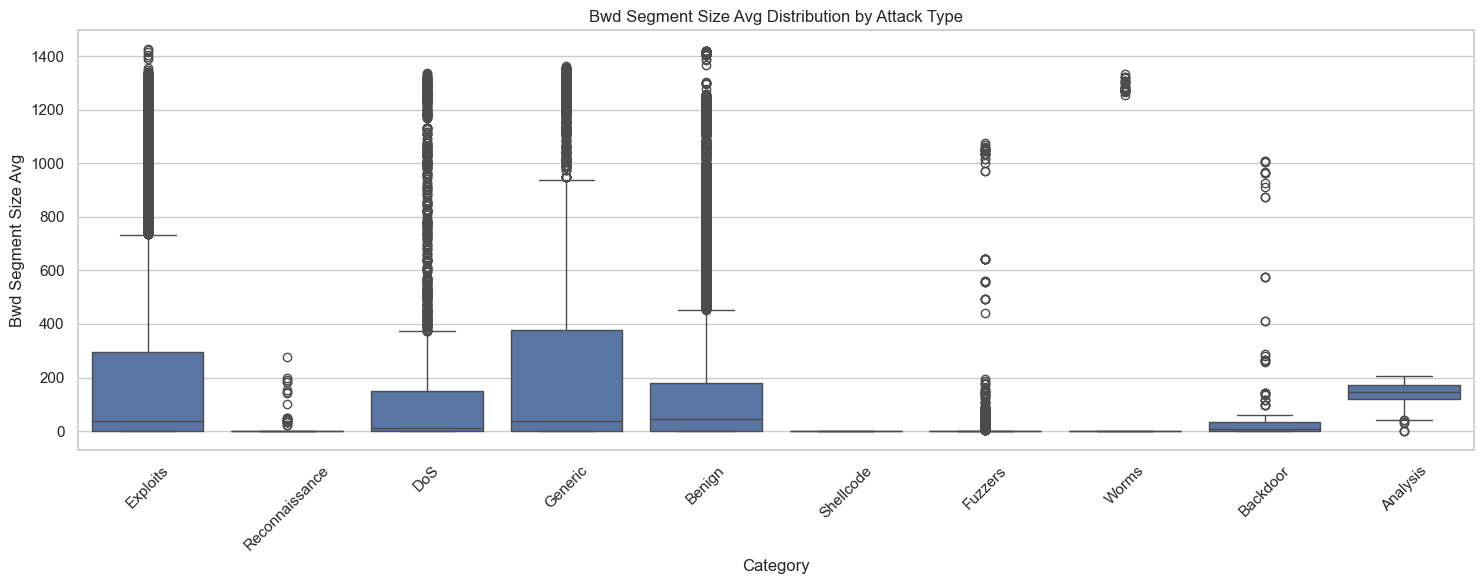

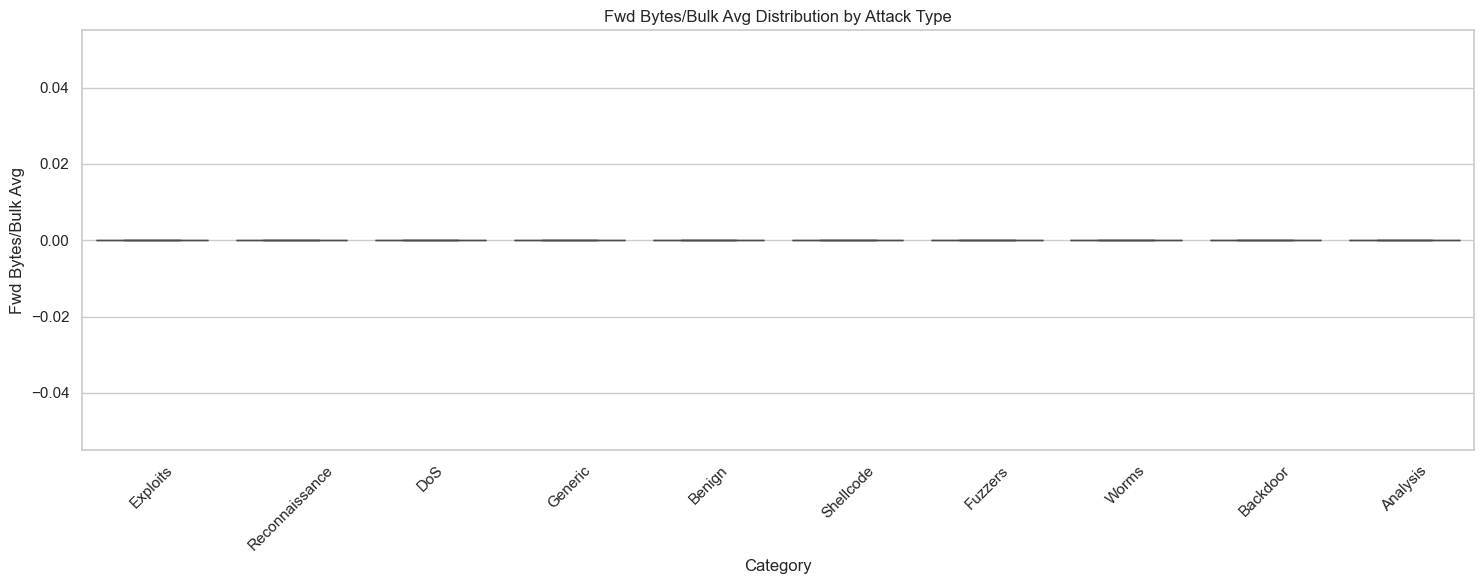

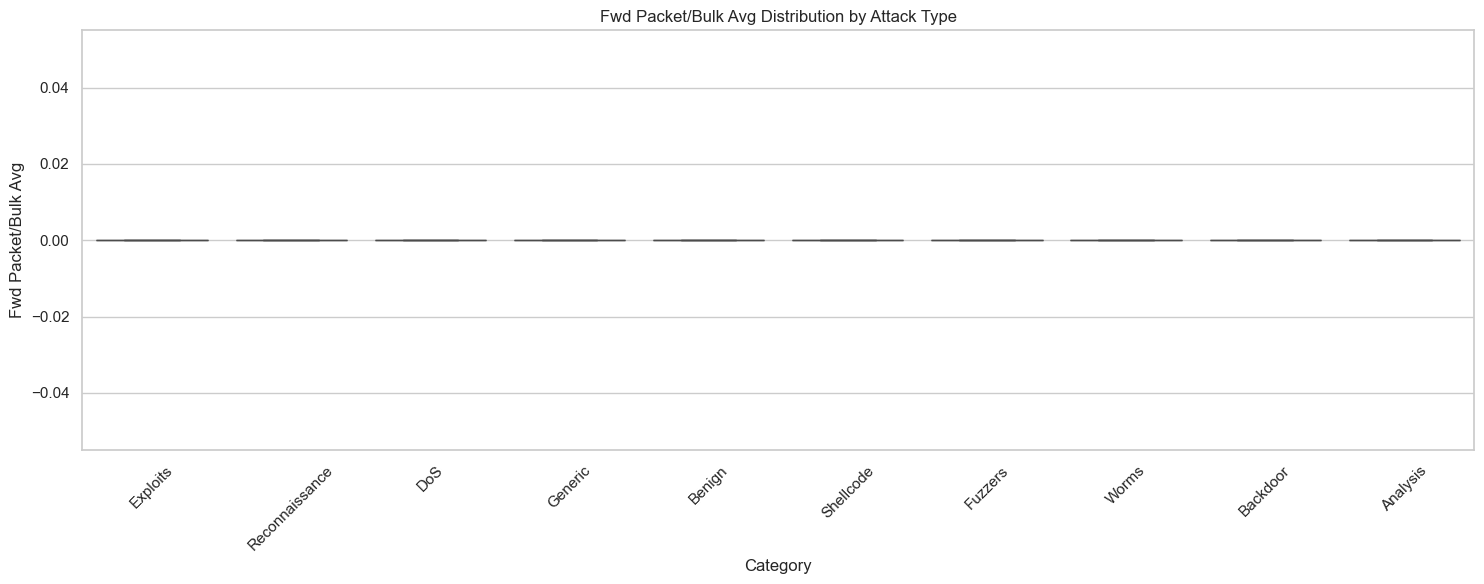

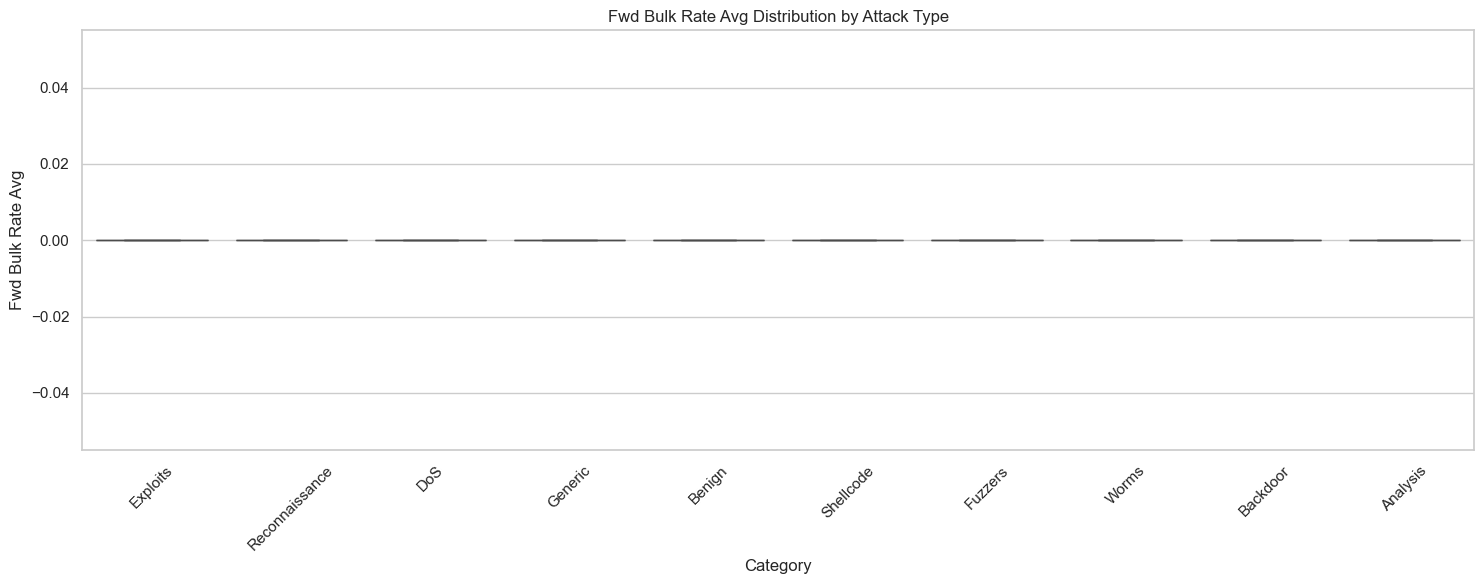

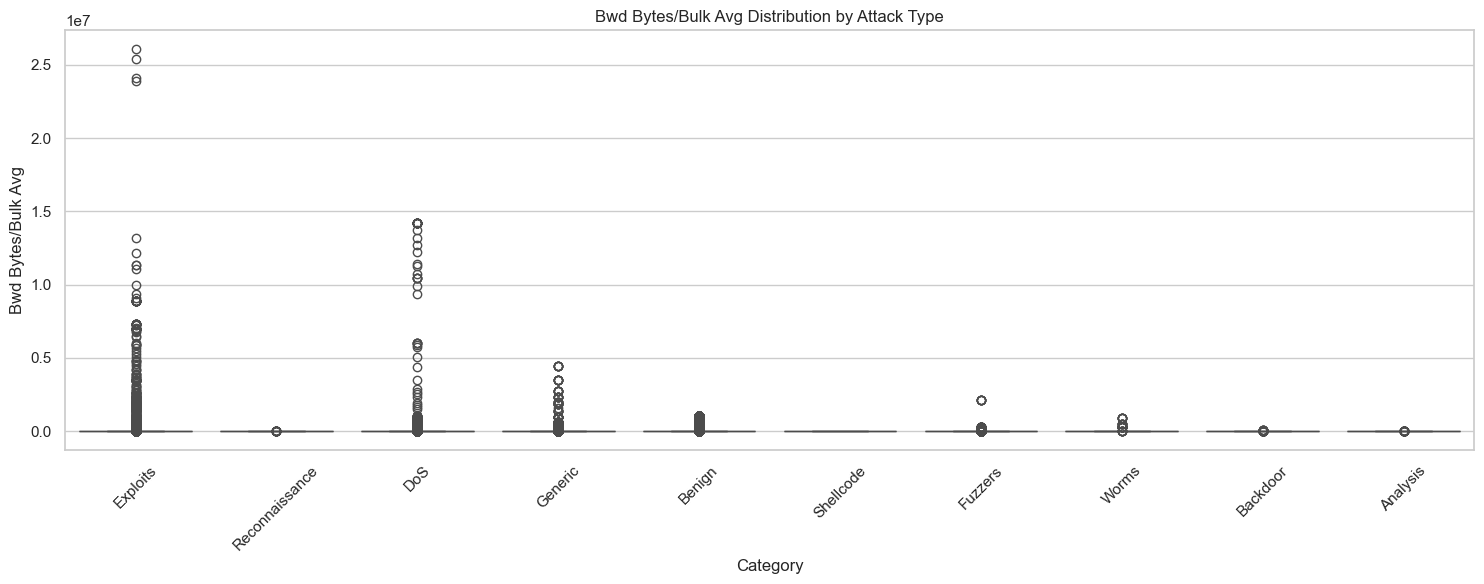

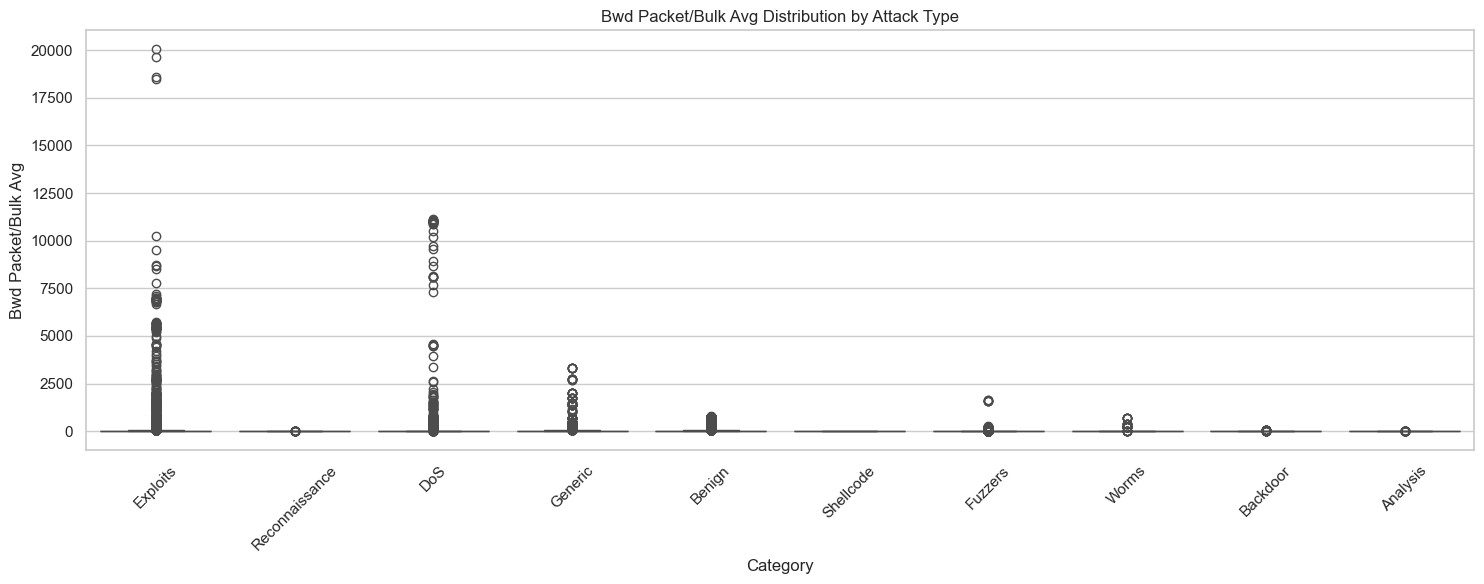

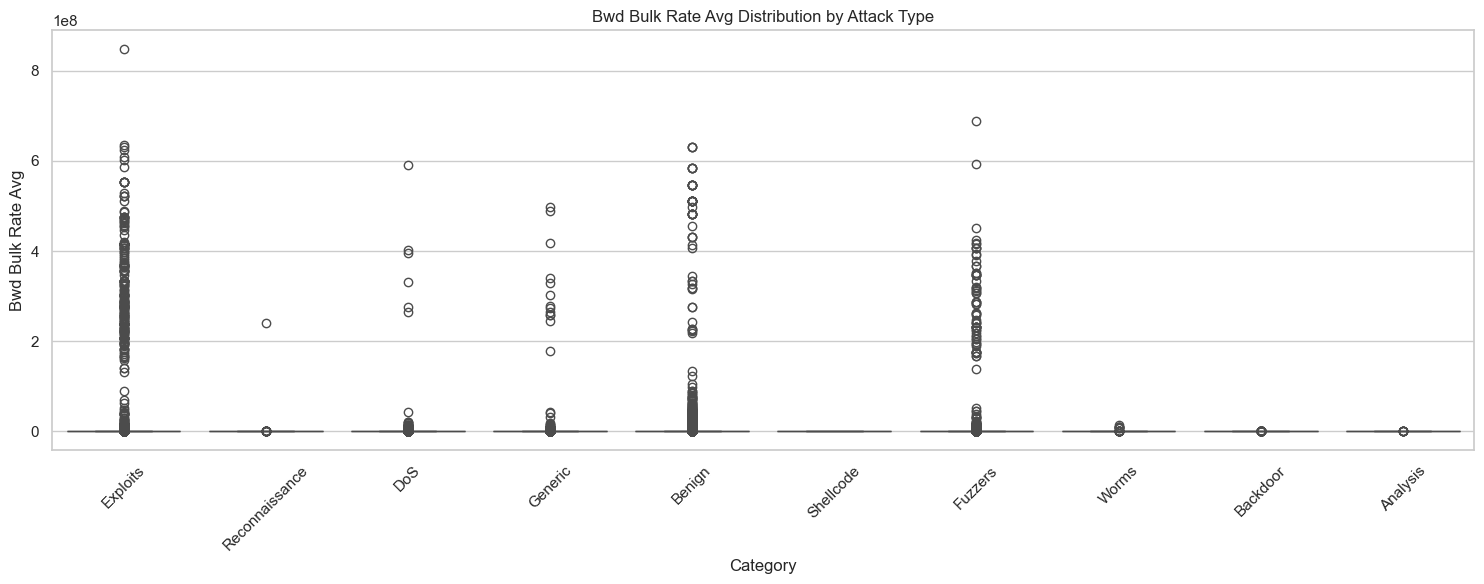

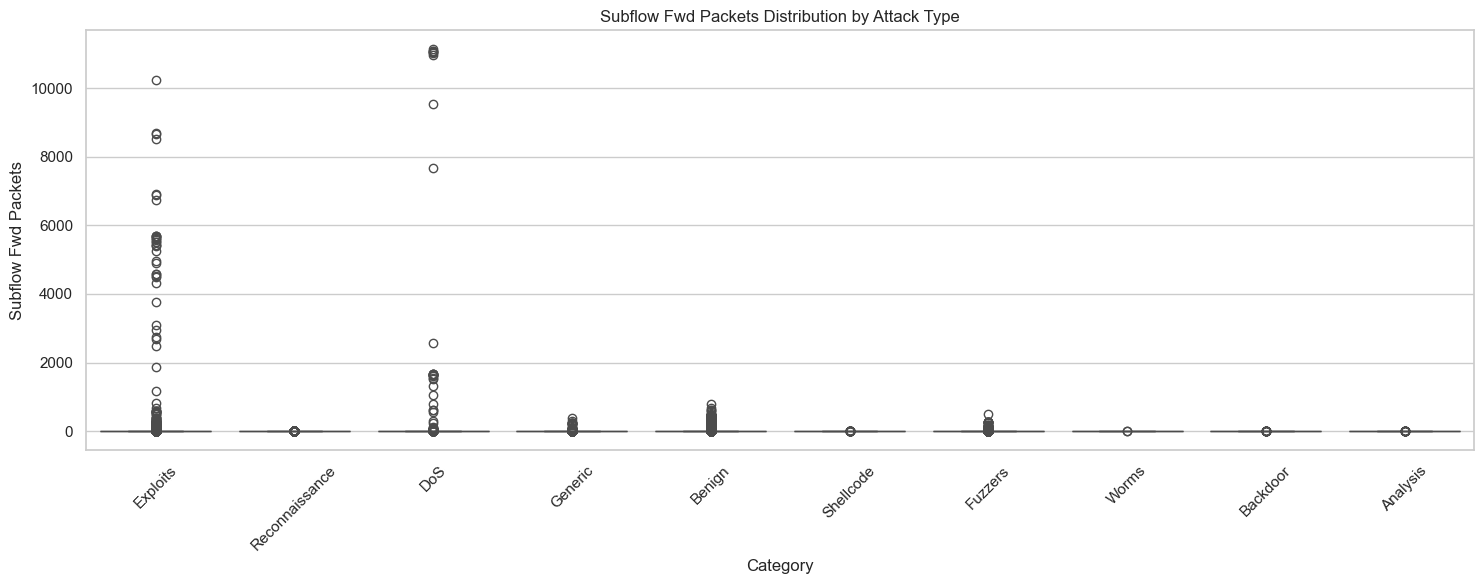

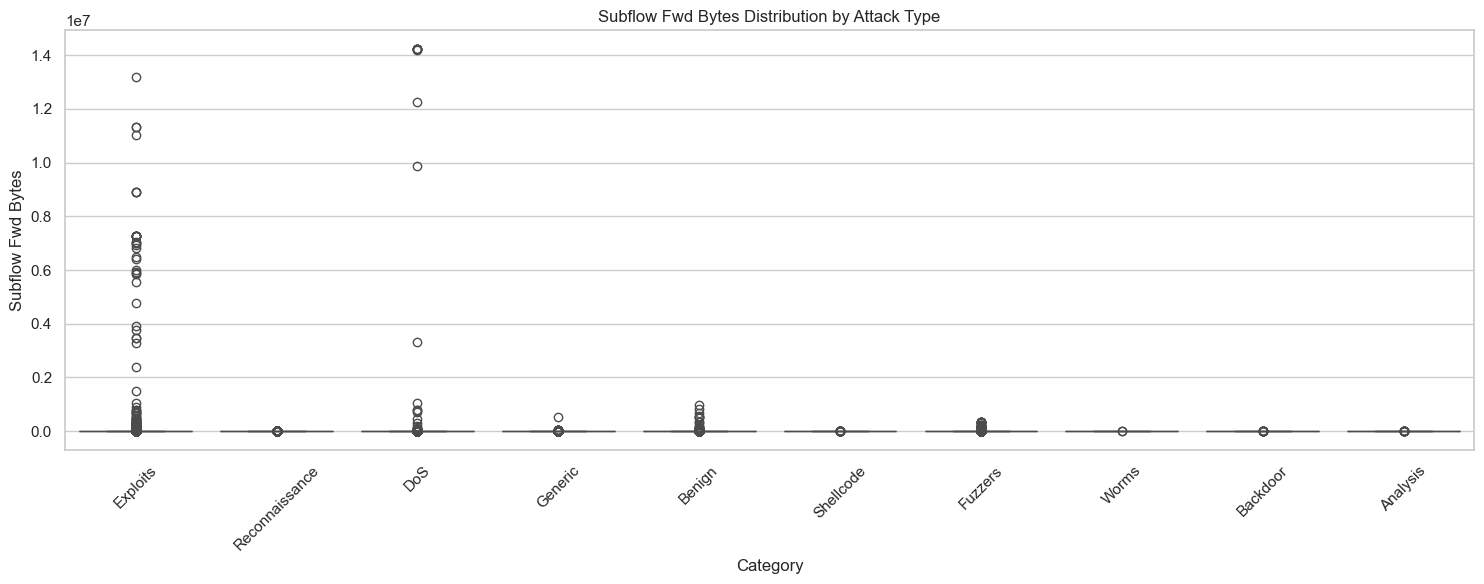

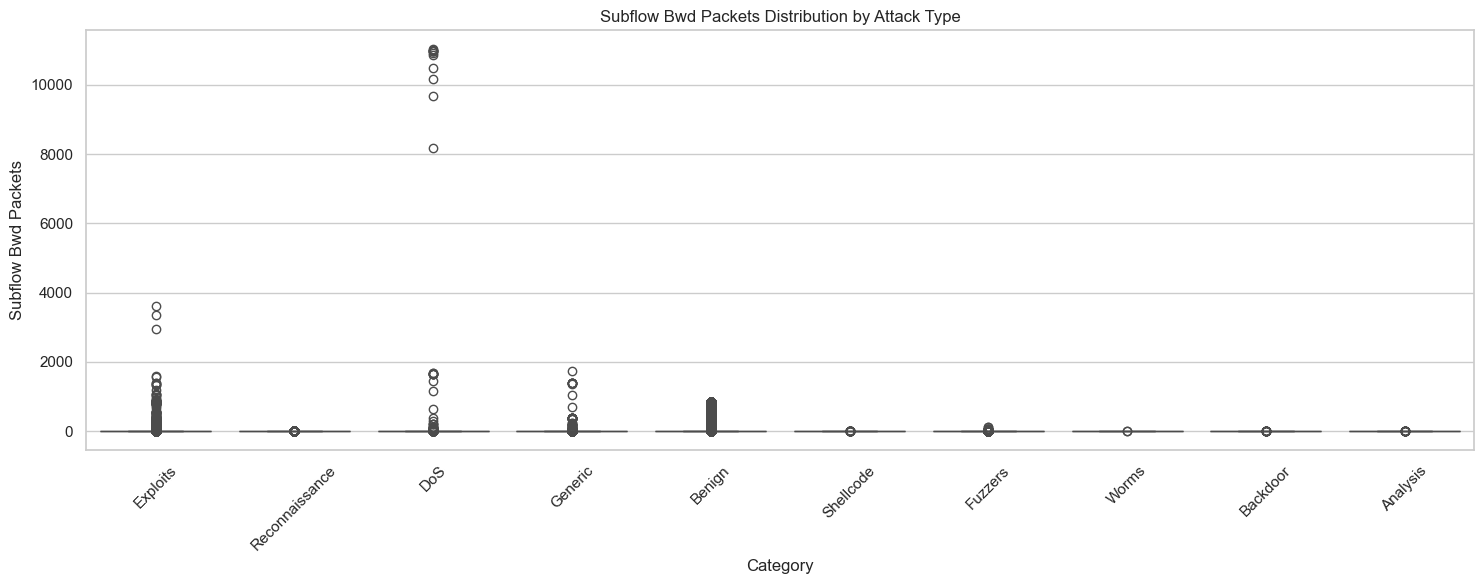

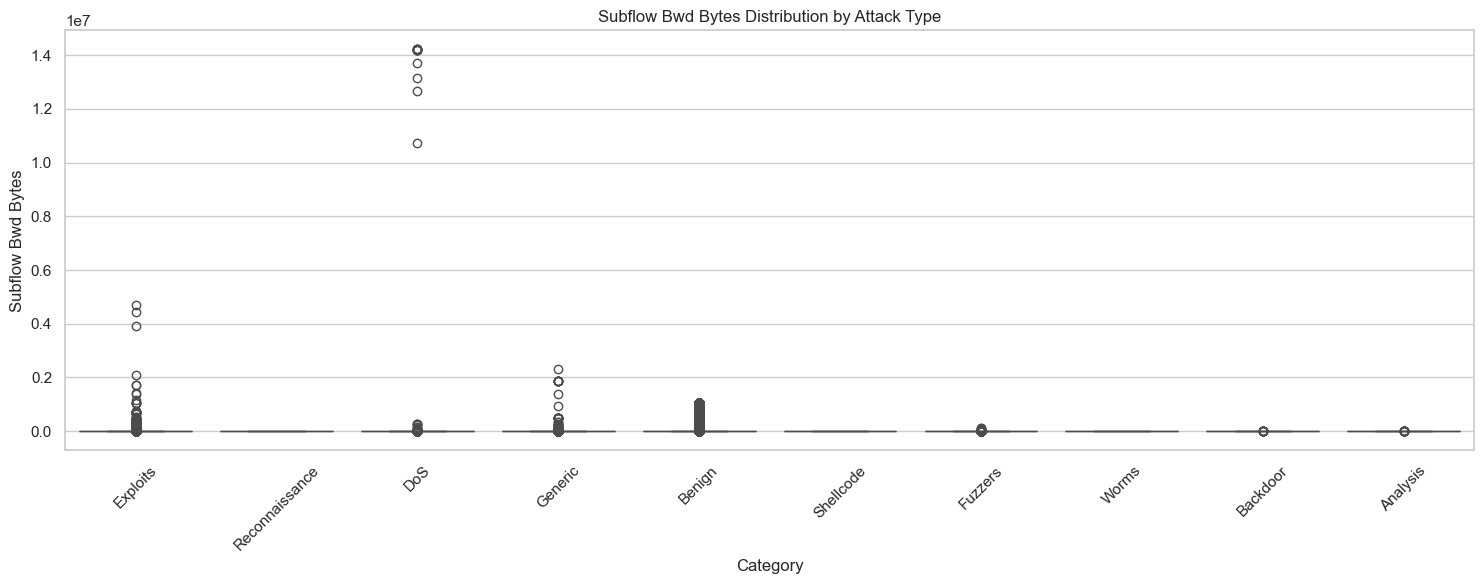

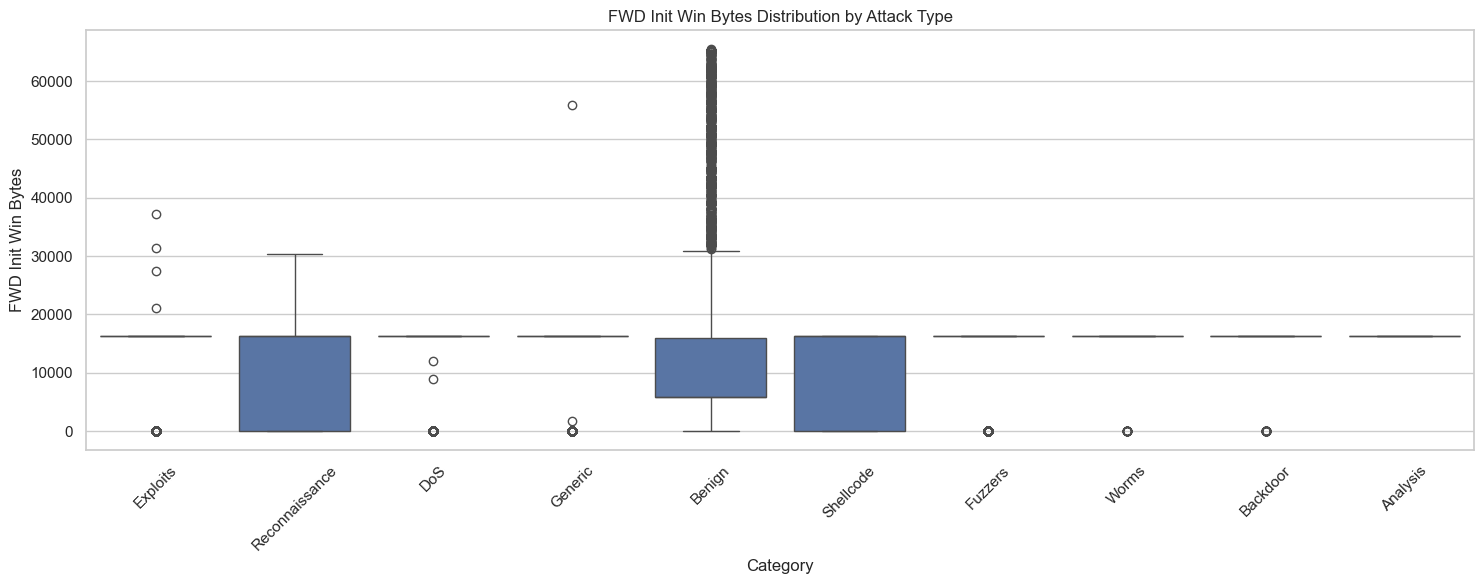

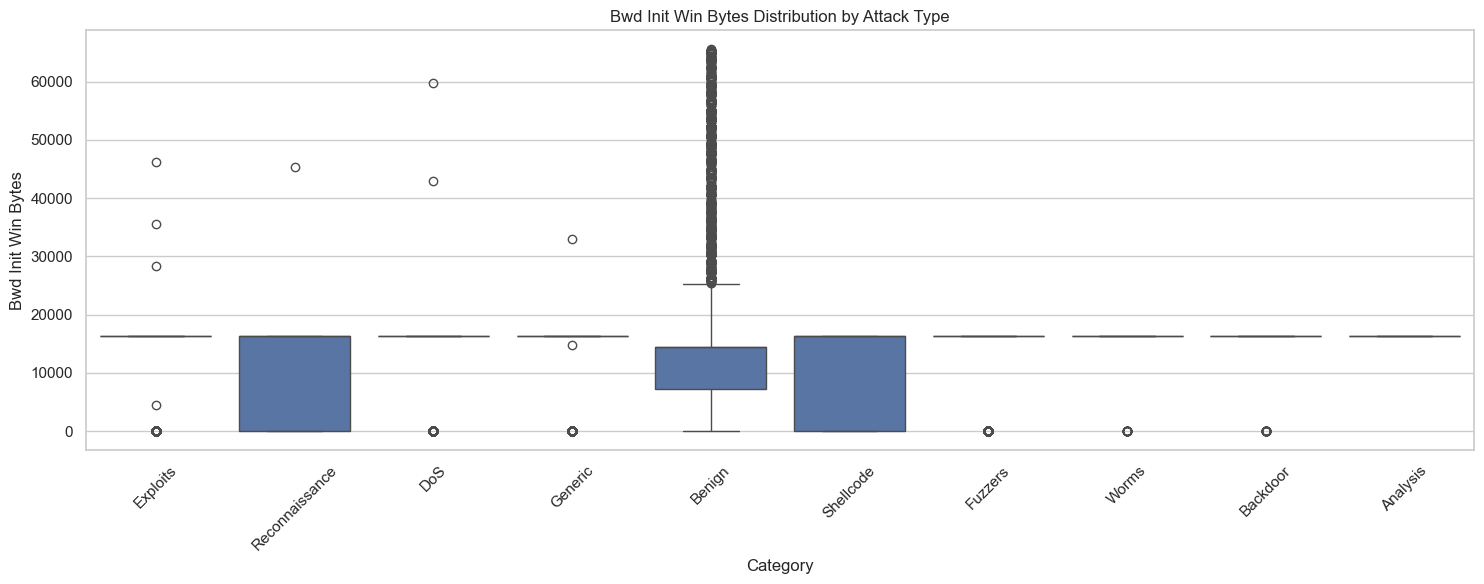

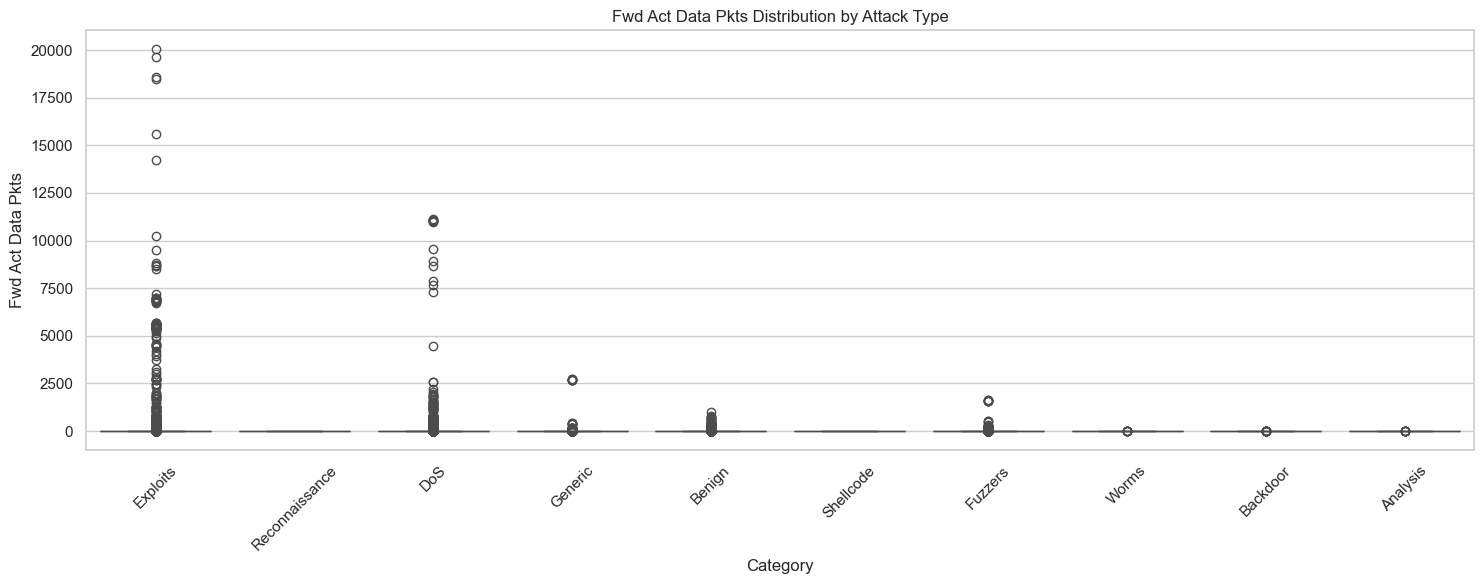

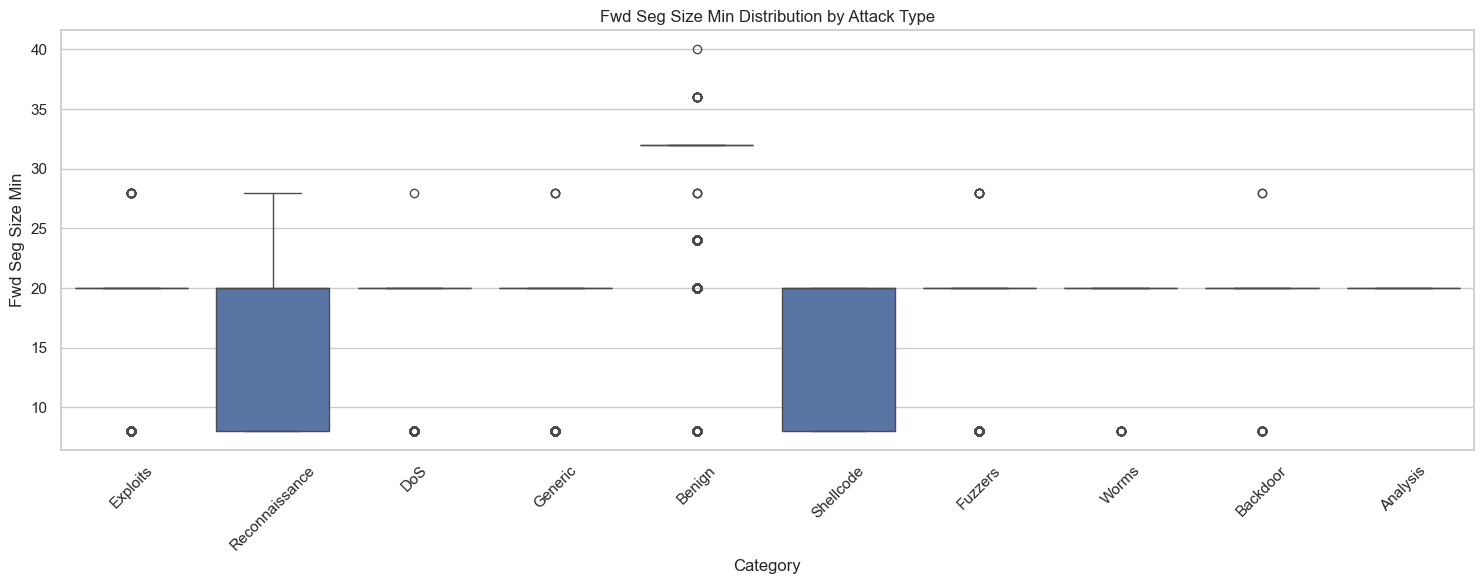

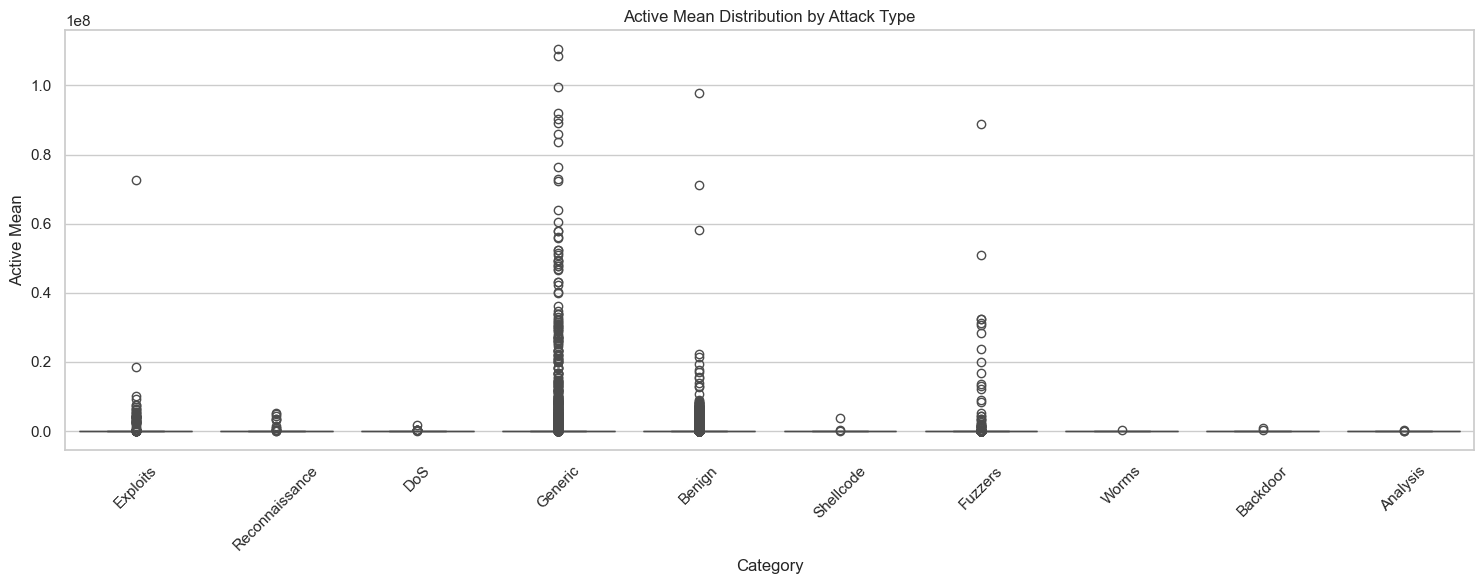

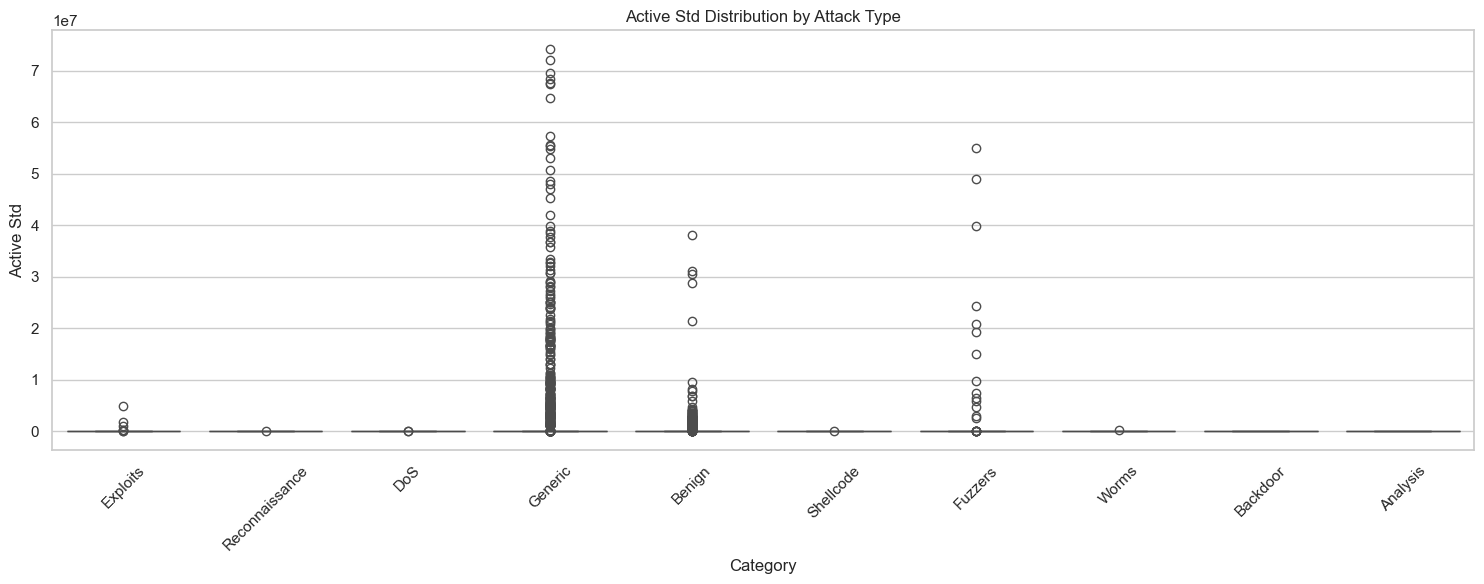

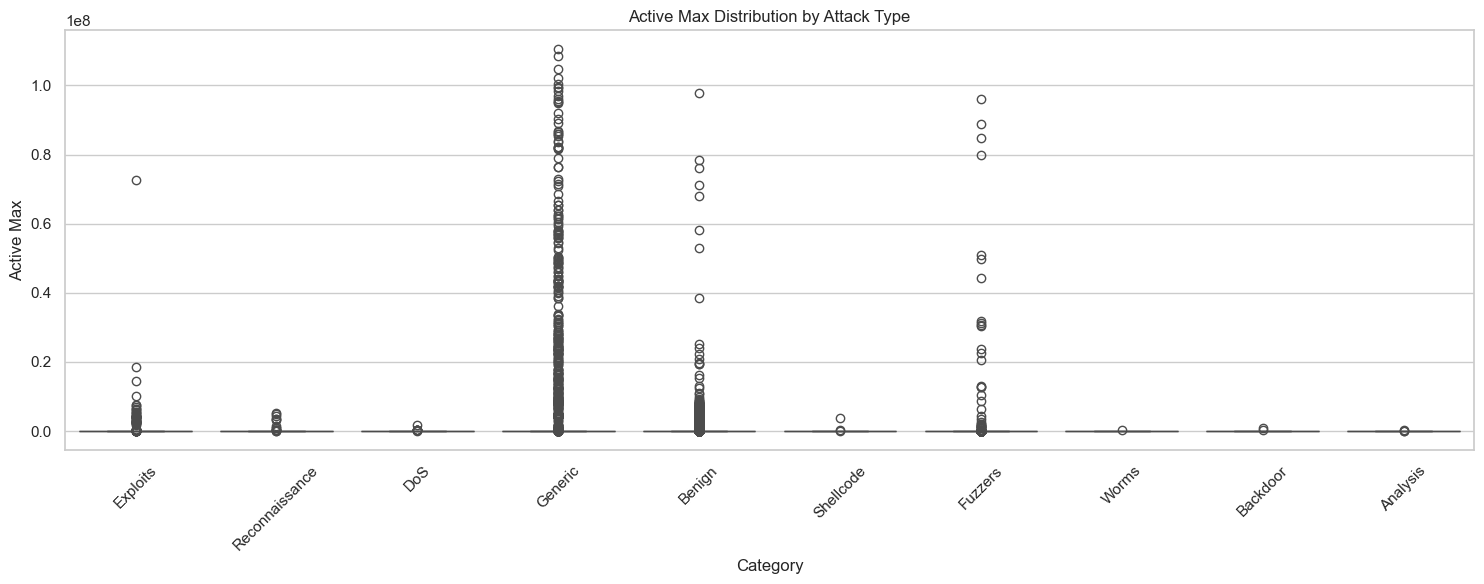

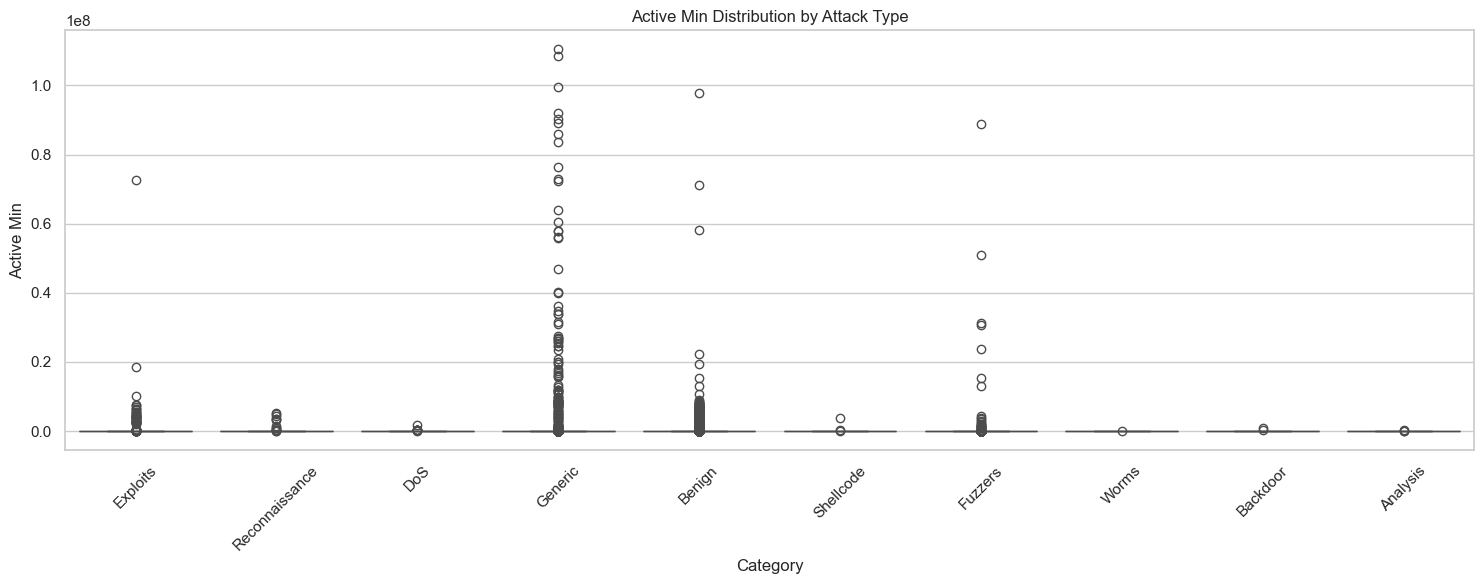

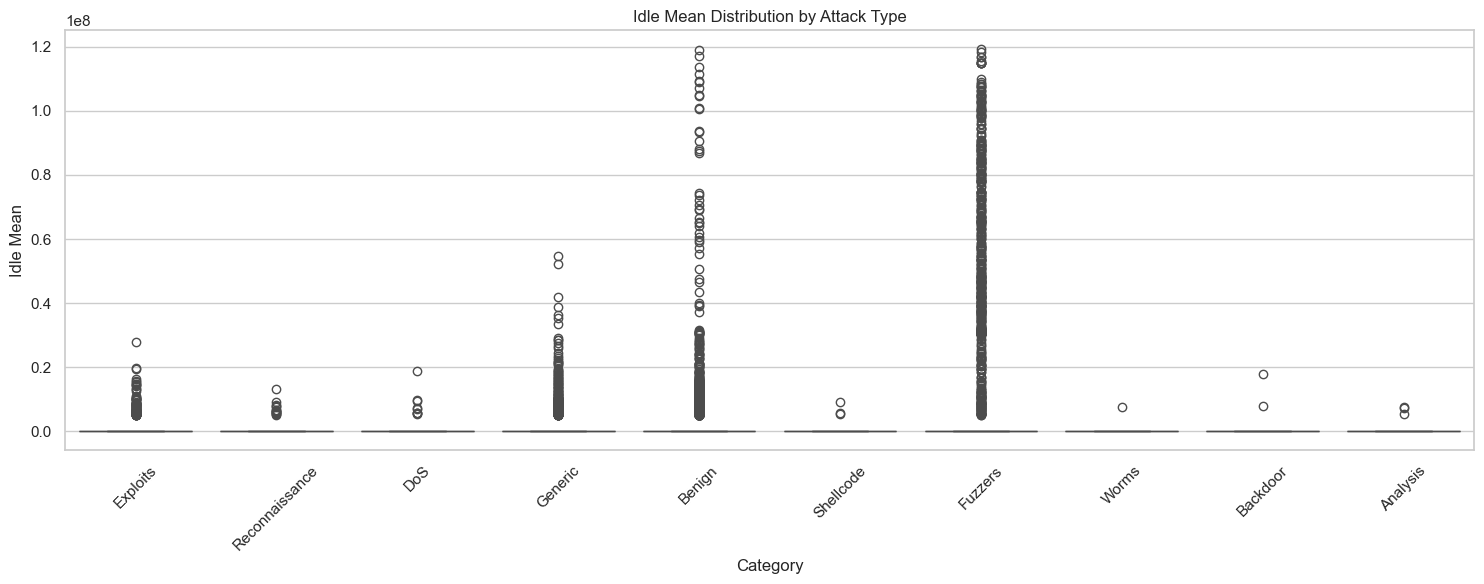

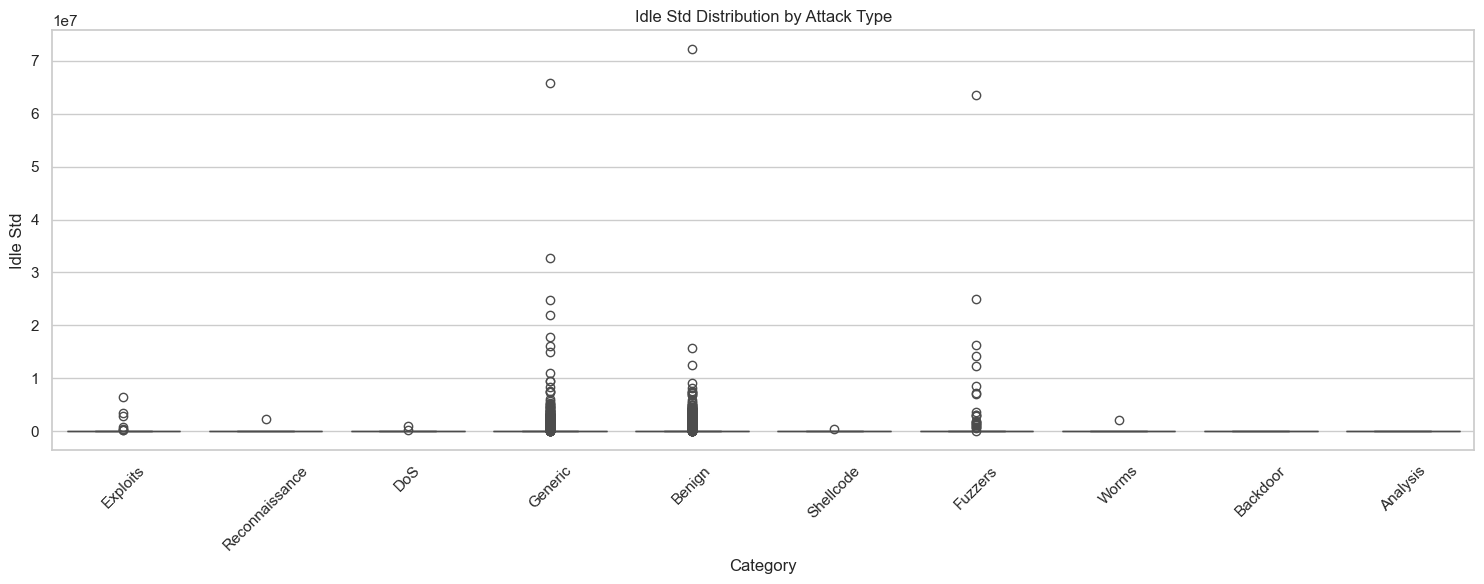

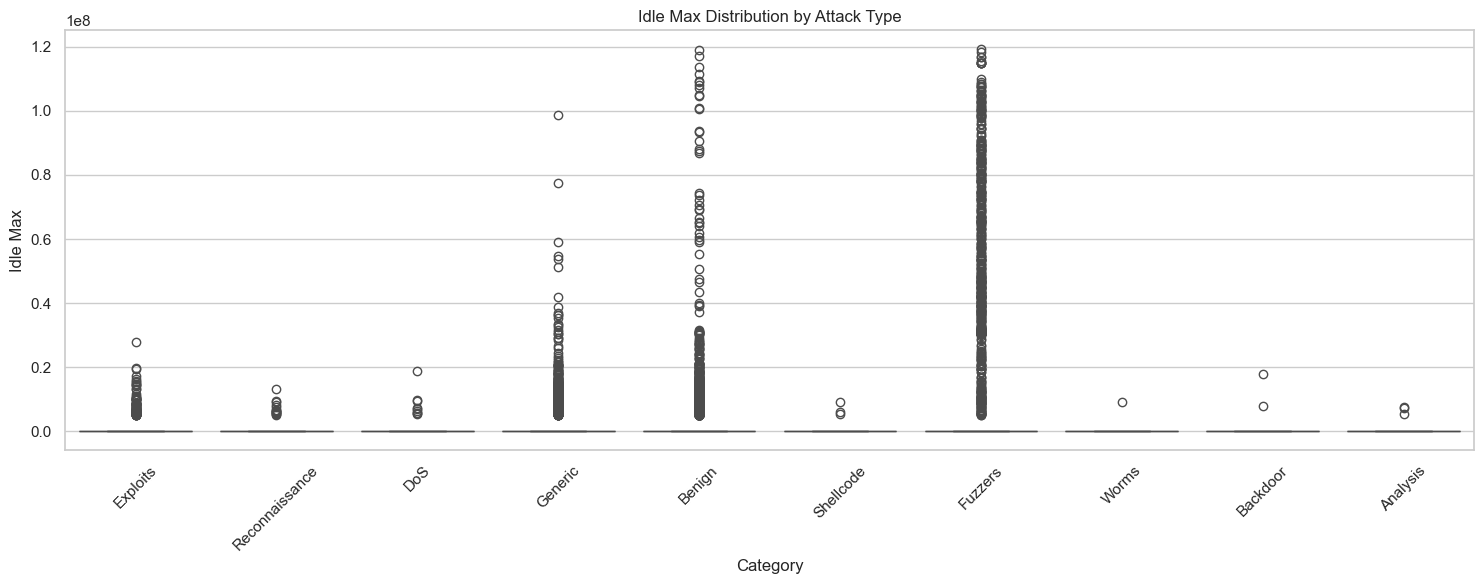

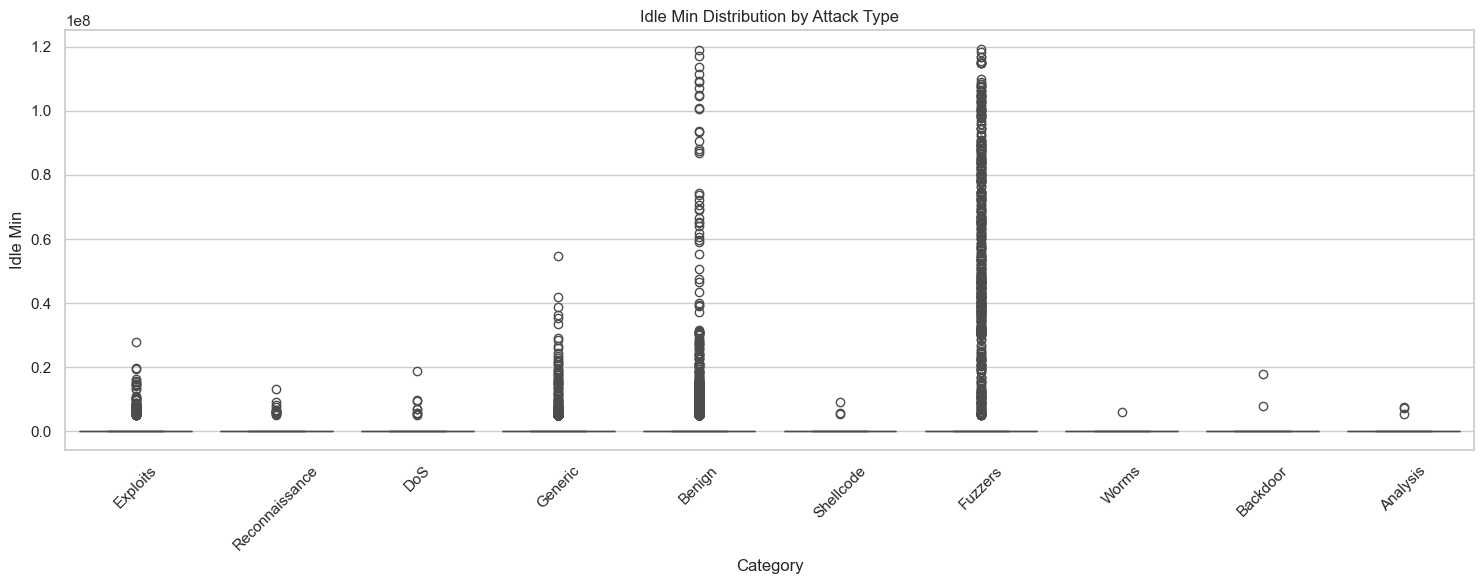

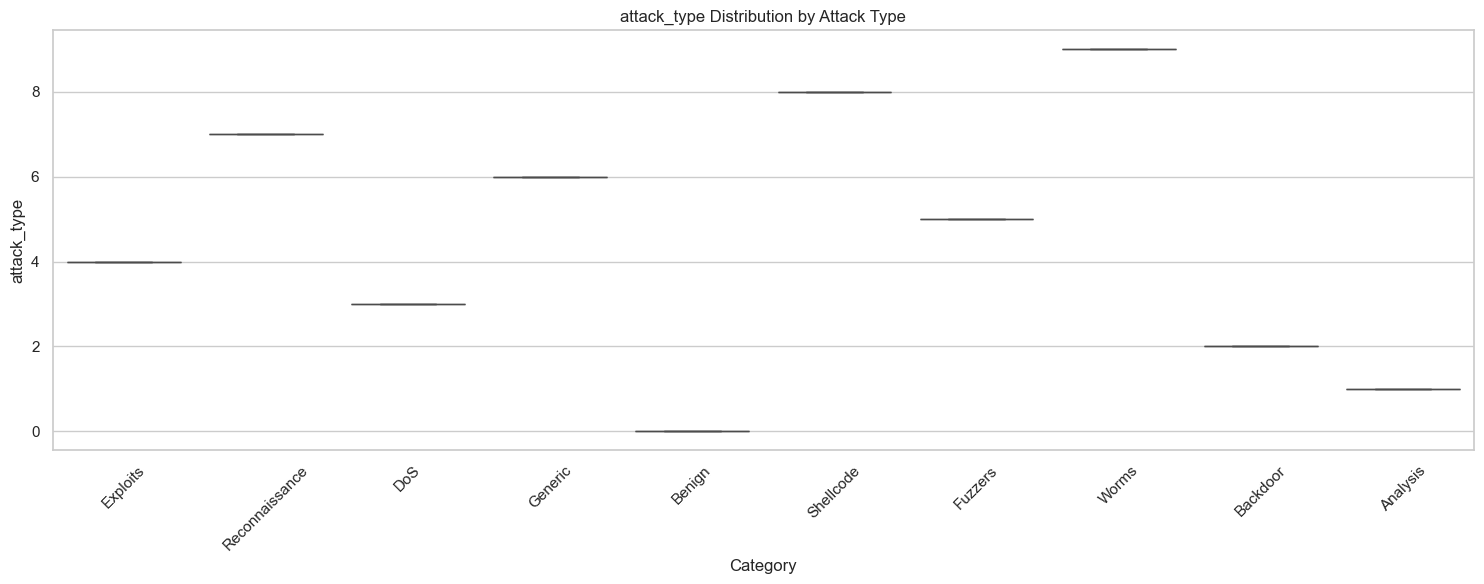

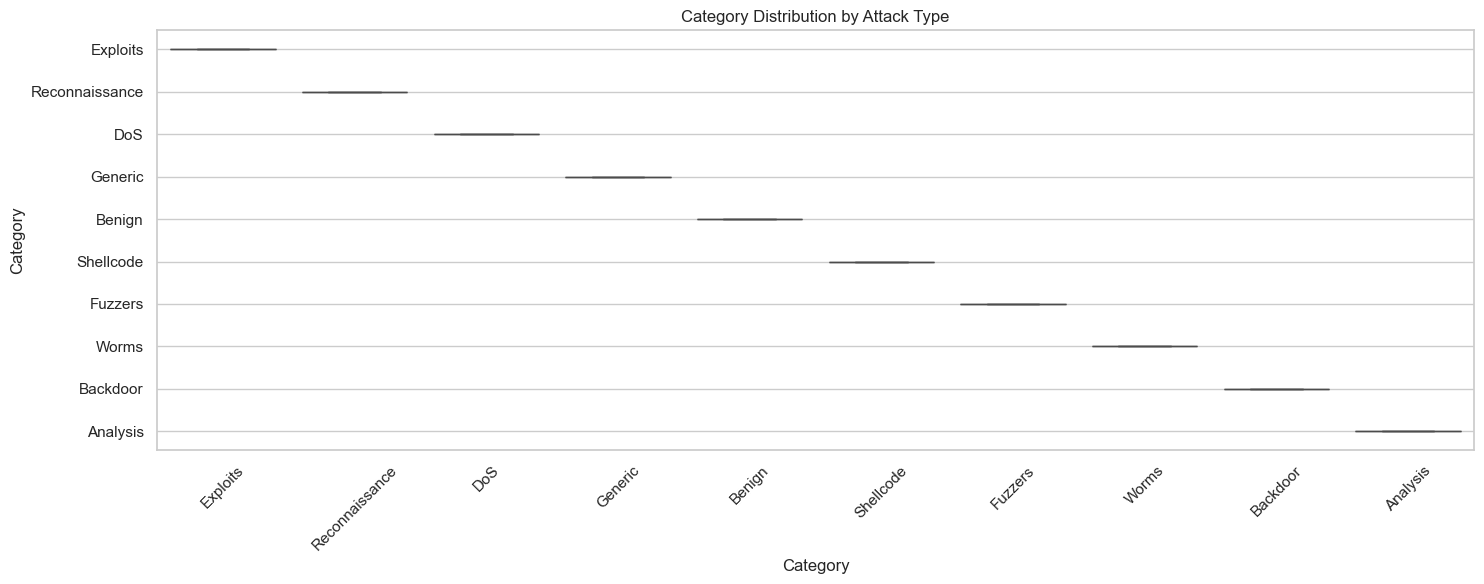

In [14]:
features = data.columns

for feature in features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Category', y=feature, data=data)
    plt.title(f'{feature} Distribution by Attack Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Statistical summary by attack type

In [15]:
print("\nStatistical Summary by Attack Type:")
for feature in features:
    print(f"\n{feature} Summary:")
    print(data.groupby('attack_type')[feature].describe())


Statistical Summary by Attack Type:

Flow Duration Summary:
                count          mean           std      min        25%  \
attack_type                                                             
0            358332.0  3.072613e+05  2.141569e+06      1.0     343.00   
1               385.0  1.013727e+06  1.134148e+06  67869.0  545969.00   
2               452.0  6.653816e+05  1.542419e+06   9483.0  122724.75   
3              4467.0  2.311686e+06  1.193784e+07      1.0  103493.50   
4             30951.0  1.361656e+06  4.322865e+06      1.0  185182.50   
5             29613.0  1.520587e+06  8.835126e+06      1.0   48971.00   
6              4632.0  1.134120e+07  3.239085e+07      1.0  129334.50   
7             16735.0  3.847293e+05  6.592997e+05      1.0      10.00   
8              2102.0  2.501564e+05  6.946237e+05      1.0       9.00   
9               246.0  8.062720e+05  1.810321e+06      2.0   65626.25   

                  50%         75%          max  
attack_type  